In [2]:
#importing all required python librabries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
pd.set_option('display.max_columns', None)
import optuna 
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Importing the databases
df1 = pd.read_csv(r"IV_data\Final_data\2012-13.csv", encoding='utf-8', encoding_errors='ignore')
df2 = pd.read_csv(r"IV_data\Final_data\2014.csv", encoding='utf-8', encoding_errors='ignore')
df3 = pd.read_csv(r"IV_data\Final_data\2015.csv", encoding='utf-8', encoding_errors='ignore')
df4 = pd.read_csv(r"IV_data\Final_data\2016.csv", encoding='utf-8', encoding_errors='ignore')
df5 = pd.read_csv(r"IV_data\Final_data\2017.csv", encoding='utf-8', encoding_errors='ignore')
df6 = pd.read_csv(r"IV_data\Final_data\2018.csv", encoding='utf-8', encoding_errors='ignore')
df7 = pd.read_csv(r"IV_data\Final_data\2019.csv", encoding='utf-8', encoding_errors='ignore')
df8 = pd.read_csv(r"IV_data\Final_data\2020.csv", encoding='utf-8', encoding_errors='ignore')
df9 = pd.read_csv(r"IV_data\Final_data\2021.csv", encoding='utf-8', encoding_errors='ignore')
df10 = pd.read_csv(r"IV_data\Final_data\2022.csv", encoding='utf-8', encoding_errors='ignore')


In [4]:
# Join vertically (like SQL UNION ALL)
df = pd.concat([df1, df2, df3, df4, df5, df6, df7,df8,df9,df10], ignore_index=True)
df.shape

(2663898, 39)

In [5]:
#Checking null values in the dataset
df.isnull().sum()

pvsnr                         0
vsnr                          0
status                        0
aktiv                         0
akt_kuka                      0
spartek                       0
beginn                        0
datum_s                 1127900
vtr_dau                      78
kund_beg                     10
vtrweg                        0
gesbeitr                     84
SDANZAHL                      5
SCHAGESA                      5
KOSTGESA                      5
KOSTGEKA                      5
kosten_verw                   5
kosten_prov                   5
gfeld                         0
ort                           0
plz                          19
alter                         0
anr                           0
SDBEITR5                      5
HERSTELLER                   59
HSN                       24971
TSN                       51671
ELEKTRO                      35
KILOMETERSTAND_CLEAN     649719
ZW                            0
WKZ                     1504968
KH_SF   

In [6]:
df.head(20)

,pvsnr,vsnr,status,aktiv,akt_kuka,spartek,beginn,datum_s,vtr_dau,kund_beg,vtrweg,gesbeitr,SDANZAHL,SCHAGESA,KOSTGESA,KOSTGEKA,kosten_verw,kosten_prov,gfeld,ort,plz,alter,anr,SDBEITR5,HERSTELLER,HSN,TSN,ELEKTRO,KILOMETERSTAND_CLEAN,ZW,WKZ,KH_SF,ERSZ_aktiv,ZW_storn,WKZ_storn,KH_SF_storn,ERSZ_storn,claim,ersz_final
0,1012223,01012223-003,Aktiv,1,1,VK,16.06.2013,NaN,4306.0,17.09.1969,V,110.00,0.0,0.00,0.00,0.00,70.54,41.38,70270/ Privatkunden,Flensburg,24944,83,71296/ Frau,404.26,VOLKSWAGEN-VW,603.0,ALL,N,104982.0,65697/ jhrlich,112.0,425.0,16JUN2009,*No Format*,NaN,NaN,NaN,0,16JUN2009
1,1012223,01012223-003,Aktiv,1,1,KH,16.06.2013,NaN,4306.0,17.09.1969,V,253.96,0.0,0.00,0.00,0.00,186.81,89.36,70270/ Privatkunden,Flensburg,24944,83,71296/ Frau,1076.16,VOLKSWAGEN-VW,603.0,ALL,N,104982.0,65697/ jhrlich,112.0,425.0,16JUN2009,*No Format*,NaN,NaN,NaN,0,16JUN2009
2,1012748,01012748-002,Storno,0,0,VK,08.10.2013,09.03.2024,3805.0,03.05.1979,V,325.06,0.0,0.00,0.00,0.00,134.57,77.70,70269/ Land- und Forstwirtschaft,Bxlund,24994,999,01515/ Erbengemeinschaft,752.15,NISSAN (J),1329.0,AHQ,N,50000.0,*No Format*,NaN,NaN,NaN,65699/ vierteljhrlich,112.0,443.0,20JUN2018,0,20JUN2018
3,1012748,01012748-002,Storno,0,0,KH,08.10.2013,09.03.2024,3805.0,03.05.1979,V,186.02,0.0,0.00,0.00,0.00,121.83,58.12,70269/ Land- und Forstwirtschaft,Bxlund,24994,999,01515/ Erbengemeinschaft,703.32,NISSAN (J),1329.0,AHQ,N,50000.0,*No Format*,NaN,NaN,NaN,65699/ vierteljhrlich,112.0,443.0,20JUN2018,0,20JUN2018
4,1012748,01012748-002,Storno,0,0,TK,08.10.2013,13.10.2021,2927.0,03.05.1979,V,0.00,0.0,0.00,0.00,0.00,19.41,8.72,70269/ Land- und Forstwirtschaft,Bxlund,24994,999,01515/ Erbengemeinschaft,104.68,NISSAN (J),1329.0,AHQ,N,50000.0,*No Format*,NaN,NaN,NaN,65699/ vierteljhrlich,112.0,443.0,20JUN2018,0,20JUN2018
5,1013206,01013206-003,Aktiv,1,1,VK,01.01.2013,NaN,4472.0,21.07.1977,V,313.58,0.0,0.00,0.00,0.00,232.13,135.88,70270/ Privatkunden,Sieverstedt,24885,74,71295/ Herr,1327.05,BMW BAYERISCHE MOTORENWER,5.0,CTG,N,35000.0,65697/ jhrlich,112.0,446.0,11DEC2020,*No Format*,NaN,NaN,NaN,0,11DEC2020
6,1013206,01013206-003,Aktiv,1,1,KH,01.01.2013,NaN,4472.0,21.07.1977,V,95.42,1.0,3481.01,3481.01,4402.64,82.90,39.66,70270/ Privatkunden,Sieverstedt,24885,74,71295/ Herr,478.44,BMW BAYERISCHE MOTORENWER,5.0,CTG,N,35000.0,65697/ jhrlich,112.0,446.0,11DEC2020,*No Format*,NaN,NaN,NaN,1,11DEC2020
7,1013242,01013242-004,Aktiv,1,1,KH,01.01.2012,NaN,4838.0,26.09.1975,V,212.80,0.0,0.00,0.00,0.00,155.16,74.26,70270/ Privatkunden,Lrschau,24850,82,71296/ Frau,894.10,NISSAN (J),1329.0,ACJ,N,28000.0,65699/ vierteljhrlich,112.0,430.0,02APR2009,*No Format*,NaN,NaN,NaN,0,02APR2009
8,1013242,01013242-004,Aktiv,1,1,VK,01.01.2012,NaN,4838.0,26.09.1975,V,168.00,0.0,0.00,0.00,0.00,126.27,73.90,70270/ Privatkunden,Lrschau,24850,82,71296/ Frau,722.00,NISSAN (J),1329.0,ACJ,N,28000.0,65699/ vierteljhrlich,112.0,430.0,02APR2009,*No Format*,NaN,NaN,NaN,0,02APR2009
9,1013457,01013457-005,Aktiv,1,1,KH,03.08.2012,NaN,4623.0,28.04.1978,M,28.77,0.0,0.00,0.00,0.00,14.58,13.31,70270/ Privatkunden,Flensburg,24943,67,71295/ Herr,122.64,CHANGZHOU KWANG.(RC),7476.0,AAC,N,NaN,65697/ jhrlich,24.0,412.0,07JUN2018,*No Format*,NaN,NaN,NaN,0,07JUN2018


In [7]:
#Dropping columns with more than 50% null values
df = df.dropna(subset=['vtr_dau', 'gesbeitr',"HERSTELLER",'SDBEITR5','ELEKTRO','plz','ersz_final'])
df= df.drop(['WKZ','KH_SF','ZW','ERSZ_aktiv','ZW_storn','WKZ_storn','KH_SF_storn','ERSZ_storn'], axis=1)

In [8]:
#Factorizing the data from catagorical to numerical
df['beginn'] = pd.to_datetime(df['beginn'], format='%d.%m.%Y')
df['beg_year'] = df['beginn'].dt.year
df['beg_month'] = df['beginn'].dt.month
df['beg_day'] = df['beginn'].dt.day
# Extracting Weekday from date
df['weekday'] = df['beginn'].dt.day_name()
df['Quarter'] = pd.to_datetime(df['beg_month'], format='%m').dt.quarter

In [9]:
#Factorizing the data from catagorical to numerical
df['Weekday_id'] = pd.factorize(df['weekday'])[0]+1
df.replace({'V':1, 'M':2, 'S':3, 'D':4},inplace=True)

In [10]:
#Factorizing the data from catagorical to numerical

df['Cus_type'] = df['gfeld'].str.split('/').str[0]
df['Cus_typ_id'] = pd.factorize(df['Cus_type'])[0]+1
df['ort_id'] = pd.factorize(df['ort'])[0]+1
df[['Sex_id','Sex']]= df['anr'].str.split('/',expand=True)
df['gender_id'] = pd.factorize(df['Sex_id'])[0]+1
df['plz_id'] = pd.factorize(df['plz'])[0]+1
df['Hersteller_id'] = pd.factorize(df['HERSTELLER'])[0]+1
df['spartek'] = pd.factorize(df['spartek'])[0]+1



estimated_total_paid",
    "carage_years",
    "kosten_verw", 
    "kosten_prov", 
    "alter", 
    "KILOMETERSTAND_CLEAN", 
    "claim",
    "state_id",
    "plz_id",
    "Cus_typ_id"

In [11]:
labels, uniques = pd.factorize(df['plz'])
df['plz_id'] = labels + 1  # If you want to start from 1

# Display the mapping
mapping = {category: code + 1 for code, category in enumerate(uniques)}
print(mapping)


{'24944': 1, '24994': 2, '24885': 3, '24850': 4, '24943': 5, '24890': 6, '23845': 7, '24937': 8, '24405': 9, '24401': 10, '24392': 11, '24107': 12, '23823': 13, '24395': 14, '24860': 15, '24589': 16, '24837': 17, '23701': 18, '24891': 19, '24988': 20, '24991': 21, '24969': 22, '24149': 23, '24975': 24, '24796': 25, '22303': 26, '24894': 27, '24977': 28, '24989': 29, '24972': 30, '24357': 31, '24976': 32, '24966': 33, '24986': 34, '24873': 35, '24376': 36, '24816': 37, '24367': 38, '16727': 39, '24882': 40, '24864': 41, '24881': 42, '24879': 43, '24220': 44, '24960': 45, '24790': 46, '24939': 47, '24407': 48, '24402': 49, '24817': 50, '24855': 51, '23827': 52, '24955': 53, '24980': 54, '24941': 55, '24997': 56, '25578': 57, '14469': 58, '24635': 59, '24983': 60, '24996': 61, '24888': 62, '24409': 63, '24404': 64, '24893': 65, '24808': 66, '24897': 67, '24366': 68, '24360': 69, '24340': 70, '25856': 71, '24214': 72, '24794': 73, '24857': 74, '24361': 75, '24814': 76, '24363': 77, '24358'

In [12]:
df.Sex.unique()

array([' Frau', ' Erbengemeinschaft', ' Herr', ' (Unternehmen)',
       ' (sonstige)', ' Firma'], dtype=object)

In [13]:
# Mapping postal codes to states in Germany
# The mapping is based on the first two digits of the postal code (PLZ)
plz_state_mapping = {
    '01': 'Sachsen',
    '02': 'Sachsen',
    '03': 'Brandenburg',
    '04': 'Sachsen',
    '05': 'Sachsen-Anhalt',
    '06': 'Sachsen-Anhalt',
    '07': 'Thüringen',
    '08': 'Sachsen',
    '09': 'Sachsen',

    '10': 'Berlin', '11': 'Berlin', '12': 'Brandenburg',
    '13': 'Brandenburg', '14': 'Brandenburg', '15': 'Brandenburg',
    '16': 'Brandenburg',

    '17': 'Mecklenburg-Vorpommern', '18': 'Mecklenburg-Vorpommern',
    '19': 'Mecklenburg-Vorpommern',

    '20': 'Schleswig-Holstein', '21': 'Schleswig-Holstein',
    '22': 'Hamburg', '23': 'Schleswig-Holstein',

    '24': 'Schleswig-Holstein', '25': 'Schleswig-Holstein',
    '26': 'Niedersachsen', '27': 'Bremen', '28': 'Bremen',
    '29': 'Niedersachsen',

    '30': 'Niedersachsen', '31': 'Niedersachsen', '32': 'Nordrhein-Westfalen',
    '33': 'Nordrhein-Westfalen', '34': 'Hessen',

    '35': 'Hessen', '36': 'Hessen', '37': 'Niedersachsen',
    '38': 'Niedersachsen', '39': 'Sachsen-Anhalt',

    '40': 'Nordrhein-Westfalen', '41': 'Nordrhein-Westfalen',
    '42': 'Nordrhein-Westfalen', '44': 'Nordrhein-Westfalen',
    '45': 'Nordrhein-Westfalen', '46': 'Nordrhein-Westfalen',

    '47': 'Nordrhein-Westfalen', '48': 'Nordrhein-Westfalen',
    '49': 'Niedersachsen',

    '50': 'Nordrhein-Westfalen', '51': 'Nordrhein-Westfalen',
    '52': 'Nordrhein-Westfalen', '53': 'Nordrhein-Westfalen',
    '54': 'Rheinland-Pfalz', '55': 'Rheinland-Pfalz',

    '56': 'Rheinland-Pfalz', '57': 'Nordrhein-Westfalen',
    '58': 'Nordrhein-Westfalen', '59': 'Nordrhein-Westfalen',

    '60': 'Hessen', '61': 'Hessen', '62': 'Hessen',
    '63': 'Hessen', '64': 'Hessen', '65': 'Hessen',

    '66': 'Saarland', '67': 'Rheinland-Pfalz', '68': 'Rheinland-Pfalz',
    '69': 'Hessen',

    '70': 'Baden-Württemberg', '71': 'Baden-Württemberg',
    '72': 'Baden-Württemberg', '73': 'Baden-Württemberg',
    '74': 'Baden-Württemberg', '75': 'Baden-Württemberg',
    '76': 'Baden-Württemberg', '77': 'Baden-Württemberg',
    '78': 'Baden-Württemberg', '79': 'Baden-Württemberg',

    '80': 'Bayern', '81': 'Bayern', '82': 'Bayern', '83': 'Bayern',
    '84': 'Bayern', '85': 'Bayern', '86': 'Bayern', '87': 'Bayern',
    '88': 'Bayern', '89': 'Bayern',

    '90': 'Bayern', '91': 'Bayern', '92': 'Bayern', '93': 'Bayern',
    '94': 'Bayern', '95': 'Bayern', '96': 'Bayern',

    '97': 'Bayern', '98': 'Thüringen', '99': 'Thüringen'
}

def get_state_from_plz(plz):
    if pd.isnull(plz):
        return None
    try:
        plz_str = str(plz).zfill(5)  # ensure it's 5 digits
        return plz_state_mapping.get(plz_str[:2])
    except:
        return None
    
df['state'] = df['plz'].apply(get_state_from_plz)
df['state_id'] = pd.factorize(df['state'])[0]+1
df = df.dropna(subset=['state'])


In [14]:
#Factorizing the data from catagorical to numerical
df['status_id'] = pd.factorize(df['status'])[0]+1
df['ELEKTRO'] = pd.factorize(df['ELEKTRO'])[0]+1

In [15]:
#Using this technique as factorize make nan values to 0, nan values should be in nan 
codes, uniques = pd.factorize(df['TSN'], sort=True)
df['TSN'] = np.where(df['TSN'].isna(), np.nan, codes + 1)
df['alter'] = df['alter'].replace([998, 999], np.nan)


In [16]:
#Converting the date column to datetime format
df['First_reg'] = pd.to_datetime(df['ersz_final'], format="%d%b%Y")


In [17]:
df['Car_age_indays'] = (pd.Timestamp.today() - df['First_reg']).dt.days


In [18]:
df['carage_years'] = df['Car_age_indays'] / 365.25
df['carage_years'] = df['carage_years'].round(0)


In [19]:
df = df[df['carage_years'] >= 0]


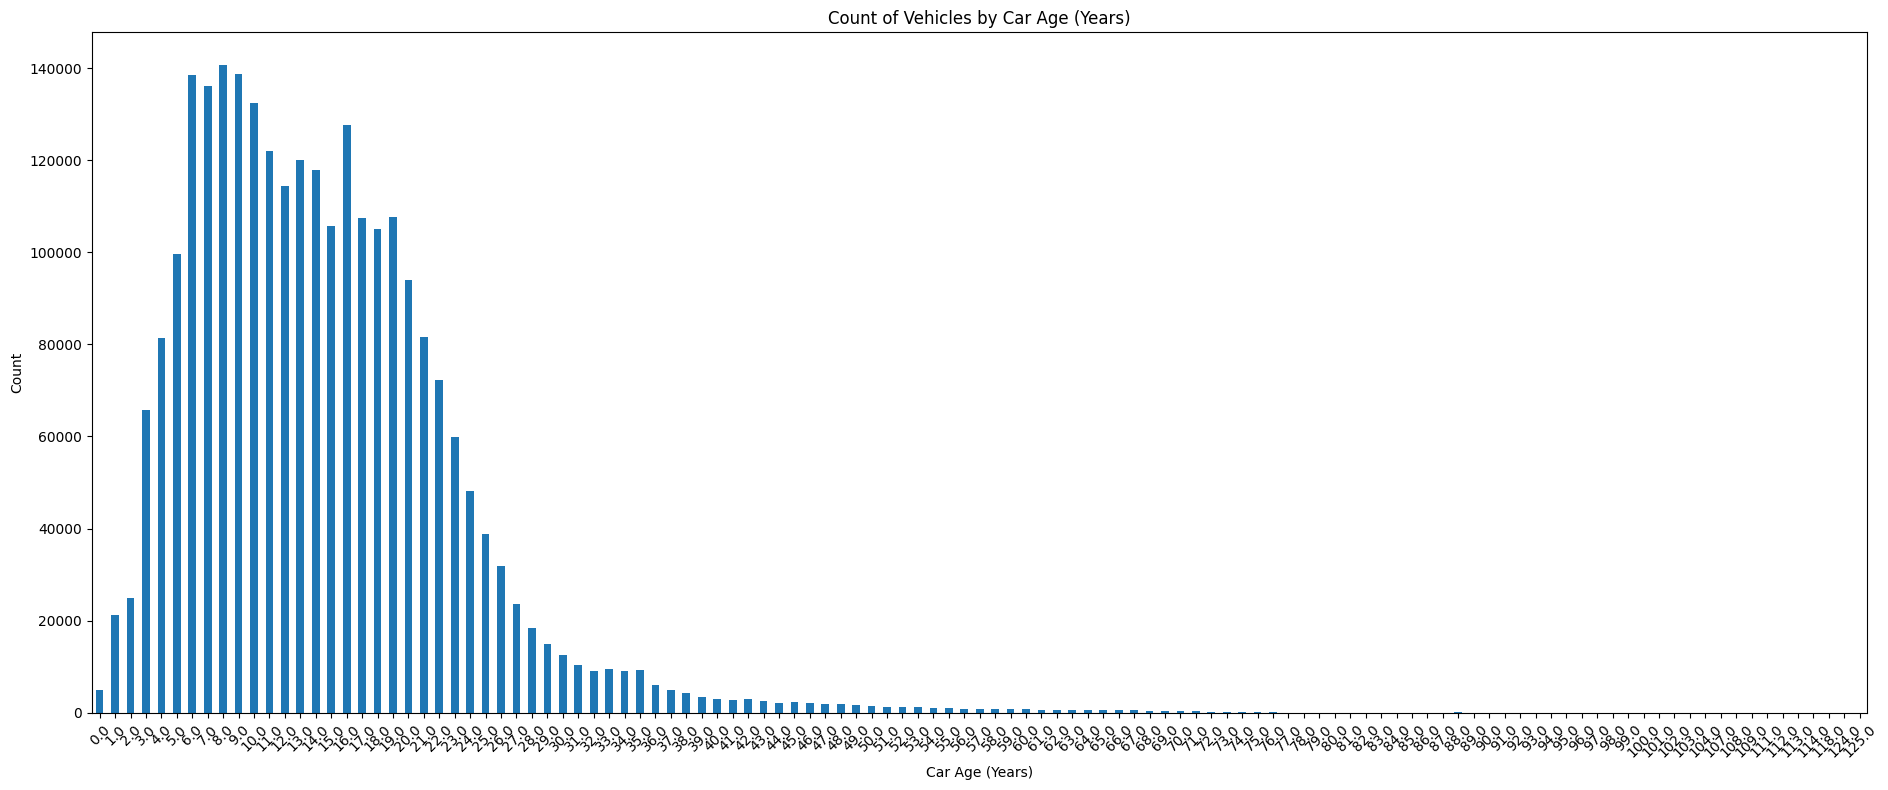

In [20]:
# Plotting the distribution of car age in years
df['carage_years'].value_counts().sort_index().plot(kind='bar', figsize=(19,8))
plt.title('Count of Vehicles by Car Age (Years)')
plt.xlabel('Car Age (Years)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


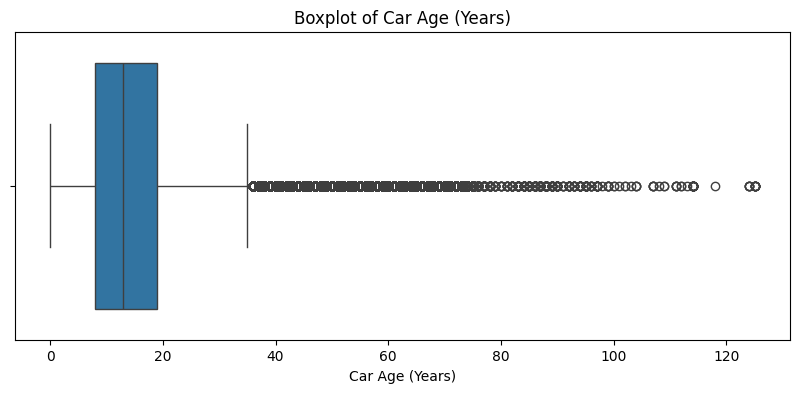

In [21]:
# Creating a boxplot to visualize the distribution of car age in years
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['carage_years'])  # Or use another numeric column
plt.title('Boxplot of Car Age (Years)')
plt.xlabel('Car Age (Years)')
plt.show()


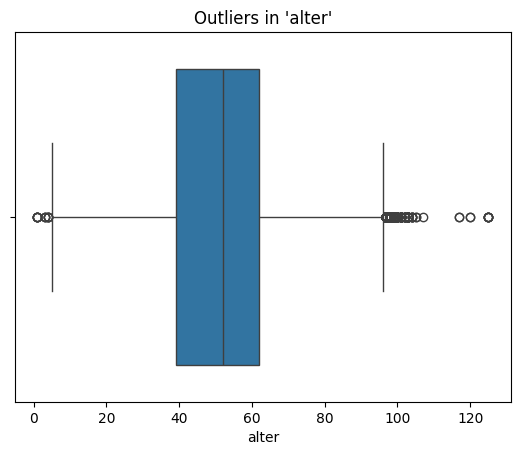

In [22]:
# Creating a boxplot to visualize outliers in the 'alter' column
sns.boxplot(x=df['alter'])
plt.title("Outliers in 'alter'")
plt.show()


In [23]:
df = df[df['alter'] >= 18].copy()


In [24]:
#Handeling missing alter values 
#First, we will check how many missing values are in the 'alter' column and then fill them with random ages between 18 and 85.
missing_count = df['alter'].isnull().sum()
min_age = 18
max_age = 85
random_ages = np.random.randint(min_age, max_age + 1, size=missing_count)
df.loc[df['alter'].isnull(), 'alter'] = random_ages

In [25]:
df = df.dropna(subset=['TSN']).copy()
df['TSN_id']= pd.factorize(df['TSN'])[0]+1  


In [26]:
# To estimate the actual amount customer paid during his entire duration of service 
df['estimated_total_paid'] = (df['SDBEITR5'] / (5 * 365)) * df['vtr_dau']

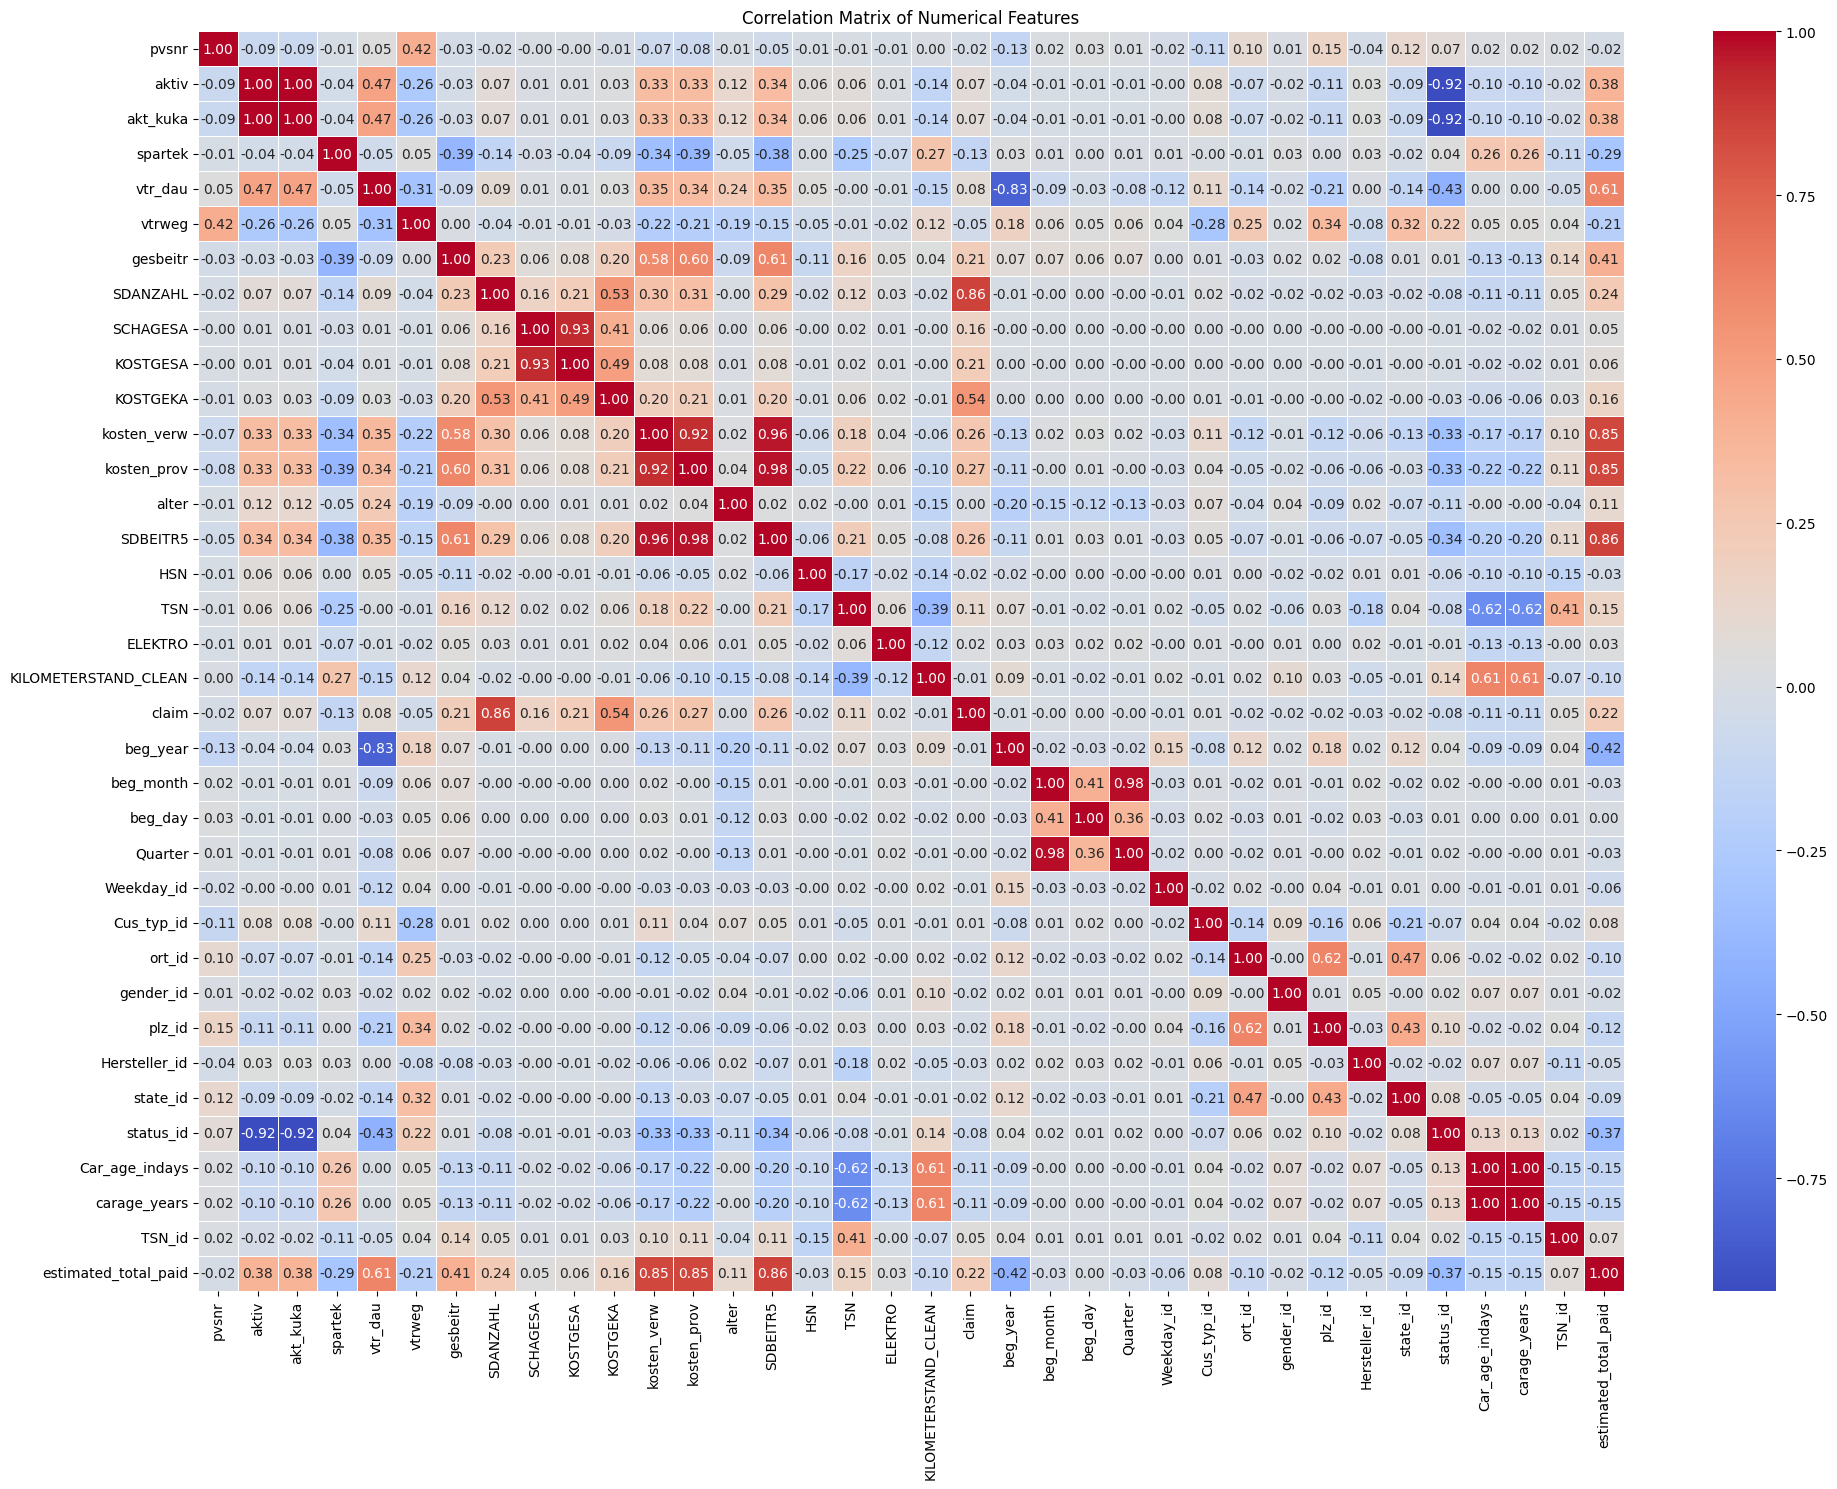

In [27]:
# Visualizing the correlation matrix of numerical features in the dataset
# This will help in understanding the relationships between different numerical features.
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# 2. Compute correlation matrix
corr_matrix = numeric_df.corr()

# 3. Display as heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

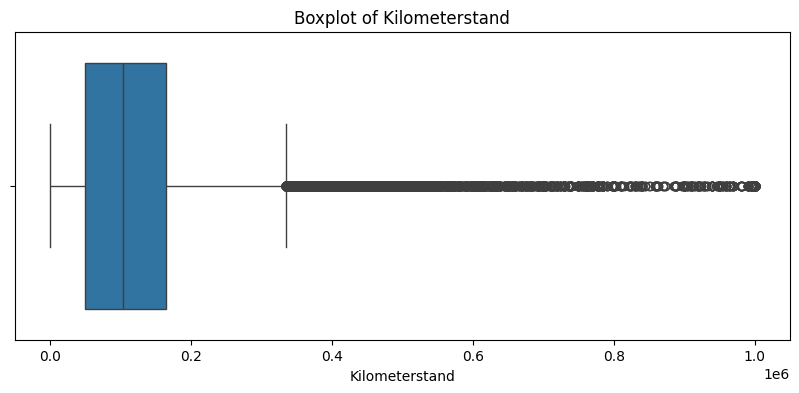

In [28]:
# Creating a boxplot to visualize outliers in the 'KILOMETERSTAND_CLEAN' column 
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['KILOMETERSTAND_CLEAN'])
plt.title('Boxplot of Kilometerstand')
plt.xlabel('Kilometerstand')
plt.show()


In [29]:
#df.to_csv("df_missing_kilometerstand.csv", index=False)

In [30]:
# Handling missing values in 'KILOMETERSTAND_CLEAN' using XGBoost Regressor
# This code assumes that the necessary libraries are already installed and the dataset is loaded into a Data
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# 1. Split data into known and unknown
df_known = df[df['KILOMETERSTAND_CLEAN'].notnull()]
df_unknown = df[df['KILOMETERSTAND_CLEAN'].isnull()]

# 2. Select features
features = [
    'alter', 'Hersteller_id','estimated_total_paid','aktiv',
    'vtr_dau','gender_id','TSN_id','kosten_prov','status_id','Car_age_indays','spartek'
]

# 3. Prepare training data
X = df_known[features]
y = df_known['KILOMETERSTAND_CLEAN']

# 4. Train XGBoost Regressor
model = XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1, verbosity=0)
model.fit(X, y)

# 5. Predict missing values
X_missing = df_unknown[features]
predicted_km = model.predict(X_missing)

# 6. Fill missing values
df.loc[df['KILOMETERSTAND_CLEAN'].isnull(), 'KILOMETERSTAND_CLEAN'] = predicted_km


In [31]:
# Evaluating the model performance on known data
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# 1. Split known data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train the XGBoost model
model = XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1, verbosity=0)
model.fit(X_train, y_train)

# 3. Predict on the test set
y_pred = model.predict(X_test)

# 4. Evaluate performance
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# 5. Print evaluation results
print(f"R² score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


R² score: 0.5555
RMSE: 54219.92
MAE: 38704.81


In [32]:
# Creating a DataFrame with predicted values for unknown 'KILOMETERSTAND_CLEAN'
# This DataFrame will contain the original columns along with the predicted values for 'KILOMETERSTAND_CLEAN'
predicted_df = df_unknown.copy()
predicted_df['KILOMETERSTAND_CLEAN_predicted'] = predicted_km

# Select columns to display (add/remove as needed)
columns_to_show = [
    'KILOMETERSTAND_CLEAN_predicted',  # the predicted values
    'alter',
    'HERSTELLER',
    'beg_year',
    'state',
    'plz'
]

# Display the first 10 rows
predicted_vales = (predicted_df[columns_to_show])

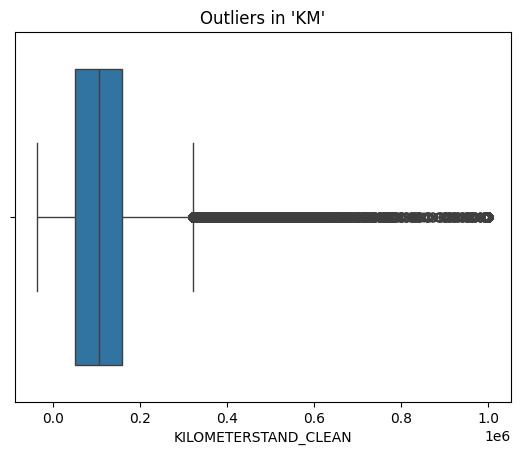

In [33]:
# Display the DataFrame
sns.boxplot(x=df['KILOMETERSTAND_CLEAN'])
plt.title("Outliers in 'KM'")
plt.show()

In [34]:
#df_EDA = df.to_csv("output.csv", index=False)
#df_EDA_p = df.to_pickle("output.pkl")

In [35]:
df_1 = df

In [36]:
#df[df['KILOMETERSTAND_CLEAN'].notnull()].head(10)

In [37]:
#df_clean1 = pd.read_csv('D:\IV_Mastertheis\df_clean.csv')

In [38]:
#df.head()

In [39]:
#df.info()

In [40]:
def plot_histogram(df_1, column_name):

  plt.figure(figsize=(8, 5))
  sns.histplot(df_1[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")

  # calculate the mean and median values for the columns
  col_mean = df_1[column_name].mean()
  col_median = df_1[column_name].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")

  plt.legend()

  plt.show()

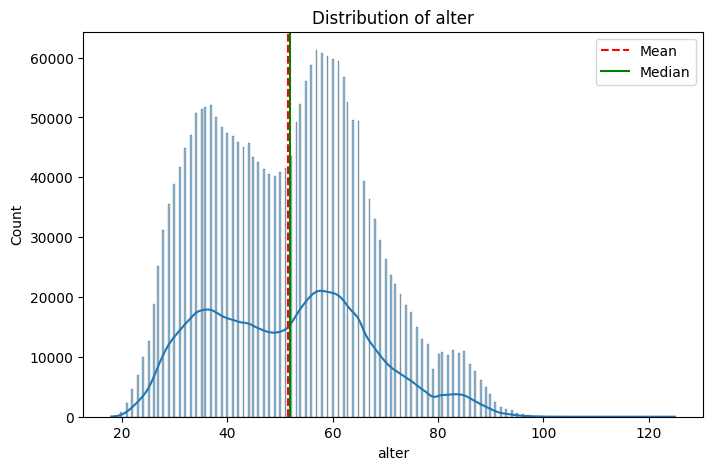

In [41]:
# Plotting the histogram for the 'alter' column
plot_histogram(df_1, "alter")

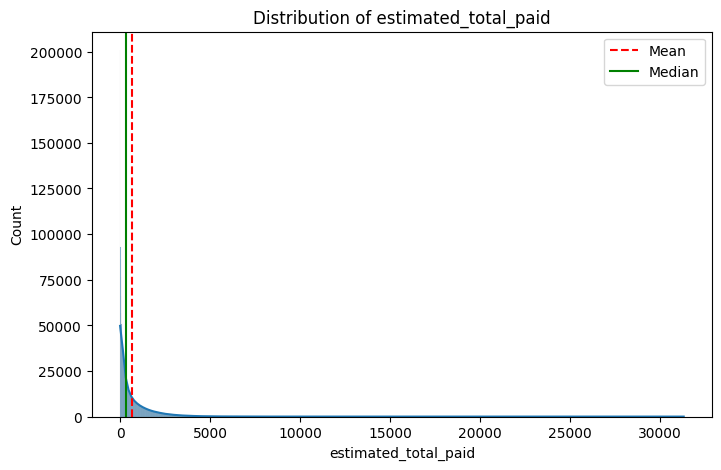

In [42]:
#` Plotting the histogram for the 'estimated_total_paid' column`
plot_histogram(df_1, "estimated_total_paid")

In [43]:
df_1['Dura_in_yrs'] = df_1['vtr_dau'] // 365

In [44]:
df_1.head()

,pvsnr,vsnr,status,aktiv,akt_kuka,spartek,beginn,datum_s,vtr_dau,kund_beg,vtrweg,gesbeitr,SDANZAHL,SCHAGESA,KOSTGESA,KOSTGEKA,kosten_verw,kosten_prov,gfeld,ort,plz,alter,anr,SDBEITR5,HERSTELLER,HSN,TSN,ELEKTRO,KILOMETERSTAND_CLEAN,claim,ersz_final,beg_year,beg_month,beg_day,weekday,Quarter,Weekday_id,Cus_type,Cus_typ_id,ort_id,Sex_id,Sex,gender_id,plz_id,Hersteller_id,state,state_id,status_id,First_reg,Car_age_indays,carage_years,TSN_id,estimated_total_paid,Dura_in_yrs
0,1012223,01012223-003,Aktiv,1,1,1,2013-06-16,NaN,4306.0,17.09.1969,1,110.00,0.0,0.00,0.00,0.00,70.54,41.38,70270/ Privatkunden,Flensburg,24944,83.0,71296/ Frau,404.26,VOLKSWAGEN-VW,603.0,1346.0,1,104982.0,0,16JUN2009,2013,6,16,Sunday,2,1,70270,1,1,71296,Frau,1,1,1,Schleswig-Holstein,1,1,2009-06-16,5856,16.0,1,953.832088,11.0
1,1012223,01012223-003,Aktiv,1,1,2,2013-06-16,NaN,4306.0,17.09.1969,1,253.96,0.0,0.00,0.00,0.00,186.81,89.36,70270/ Privatkunden,Flensburg,24944,83.0,71296/ Frau,1076.16,VOLKSWAGEN-VW,603.0,1346.0,1,104982.0,0,16JUN2009,2013,6,16,Sunday,2,1,70270,1,1,71296,Frau,1,1,1,Schleswig-Holstein,1,1,2009-06-16,5856,16.0,1,2539.147923,11.0
5,1013206,01013206-003,Aktiv,1,1,1,2013-01-01,NaN,4472.0,21.07.1977,1,313.58,0.0,0.00,0.00,0.00,232.13,135.88,70270/ Privatkunden,Sieverstedt,24885,74.0,71295/ Herr,1327.05,BMW BAYERISCHE MOTORENWER,5.0,2842.0,1,35000.0,0,11DEC2020,2013,1,1,Tuesday,1,2,70270,1,3,71295,Herr,3,3,3,Schleswig-Holstein,1,1,2020-12-11,1660,5.0,2,3251.817863,12.0
6,1013206,01013206-003,Aktiv,1,1,2,2013-01-01,NaN,4472.0,21.07.1977,1,95.42,1.0,3481.01,3481.01,4402.64,82.90,39.66,70270/ Privatkunden,Sieverstedt,24885,74.0,71295/ Herr,478.44,BMW BAYERISCHE MOTORENWER,5.0,2842.0,1,35000.0,1,11DEC2020,2013,1,1,Tuesday,1,2,70270,1,3,71295,Herr,3,3,3,Schleswig-Holstein,1,1,2020-12-11,1660,5.0,2,1172.374619,12.0
7,1013242,01013242-004,Aktiv,1,1,2,2012-01-01,NaN,4838.0,26.09.1975,1,212.80,0.0,0.00,0.00,0.00,155.16,74.26,70270/ Privatkunden,Lrschau,24850,82.0,71296/ Frau,894.10,NISSAN (J),1329.0,1104.0,1,28000.0,0,02APR2009,2012,1,1,Sunday,1,1,70270,1,4,71296,Frau,1,4,2,Schleswig-Holstein,1,1,2009-04-02,5931,16.0,3,2370.222356,13.0


In [45]:
columns_needed = [
    "vsnr",'aktiv', "vtr_dau","Dura_in_yrs", "vtrweg", "SDANZAHL", "SCHAGESA", "KOSTGESA",
    "kosten_verw", "kosten_prov", "alter", "ELEKTRO", "KILOMETERSTAND_CLEAN",
    "claim", "beg_year", "beg_month", "Quarter", "Weekday_id", "Cus_typ_id",
    "ort_id", "gender_id", "plz_id", "Hersteller_id", "state_id", "TSN_id",
    "estimated_total_paid",'spartek','carage_years','Car_age_indays'
]

In [46]:
df_imp = df_1[columns_needed]

In [47]:
df_imp.head()

,vsnr,aktiv,vtr_dau,Dura_in_yrs,vtrweg,SDANZAHL,SCHAGESA,KOSTGESA,kosten_verw,kosten_prov,alter,ELEKTRO,KILOMETERSTAND_CLEAN,claim,beg_year,beg_month,Quarter,Weekday_id,Cus_typ_id,ort_id,gender_id,plz_id,Hersteller_id,state_id,TSN_id,estimated_total_paid,spartek,carage_years,Car_age_indays
0,01012223-003,1,4306.0,11.0,1,0.0,0.00,0.00,70.54,41.38,83.0,1,104982.0,0,2013,6,2,1,1,1,1,1,1,1,1,953.832088,1,16.0,5856
1,01012223-003,1,4306.0,11.0,1,0.0,0.00,0.00,186.81,89.36,83.0,1,104982.0,0,2013,6,2,1,1,1,1,1,1,1,1,2539.147923,2,16.0,5856
5,01013206-003,1,4472.0,12.0,1,0.0,0.00,0.00,232.13,135.88,74.0,1,35000.0,0,2013,1,1,2,1,3,3,3,3,1,2,3251.817863,1,5.0,1660
6,01013206-003,1,4472.0,12.0,1,1.0,3481.01,3481.01,82.90,39.66,74.0,1,35000.0,1,2013,1,1,2,1,3,3,3,3,1,2,1172.374619,2,5.0,1660
7,01013242-004,1,4838.0,13.0,1,0.0,0.00,0.00,155.16,74.26,82.0,1,28000.0,0,2012,1,1,1,1,4,1,4,2,1,3,2370.222356,2,16.0,5931


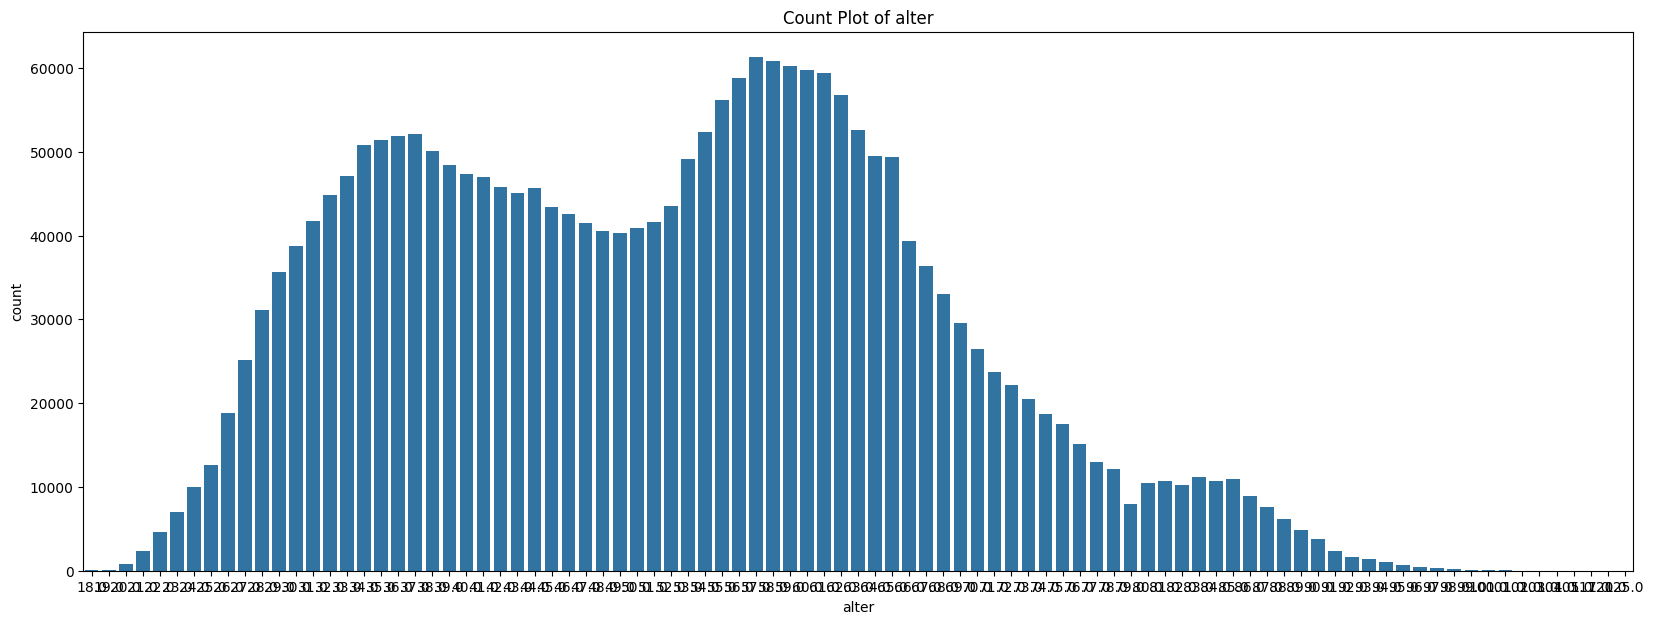

In [48]:
object_cols = ["alter"] 

for col in object_cols:
  plt.figure(figsize=(20, 7))
  sns.countplot(x=df_imp[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

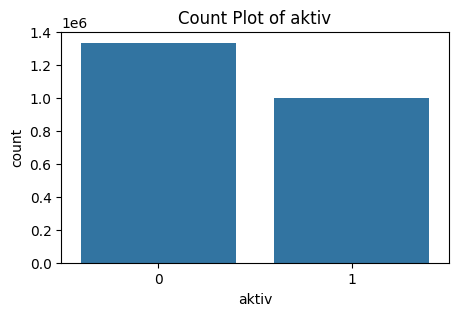

In [49]:
object_cols = ["aktiv"] 

for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=df_imp[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

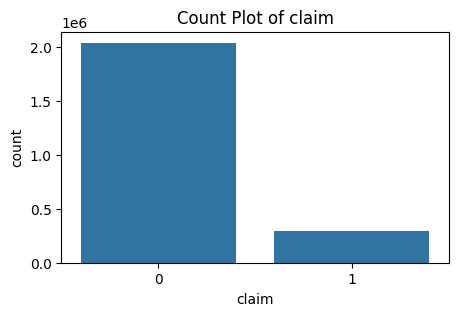

In [50]:
object_cols = ["claim"] 

for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=df_imp[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

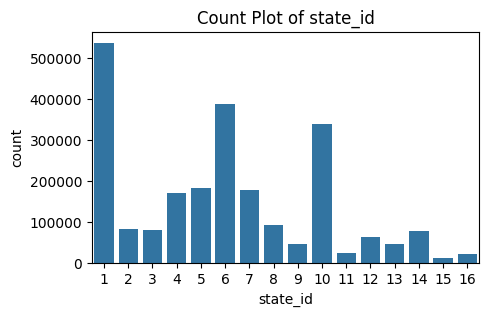

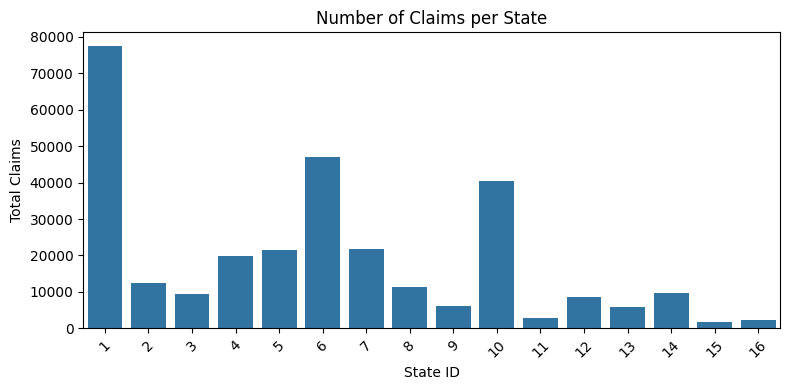

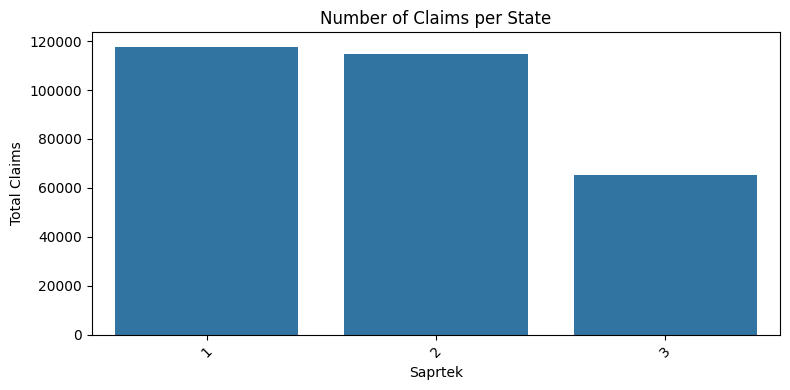

In [51]:
object_cols = ["state_id"] 

for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=df_imp[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

  import matplotlib.pyplot as plt
import seaborn as sns

# Group by state and sum the claims
claims_per_state = df_imp.groupby("state_id")["claim"].sum().reset_index()

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x="state_id", y="claim", data=claims_per_state)
plt.title("Number of Claims per State")
plt.xlabel("State ID")
plt.ylabel("Total Claims")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Group by spartek and sum the claims
claims_per_spk = df_imp.groupby("spartek")["claim"].sum().reset_index()

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x="spartek", y="claim", data=claims_per_spk)
plt.title("Number of Claims per State")
plt.xlabel("Saprtek")
plt.ylabel("Total Claims")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



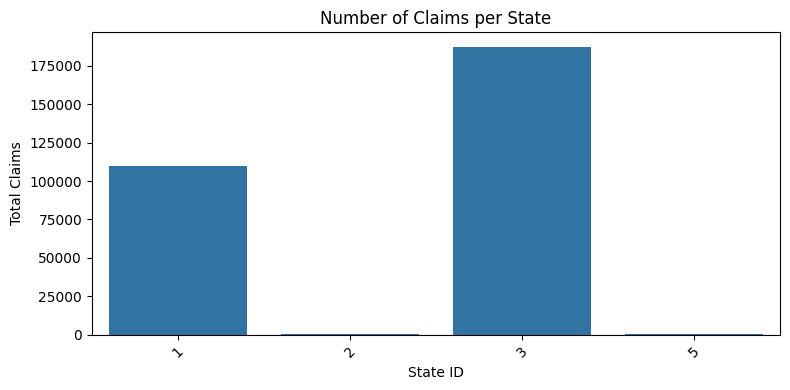

In [52]:
# Group by state and sum the claims
claims_per_state = df_imp.groupby("gender_id")["claim"].sum().reset_index()

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x="gender_id", y="claim", data=claims_per_state)
plt.title("Number of Claims per State")
plt.xlabel("State ID")
plt.ylabel("Total Claims")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [53]:
df_1.gender_id.unique()

array([1, 3, 5, 2])

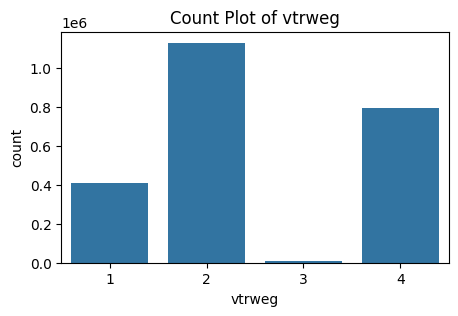

In [54]:
object_cols = ["vtrweg"] 

for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=df_imp[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

  import matplotlib.pyplot as plt
import seaborn as sns

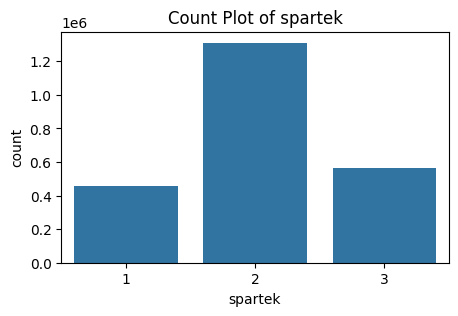

In [55]:
object_cols = ["spartek"] 

for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=df_imp[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

  import matplotlib.pyplot as plt
import seaborn as sns

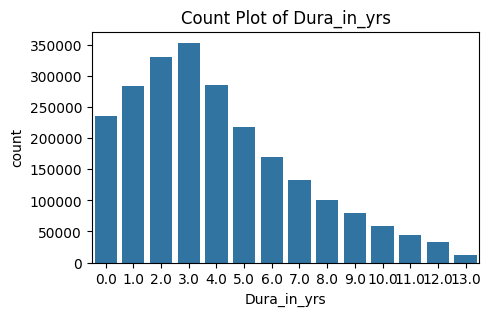

In [56]:
object_cols = ["Dura_in_yrs"] 

for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=df_imp[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

  import matplotlib.pyplot as plt
import seaborn as sns

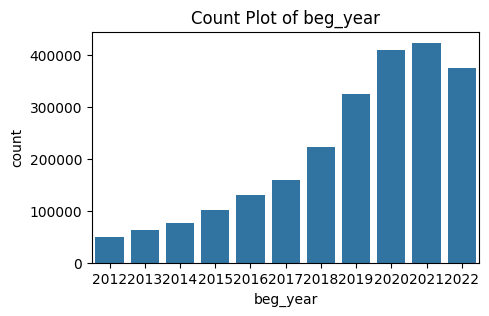

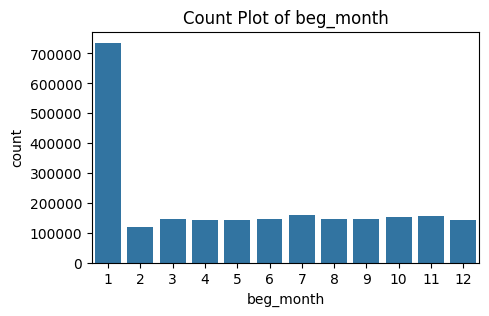

In [57]:

object_cols = ["beg_year"] 

for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=df_imp[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

  import matplotlib.pyplot as plt
import seaborn as sns
object_cols = ["beg_month"] 

for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=df_imp[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

  import matplotlib.pyplot as plt
import seaborn as sns


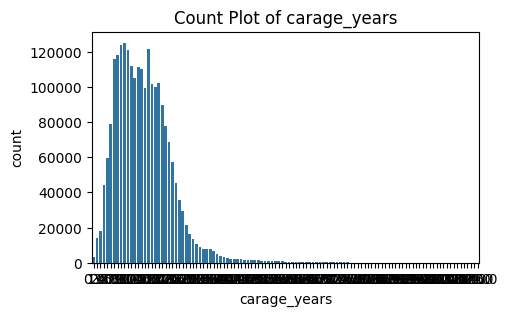

In [58]:
object_cols = ["carage_years"] 

for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=df_imp[col])
  plt.title(f"Count Plot of {col}")
  plt.show()


In [59]:
below_13 = (df['carage_years'] < 12).sum()
above_or_equal_13 = (df['carage_years'] >= 12).sum()

print(f"Cars below 13 years: {below_13}")
print(f"Cars 13 years and older: {above_or_equal_13}")


Cars below 13 years: 933570
Cars 13 years and older: 1402172


In [60]:
df_imp = df_imp[df_imp['carage_years'] < 13]


In [61]:

df_imp.shape

(1038708, 29)

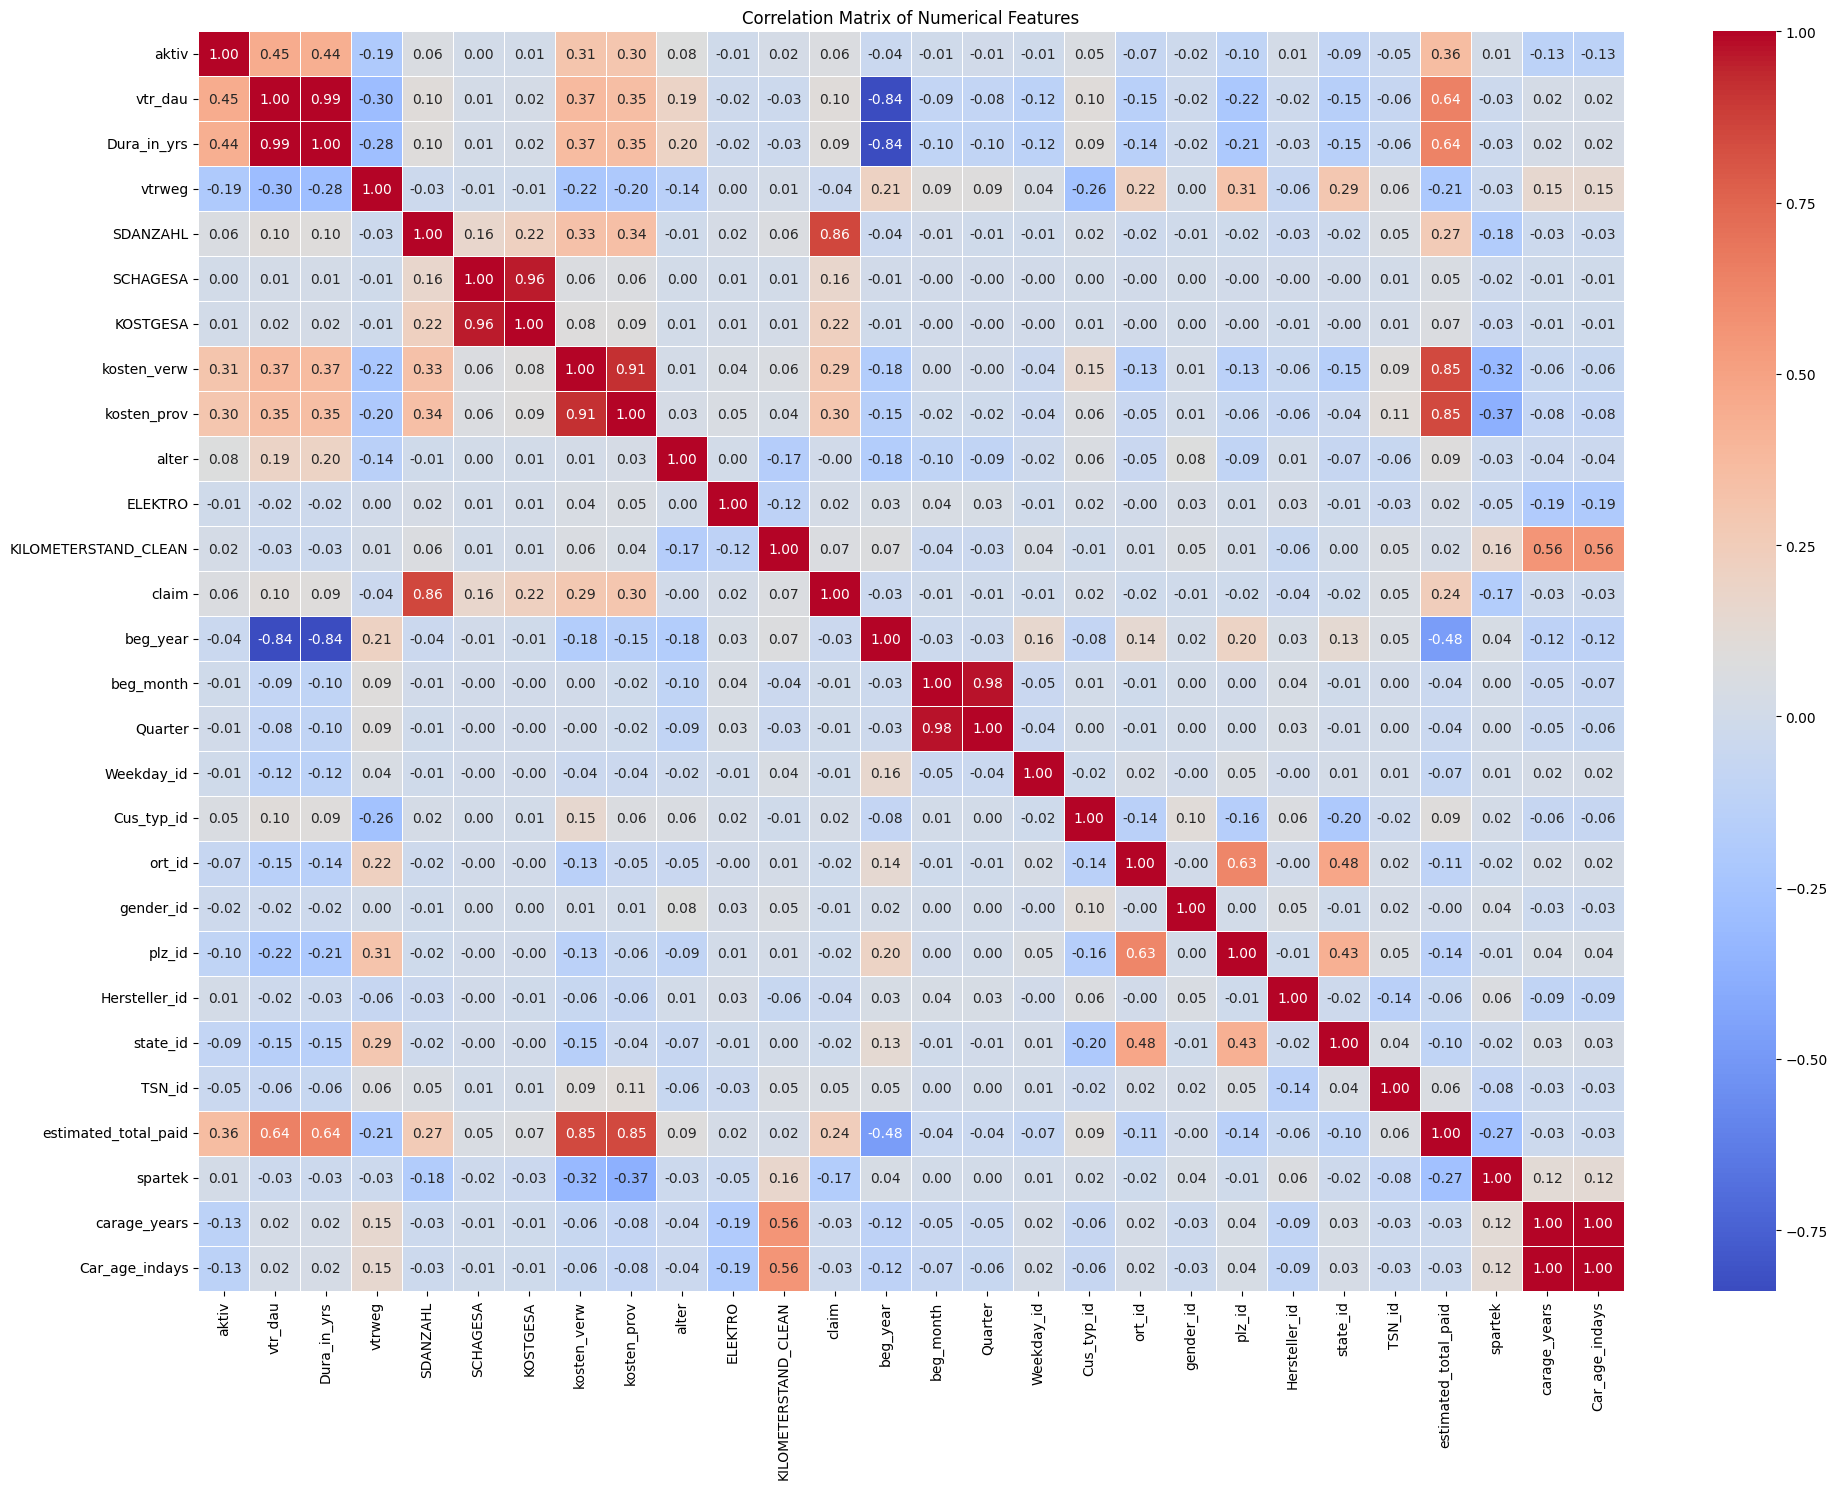

In [62]:

# 1. Select only numerical columns
numeric_df1 = df_imp.select_dtypes(include=['number'])

# 2. Compute correlation matrix
corr_matrix = numeric_df1.corr()

# 3. Display as heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

In [62]:
#import optuna
import joblib

[I 2025-06-17 13:30:31,053] A new study created in memory with name: no-name-4d9d29c2-b36b-4b01-8804-7318e8b2ea9b
[I 2025-06-17 13:32:10,024] Trial 0 finished with value: 0.8531067321564082 and parameters: {'n_estimators': 182, 'max_depth': 24, 'min_samples_split': 9, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 0 with value: 0.8531067321564082.
[I 2025-06-17 13:33:33,931] Trial 1 finished with value: 0.8569656952288381 and parameters: {'n_estimators': 168, 'max_depth': 27, 'min_samples_split': 18, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 1 with value: 0.8569656952288381.
[I 2025-06-17 13:39:42,080] Trial 2 finished with value: 0.8581165858455695 and parameters: {'n_estimators': 299, 'max_depth': 19, 'min_samples_split': 12, 'min_samples_leaf': 16, 'max_features': None}. Best is trial 2 with value: 0.8581165858455695.
[I 2025-06-17 13:41:16,795] Trial 3 finished with value: 0.8491905849637501 and parameters: {'n_estimators': 219, 'max_depth': 20, 

🎯 Best Trial:
FrozenTrial(number=4, state=1, values=[0.8642089806012829], datetime_start=datetime.datetime(2025, 6, 17, 13, 41, 16, 797036), datetime_complete=datetime.datetime(2025, 6, 17, 13, 44, 33, 190317), params={'n_estimators': 123, 'max_depth': 26, 'min_samples_split': 19, 'min_samples_leaf': 8, 'max_features': None}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=300, log=False, low=100, step=1), 'max_depth': IntDistribution(high=30, log=False, low=5, step=1), 'min_samples_split': IntDistribution(high=20, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=20, log=False, low=1, step=1), 'max_features': CategoricalDistribution(choices=('sqrt', 'log2', None))}, trial_id=4, value=None)
📊 Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.90      0.79      0.84     53254
           1       0.82      0.91      0.86     55103

    accuracy        

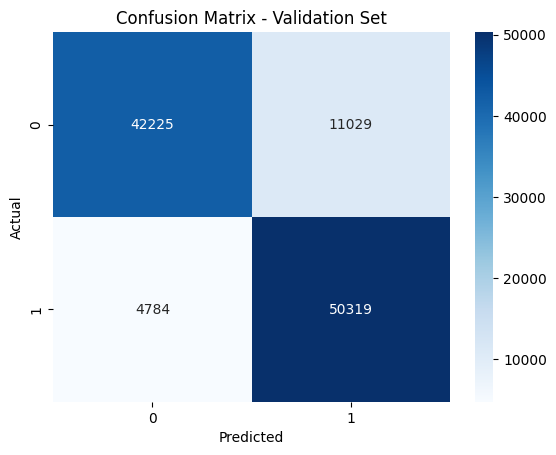

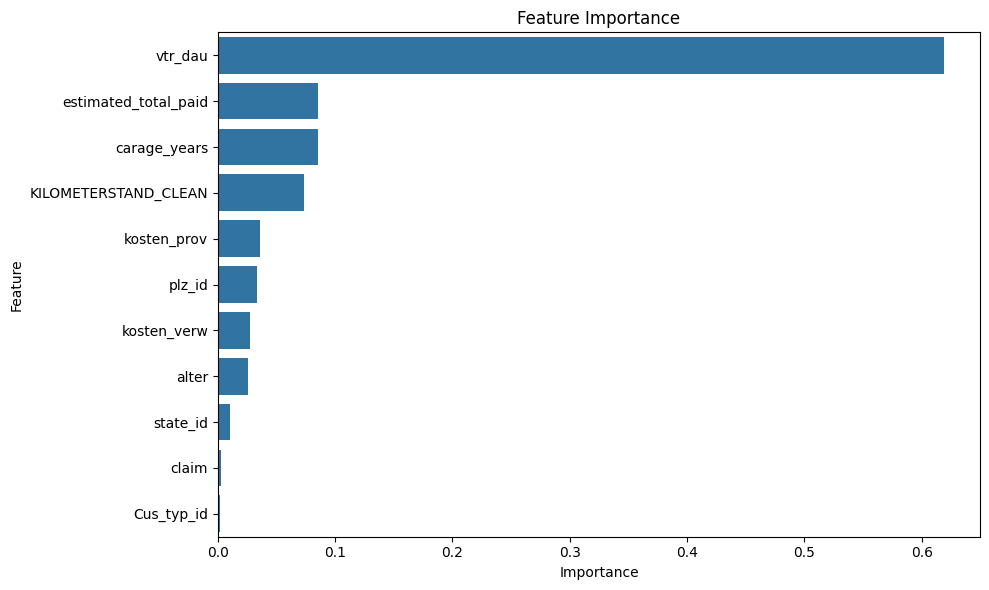

In [ ]:
#Training with Random Forest hyperparameter tuning using Optuna
import pandas as pd
import numpy as np
import optuna
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# ✅ 1. Select features and target
selected_features = [
    "vtr_dau", 
    "estimated_total_paid",
    "kosten_verw", 
    "kosten_prov", 
    "alter", 
    "KILOMETERSTAND_CLEAN", 
    "claim",
    "state_id",
    "plz_id",
    "Cus_typ_id",
    "carage_years"
]
target = 'aktiv'

# ✅ 2. Prepare data
df_model = df_imp[selected_features + [target]].dropna()
X = df_model[selected_features]
y = df_model[target]

# ✅ 3. Split data
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.11, random_state=42, stratify=y_temp)

# ✅ 4. Define Optuna objective
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
    }

    model = RandomForestClassifier(**params, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    return f1_score(y_val, y_pred)

# ✅ 5. Run Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5)

print("🎯 Best Trial:")
print(study.best_trial)

# ✅ 6. Train final model on best parameters
best_params = study.best_trial.params
final_model = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
final_model.fit(X_train, y_train)

# 💾 Save the model
joblib.dump(final_model, 'tuned_random_forest_model.pkl')

# ✅ 7. Evaluate on validation
y_pred_val = final_model.predict(X_val)

print("📊 Classification Report (Validation):")
print(classification_report(y_val, y_pred_val))

cm = confusion_matrix(y_val, y_pred_val)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Validation Set")
plt.show()

# ✅ 8. Feature Importance Plot
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': final_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title("Feature Importance")
plt.tight_layout()
plt.show()


In [ ]:
# training with xgboost vtr dau 
# PART 1: SETUP AND DATA PREPARATION
# Run this first to set up your data

import pandas as pd
import numpy as np
import optuna
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score, accuracy_score
from xgboost import XGBClassifier

# ✅ 1. Select features and target
selected_features = [ 
    "vtr_dau",
    "estimated_total_paid",
    "carage_years",
    "kosten_verw", 
    "kosten_prov", 
    "alter", 
    "KILOMETERSTAND_CLEAN", 
    "claim",
    "state_id",
    "plz_id",
    "Cus_typ_id"
]
target = 'aktiv'

print("🚀 Starting Enhanced XGBoost Training with Optuna")
print(f"📊 Features: {len(selected_features)}")
print(f"🎯 Target: {target}")

# ✅ 2. Prepare data
df_model = df_imp[selected_features + [target]].dropna()
print(f"📈 Dataset shape after cleaning: {df_model.shape}")
print(f"🎲 Target distribution:\n{df_model[target].value_counts(normalize=True)}")

X = df_model[selected_features]
y = df_model[target]

# ✅ 3. Split data strategically
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.11, random_state=42, stratify=y_temp
)

print(f"📊 Data splits:")
print(f"   Training: {X_train.shape[0]} samples")
print(f"   Validation: {X_val.shape[0]} samples") 
print(f"   Test: {X_test.shape[0]} samples")



🚀 Starting Enhanced XGBoost Training with Optuna
📊 Features: 11
🎯 Target: aktiv
📈 Dataset shape after cleaning: (1039121, 12)
🎲 Target distribution:
aktiv
1    0.511807
0    0.488193
Name: proportion, dtype: float64
📊 Data splits:
   Training: 832335 samples
   Validation: 102873 samples
   Test: 103913 samples


In [67]:
# ✅ 4. Enhanced Optuna objective function
def objective(trial):
    """
    Enhanced objective function with regularization focus to combat overfitting
    """
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 8),  # Reduced to combat overfitting
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'subsample': trial.suggest_float('subsample', 0.6, 0.9),  # Regularization
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 0.9),
        'gamma': trial.suggest_float('gamma', 0, 2),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.1, 3),  # L1 regularization
        'reg_lambda': trial.suggest_float('reg_lambda', 0.5, 3),  # L2 regularization
        'min_child_weight': trial.suggest_int('min_child_weight', 3, 10),  # Prevent overfitting
        'use_label_encoder': False,
        'random_state': 42,
        'n_jobs': -1,
        'eval_metric': 'logloss'
    }
    
    # Use cross-validation for robust evaluation
    model = XGBClassifier(**params)
    cv_scores = cross_val_score(
        model, X_train, y_train, 
        cv=3,  # 3-fold CV for speed
        scoring='f1',
        n_jobs=-1
    )
    
    return cv_scores.mean()

# ✅ 5. Run Optuna optimization with progress tracking
def print_callback(study, trial):
    """Callback to print progress"""
    print(f"⚡ Trial {trial.number:3d}: F1 = {trial.value:.4f} | Best = {study.best_value:.4f}")

print("\n🔍 Starting hyperparameter optimization...")
study = optuna.create_study(
    direction='maximize',
    sampler=optuna.samplers.TPESampler(seed=42)
)

n_trials = 100  

study.optimize(
    objective, 
    n_trials=n_trials,
    callbacks=[print_callback],
    show_progress_bar=True
)

print(f"\n🎯 Optimization completed!")
print(f"🏆 Best F1-Score: {study.best_value:.4f}")
print(f"📋 Best Parameters:")
for key, value in study.best_params.items():
    print(f"   {key}: {value}")

print("✅ Part 2 completed! Best parameters found.")

[I 2025-06-27 12:55:02,304] A new study created in memory with name: no-name-58b6d69d-cf64-49b1-8f3a-e47d2c97be25



🔍 Starting hyperparameter optimization...


Best trial: 0. Best value: 0.872878:   1%|          | 1/100 [00:26<43:48, 26.55s/it]

[I 2025-06-27 12:55:28,849] Trial 0 finished with value: 0.8728782230633866 and parameters: {'n_estimators': 250, 'max_depth': 8, 'learning_rate': 0.14907884894416698, 'subsample': 0.779597545259111, 'colsample_bytree': 0.6468055921327309, 'gamma': 0.3119890406724053, 'reg_alpha': 0.2684424752877784, 'reg_lambda': 2.665440364437338, 'min_child_weight': 7}. Best is trial 0 with value: 0.8728782230633866.
⚡ Trial   0: F1 = 0.8729 | Best = 0.8729


Best trial: 0. Best value: 0.872878:   2%|▏         | 2/100 [00:49<39:35, 24.24s/it]

[I 2025-06-27 12:55:51,477] Trial 1 finished with value: 0.8516916622751863 and parameters: {'n_estimators': 383, 'max_depth': 3, 'learning_rate': 0.19428287191077892, 'subsample': 0.8497327922401265, 'colsample_bytree': 0.6637017332034828, 'gamma': 0.36364993441420124, 'reg_alpha': 0.631873078574958, 'reg_lambda': 1.2606056073988443, 'min_child_weight': 7}. Best is trial 0 with value: 0.8728782230633866.
⚡ Trial   1: F1 = 0.8517 | Best = 0.8729


Best trial: 0. Best value: 0.872878:   3%|▎         | 3/100 [01:08<35:27, 21.94s/it]

[I 2025-06-27 12:56:10,669] Trial 2 finished with value: 0.8515245681467541 and parameters: {'n_estimators': 273, 'max_depth': 4, 'learning_rate': 0.1262520499972521, 'subsample': 0.6418481581956126, 'colsample_bytree': 0.6876433945605654, 'gamma': 0.7327236865873834, 'reg_alpha': 1.4226029542294043, 'reg_lambda': 2.462939903482534, 'min_child_weight': 4}. Best is trial 0 with value: 0.8728782230633866.
⚡ Trial   2: F1 = 0.8515 | Best = 0.8729


Best trial: 0. Best value: 0.872878:   4%|▍         | 4/100 [01:33<37:22, 23.36s/it]

[I 2025-06-27 12:56:36,220] Trial 3 finished with value: 0.8432258183794659 and parameters: {'n_estimators': 306, 'max_depth': 6, 'learning_rate': 0.01882557841679957, 'subsample': 0.7822634555704315, 'colsample_bytree': 0.6511572371061874, 'gamma': 0.13010318597055903, 'reg_alpha': 2.8517680580346663, 'reg_lambda': 2.9140800826863984, 'min_child_weight': 9}. Best is trial 0 with value: 0.8728782230633866.
⚡ Trial   3: F1 = 0.8432 | Best = 0.8729


Best trial: 0. Best value: 0.872878:   5%|▌         | 5/100 [01:45<30:27, 19.23s/it]

[I 2025-06-27 12:56:48,132] Trial 4 finished with value: 0.8456711947932996 and parameters: {'n_estimators': 222, 'max_depth': 3, 'learning_rate': 0.14000427503730983, 'subsample': 0.7320457481218804, 'colsample_bytree': 0.6366114704534336, 'gamma': 0.9903538202225404, 'reg_alpha': 0.19972671123413335, 'reg_lambda': 2.7733010051969553, 'min_child_weight': 5}. Best is trial 0 with value: 0.8728782230633866.
⚡ Trial   4: F1 = 0.8457 | Best = 0.8729


Best trial: 0. Best value: 0.872878:   6%|▌         | 6/100 [02:07<31:31, 20.12s/it]

[I 2025-06-27 12:57:09,983] Trial 5 finished with value: 0.8527314805149576 and parameters: {'n_estimators': 365, 'max_depth': 4, 'learning_rate': 0.10881292402378405, 'subsample': 0.7640130838029839, 'colsample_bytree': 0.6554563366576581, 'gamma': 1.9391692555291171, 'reg_alpha': 2.347885187747232, 'reg_lambda': 2.848747353910473, 'min_child_weight': 10}. Best is trial 0 with value: 0.8728782230633866.
⚡ Trial   5: F1 = 0.8527 | Best = 0.8729


Best trial: 0. Best value: 0.872878:   7%|▋         | 7/100 [02:42<38:50, 25.06s/it]

[I 2025-06-27 12:57:45,217] Trial 6 finished with value: 0.8541707700523139 and parameters: {'n_estimators': 339, 'max_depth': 8, 'learning_rate': 0.026813575389864702, 'subsample': 0.6587948587257435, 'colsample_bytree': 0.6135681866731614, 'gamma': 0.6506606615265287, 'reg_alpha': 1.227164140099498, 'reg_lambda': 1.1783725794347397, 'min_child_weight': 9}. Best is trial 0 with value: 0.8728782230633866.
⚡ Trial   6: F1 = 0.8542 | Best = 0.8729


Best trial: 0. Best value: 0.872878:   8%|▊         | 8/100 [02:57<33:20, 21.74s/it]

[I 2025-06-27 12:57:59,853] Trial 7 finished with value: 0.8500836992432476 and parameters: {'n_estimators': 243, 'max_depth': 4, 'learning_rate': 0.1131122558000672, 'subsample': 0.6422772674924287, 'colsample_bytree': 0.8406590942262119, 'gamma': 0.14910128735954165, 'reg_alpha': 2.9619721161415002, 'reg_lambda': 2.4306119232416434, 'min_child_weight': 4}. Best is trial 0 with value: 0.8728782230633866.
⚡ Trial   7: F1 = 0.8501 | Best = 0.8729


Best trial: 0. Best value: 0.872878:   9%|▉         | 9/100 [03:06<27:03, 17.84s/it]

[I 2025-06-27 12:58:09,109] Trial 8 finished with value: 0.8566123915975853 and parameters: {'n_estimators': 102, 'max_depth': 7, 'learning_rate': 0.14430289533104726, 'subsample': 0.8187021504122962, 'colsample_bytree': 0.8313811040057837, 'gamma': 0.14808930346818072, 'reg_alpha': 1.1395506127783905, 'reg_lambda': 0.7896726488128243, 'min_child_weight': 9}. Best is trial 0 with value: 0.8728782230633866.
⚡ Trial   8: F1 = 0.8566 | Best = 0.8729


Best trial: 0. Best value: 0.872878:  10%|█         | 10/100 [03:27<28:10, 18.79s/it]

[I 2025-06-27 12:58:30,022] Trial 9 finished with value: 0.8337537162161572 and parameters: {'n_estimators': 349, 'max_depth': 4, 'learning_rate': 0.02207608655434449, 'subsample': 0.6932946965146987, 'colsample_bytree': 0.6975549966080241, 'gamma': 1.4592123566761281, 'reg_alpha': 1.9489166669301181, 'reg_lambda': 2.7180318564408164, 'min_child_weight': 6}. Best is trial 0 with value: 0.8728782230633866.
⚡ Trial   9: F1 = 0.8338 | Best = 0.8729


Best trial: 10. Best value: 0.873476:  11%|█         | 11/100 [04:11<39:19, 26.51s/it]

[I 2025-06-27 12:59:14,049] Trial 10 finished with value: 0.8734757570306302 and parameters: {'n_estimators': 478, 'max_depth': 8, 'learning_rate': 0.06846190017554982, 'subsample': 0.8796871025735362, 'colsample_bytree': 0.7564020035588104, 'gamma': 1.3804941471382906, 'reg_alpha': 0.14391828759799483, 'reg_lambda': 2.0584412965736636, 'min_child_weight': 7}. Best is trial 10 with value: 0.8734757570306302.
⚡ Trial  10: F1 = 0.8735 | Best = 0.8735


Best trial: 10. Best value: 0.873476:  12%|█▏        | 12/100 [04:58<48:00, 32.73s/it]

[I 2025-06-27 13:00:00,997] Trial 11 finished with value: 0.8729600294240161 and parameters: {'n_estimators': 499, 'max_depth': 8, 'learning_rate': 0.06385020557104318, 'subsample': 0.8884016314330396, 'colsample_bytree': 0.7682720105447061, 'gamma': 1.4053984655159972, 'reg_alpha': 0.1319649411455889, 'reg_lambda': 1.933227444128073, 'min_child_weight': 7}. Best is trial 10 with value: 0.8734757570306302.
⚡ Trial  11: F1 = 0.8730 | Best = 0.8735


Best trial: 10. Best value: 0.873476:  13%|█▎        | 13/100 [05:38<50:43, 34.98s/it]

[I 2025-06-27 13:00:41,162] Trial 12 finished with value: 0.8673375886886499 and parameters: {'n_estimators': 487, 'max_depth': 7, 'learning_rate': 0.06462749629556146, 'subsample': 0.8996283921945077, 'colsample_bytree': 0.7578075033591596, 'gamma': 1.4354919635399794, 'reg_alpha': 0.7142510010721899, 'reg_lambda': 1.859579911002584, 'min_child_weight': 7}. Best is trial 10 with value: 0.8734757570306302.
⚡ Trial  12: F1 = 0.8673 | Best = 0.8735


Best trial: 10. Best value: 0.873476:  14%|█▍        | 14/100 [06:26<55:37, 38.81s/it]

[I 2025-06-27 13:01:28,816] Trial 13 finished with value: 0.8685616247583828 and parameters: {'n_estimators': 499, 'max_depth': 7, 'learning_rate': 0.07023886349538898, 'subsample': 0.8998087315924654, 'colsample_bytree': 0.772708536227043, 'gamma': 1.4343148980125828, 'reg_alpha': 0.6434086421316123, 'reg_lambda': 1.987105046062117, 'min_child_weight': 6}. Best is trial 10 with value: 0.8734757570306302.
⚡ Trial  13: F1 = 0.8686 | Best = 0.8735


Best trial: 14. Best value: 0.874854:  15%|█▌        | 15/100 [07:22<1:02:30, 44.13s/it]

[I 2025-06-27 13:02:25,269] Trial 14 finished with value: 0.8748536659631708 and parameters: {'n_estimators': 430, 'max_depth': 8, 'learning_rate': 0.07965922928762989, 'subsample': 0.8514671020966247, 'colsample_bytree': 0.898644486900997, 'gamma': 1.800778088179074, 'reg_alpha': 0.20787068205143308, 'reg_lambda': 2.1246157725062127, 'min_child_weight': 8}. Best is trial 14 with value: 0.8748536659631708.
⚡ Trial  14: F1 = 0.8749 | Best = 0.8749


Best trial: 14. Best value: 0.874854:  16%|█▌        | 16/100 [08:06<1:01:37, 44.02s/it]

[I 2025-06-27 13:03:09,050] Trial 15 finished with value: 0.8633169539937607 and parameters: {'n_estimators': 432, 'max_depth': 6, 'learning_rate': 0.08496836026047347, 'subsample': 0.8428564517818865, 'colsample_bytree': 0.8855382354407855, 'gamma': 1.9653723135556094, 'reg_alpha': 0.9746046345957774, 'reg_lambda': 2.244867484274771, 'min_child_weight': 8}. Best is trial 14 with value: 0.8748536659631708.
⚡ Trial  15: F1 = 0.8633 | Best = 0.8749


Best trial: 14. Best value: 0.874854:  17%|█▋        | 17/100 [08:46<59:05, 42.72s/it]  

[I 2025-06-27 13:03:48,734] Trial 16 finished with value: 0.860974547589333 and parameters: {'n_estimators': 423, 'max_depth': 7, 'learning_rate': 0.04516089600520267, 'subsample': 0.8195994558314559, 'colsample_bytree': 0.8164409974096344, 'gamma': 1.7192997503911027, 'reg_alpha': 1.8342955210287877, 'reg_lambda': 1.486926402594245, 'min_child_weight': 3}. Best is trial 14 with value: 0.8748536659631708.
⚡ Trial  16: F1 = 0.8610 | Best = 0.8749


Best trial: 17. Best value: 0.875952:  18%|█▊        | 18/100 [09:33<1:00:01, 43.92s/it]

[I 2025-06-27 13:04:35,451] Trial 17 finished with value: 0.8759517323666527 and parameters: {'n_estimators': 440, 'max_depth': 8, 'learning_rate': 0.09178589575168603, 'subsample': 0.8627677690519024, 'colsample_bytree': 0.7303646711181764, 'gamma': 1.139139601790227, 'reg_alpha': 0.4758741714784478, 'reg_lambda': 2.095073294877891, 'min_child_weight': 8}. Best is trial 17 with value: 0.8759517323666527.
⚡ Trial  17: F1 = 0.8760 | Best = 0.8760


Best trial: 17. Best value: 0.875952:  19%|█▉        | 19/100 [10:04<54:06, 40.08s/it]  

[I 2025-06-27 13:05:06,592] Trial 18 finished with value: 0.8583763662007563 and parameters: {'n_estimators': 419, 'max_depth': 5, 'learning_rate': 0.09244811462214603, 'subsample': 0.6023577359050039, 'colsample_bytree': 0.8872803954403383, 'gamma': 1.1289665050633757, 'reg_alpha': 0.5152842803686207, 'reg_lambda': 1.5893674061345304, 'min_child_weight': 10}. Best is trial 17 with value: 0.8759517323666527.
⚡ Trial  18: F1 = 0.8584 | Best = 0.8760


Best trial: 17. Best value: 0.875952:  20%|██        | 20/100 [10:20<43:44, 32.80s/it]

[I 2025-06-27 13:05:22,433] Trial 19 finished with value: 0.8602422129541126 and parameters: {'n_estimators': 182, 'max_depth': 6, 'learning_rate': 0.17710515121873333, 'subsample': 0.7295573357999031, 'colsample_bytree': 0.7230661267767929, 'gamma': 1.7030246066199215, 'reg_alpha': 0.8005919359126881, 'reg_lambda': 2.2718449910702176, 'min_child_weight': 8}. Best is trial 17 with value: 0.8759517323666527.
⚡ Trial  19: F1 = 0.8602 | Best = 0.8760


Best trial: 20. Best value: 0.87609:  21%|██        | 21/100 [11:06<48:30, 36.84s/it] 

[I 2025-06-27 13:06:08,699] Trial 20 finished with value: 0.8760903277474359 and parameters: {'n_estimators': 448, 'max_depth': 8, 'learning_rate': 0.09232598501126711, 'subsample': 0.8103473995372762, 'colsample_bytree': 0.798843799971821, 'gamma': 1.0569450171565322, 'reg_alpha': 1.6085865482410404, 'reg_lambda': 0.5290524040688824, 'min_child_weight': 8}. Best is trial 20 with value: 0.8760903277474359.
⚡ Trial  20: F1 = 0.8761 | Best = 0.8761


Best trial: 21. Best value: 0.877876:  22%|██▏       | 22/100 [11:53<51:57, 39.96s/it]

[I 2025-06-27 13:06:55,936] Trial 21 finished with value: 0.8778755821044034 and parameters: {'n_estimators': 448, 'max_depth': 8, 'learning_rate': 0.0993530808848362, 'subsample': 0.8522922835017706, 'colsample_bytree': 0.7974213882028469, 'gamma': 1.0623445256320312, 'reg_alpha': 1.6001357266119844, 'reg_lambda': 0.5433960087644223, 'min_child_weight': 8}. Best is trial 21 with value: 0.8778755821044034.
⚡ Trial  21: F1 = 0.8779 | Best = 0.8779


Best trial: 21. Best value: 0.877876:  23%|██▎       | 23/100 [12:33<51:10, 39.88s/it]

[I 2025-06-27 13:07:35,623] Trial 22 finished with value: 0.8724376380260958 and parameters: {'n_estimators': 461, 'max_depth': 7, 'learning_rate': 0.09983543358572267, 'subsample': 0.8098638486795713, 'colsample_bytree': 0.797926540662751, 'gamma': 1.0233646296017849, 'reg_alpha': 1.7983616222141272, 'reg_lambda': 0.5323479035757066, 'min_child_weight': 8}. Best is trial 21 with value: 0.8778755821044034.
⚡ Trial  22: F1 = 0.8724 | Best = 0.8779


Best trial: 23. Best value: 0.878055:  24%|██▍       | 24/100 [13:12<50:21, 39.76s/it]

[I 2025-06-27 13:08:15,098] Trial 23 finished with value: 0.8780549759117973 and parameters: {'n_estimators': 392, 'max_depth': 8, 'learning_rate': 0.12376181871571304, 'subsample': 0.8605983446230676, 'colsample_bytree': 0.7231190960139932, 'gamma': 0.8064783620998764, 'reg_alpha': 2.2029684941283008, 'reg_lambda': 0.5111390413139698, 'min_child_weight': 9}. Best is trial 23 with value: 0.8780549759117973.
⚡ Trial  23: F1 = 0.8781 | Best = 0.8781


Best trial: 23. Best value: 0.878055:  25%|██▌       | 25/100 [13:49<48:25, 38.74s/it]

[I 2025-06-27 13:08:51,456] Trial 24 finished with value: 0.8728141381000208 and parameters: {'n_estimators': 394, 'max_depth': 7, 'learning_rate': 0.12387008610514123, 'subsample': 0.8100714891453042, 'colsample_bytree': 0.7955505190937977, 'gamma': 0.7846919369619377, 'reg_alpha': 2.2474888333029344, 'reg_lambda': 0.5304804491121777, 'min_child_weight': 9}. Best is trial 23 with value: 0.8780549759117973.
⚡ Trial  24: F1 = 0.8728 | Best = 0.8781


Best trial: 25. Best value: 0.87845:  26%|██▌       | 26/100 [14:18<44:19, 35.93s/it] 

[I 2025-06-27 13:09:20,846] Trial 25 finished with value: 0.87844981168683 and parameters: {'n_estimators': 316, 'max_depth': 8, 'learning_rate': 0.15431131045326896, 'subsample': 0.8340179678691605, 'colsample_bytree': 0.8549077935350732, 'gamma': 0.5753706447309042, 'reg_alpha': 1.5576601238149486, 'reg_lambda': 0.8198963093594767, 'min_child_weight': 10}. Best is trial 25 with value: 0.87844981168683.
⚡ Trial  25: F1 = 0.8784 | Best = 0.8784


Best trial: 25. Best value: 0.87845:  27%|██▋       | 27/100 [14:39<38:14, 31.43s/it]

[I 2025-06-27 13:09:41,762] Trial 26 finished with value: 0.8611654395633085 and parameters: {'n_estimators': 310, 'max_depth': 5, 'learning_rate': 0.1674024421058817, 'subsample': 0.8677939485531448, 'colsample_bytree': 0.8575768334255262, 'gamma': 0.5076496869467334, 'reg_alpha': 2.194735875539827, 'reg_lambda': 0.8572231382551542, 'min_child_weight': 10}. Best is trial 25 with value: 0.87844981168683.
⚡ Trial  26: F1 = 0.8612 | Best = 0.8784


Best trial: 25. Best value: 0.87845:  28%|██▊       | 28/100 [15:11<38:03, 31.71s/it]

[I 2025-06-27 13:10:14,131] Trial 27 finished with value: 0.8768580598972265 and parameters: {'n_estimators': 388, 'max_depth': 7, 'learning_rate': 0.16161637906804743, 'subsample': 0.8346534171234551, 'colsample_bytree': 0.8609378744090144, 'gamma': 0.8699479412845572, 'reg_alpha': 2.711851578602249, 'reg_lambda': 0.8674720266866325, 'min_child_weight': 10}. Best is trial 25 with value: 0.87844981168683.
⚡ Trial  27: F1 = 0.8769 | Best = 0.8784


Best trial: 25. Best value: 0.87845:  29%|██▉       | 29/100 [15:41<36:58, 31.25s/it]

[I 2025-06-27 13:10:44,295] Trial 28 finished with value: 0.874133729596756 and parameters: {'n_estimators': 333, 'max_depth': 8, 'learning_rate': 0.12726697116178592, 'subsample': 0.7876041183620793, 'colsample_bytree': 0.7206532977573548, 'gamma': 0.5294343996093585, 'reg_alpha': 2.566326221522941, 'reg_lambda': 1.0535218010026395, 'min_child_weight': 9}. Best is trial 25 with value: 0.87844981168683.
⚡ Trial  28: F1 = 0.8741 | Best = 0.8784


Best trial: 29. Best value: 0.880118:  30%|███       | 30/100 [16:21<39:26, 33.80s/it]

[I 2025-06-27 13:11:24,061] Trial 29 finished with value: 0.8801175137709328 and parameters: {'n_estimators': 407, 'max_depth': 8, 'learning_rate': 0.1537962491643393, 'subsample': 0.7570718165074849, 'colsample_bytree': 0.7819617798103965, 'gamma': 0.3577452981593645, 'reg_alpha': 1.448115149145434, 'reg_lambda': 0.7261738544336587, 'min_child_weight': 10}. Best is trial 29 with value: 0.8801175137709328.
⚡ Trial  29: F1 = 0.8801 | Best = 0.8801


Best trial: 29. Best value: 0.880118:  31%|███       | 31/100 [16:46<35:40, 31.03s/it]

[I 2025-06-27 13:11:48,612] Trial 30 finished with value: 0.8637397257405631 and parameters: {'n_estimators': 279, 'max_depth': 6, 'learning_rate': 0.15534751479613595, 'subsample': 0.7588439603650721, 'colsample_bytree': 0.700605217482896, 'gamma': 0.34374723442224653, 'reg_alpha': 2.0487550286646714, 'reg_lambda': 0.7233720091951461, 'min_child_weight': 10}. Best is trial 29 with value: 0.8801175137709328.
⚡ Trial  30: F1 = 0.8637 | Best = 0.8801


Best trial: 29. Best value: 0.880118:  32%|███▏      | 32/100 [17:27<38:40, 34.12s/it]

[I 2025-06-27 13:12:29,944] Trial 31 finished with value: 0.8800053377702272 and parameters: {'n_estimators': 394, 'max_depth': 8, 'learning_rate': 0.13796844711490797, 'subsample': 0.7885580683205147, 'colsample_bytree': 0.8283386203827314, 'gamma': 0.5180238318675437, 'reg_alpha': 1.5800024471742544, 'reg_lambda': 0.9920967694526246, 'min_child_weight': 9}. Best is trial 29 with value: 0.8801175137709328.
⚡ Trial  31: F1 = 0.8800 | Best = 0.8801


Best trial: 32. Best value: 0.881778:  33%|███▎      | 33/100 [18:10<41:03, 36.77s/it]

[I 2025-06-27 13:13:12,890] Trial 32 finished with value: 0.8817777208315917 and parameters: {'n_estimators': 401, 'max_depth': 8, 'learning_rate': 0.18705959717899717, 'subsample': 0.7349081485133097, 'colsample_bytree': 0.862503219334668, 'gamma': 0.5038931252726566, 'reg_alpha': 1.4296792095368867, 'reg_lambda': 1.0330571332735738, 'min_child_weight': 10}. Best is trial 32 with value: 0.8817777208315917.
⚡ Trial  32: F1 = 0.8818 | Best = 0.8818


Best trial: 32. Best value: 0.881778:  34%|███▍      | 34/100 [18:45<39:40, 36.07s/it]

[I 2025-06-27 13:13:47,347] Trial 33 finished with value: 0.8772401201701724 and parameters: {'n_estimators': 364, 'max_depth': 7, 'learning_rate': 0.19649154411290803, 'subsample': 0.703557317131102, 'colsample_bytree': 0.8595526254670591, 'gamma': 0.44802426696791875, 'reg_alpha': 1.4144932556428087, 'reg_lambda': 1.0846289385095507, 'min_child_weight': 10}. Best is trial 32 with value: 0.8817777208315917.
⚡ Trial  33: F1 = 0.8772 | Best = 0.8818


Best trial: 32. Best value: 0.881778:  35%|███▌      | 35/100 [19:28<41:27, 38.26s/it]

[I 2025-06-27 13:14:30,720] Trial 34 finished with value: 0.8816674332095586 and parameters: {'n_estimators': 402, 'max_depth': 8, 'learning_rate': 0.17404690858604763, 'subsample': 0.7363313119385132, 'colsample_bytree': 0.8306581391746384, 'gamma': 0.6262842469103477, 'reg_alpha': 1.3621880523384262, 'reg_lambda': 1.4612353741068773, 'min_child_weight': 10}. Best is trial 32 with value: 0.8817777208315917.
⚡ Trial  34: F1 = 0.8817 | Best = 0.8818


Best trial: 32. Best value: 0.881778:  36%|███▌      | 36/100 [20:00<38:59, 36.56s/it]

[I 2025-06-27 13:15:03,300] Trial 35 finished with value: 0.87818040080005 and parameters: {'n_estimators': 404, 'max_depth': 7, 'learning_rate': 0.1819397332869732, 'subsample': 0.7378808714207742, 'colsample_bytree': 0.8199726474999368, 'gamma': 0.24832069712268595, 'reg_alpha': 1.3017862004670868, 'reg_lambda': 1.351279693877844, 'min_child_weight': 9}. Best is trial 32 with value: 0.8817777208315917.
⚡ Trial  35: F1 = 0.8782 | Best = 0.8818


Best trial: 32. Best value: 0.881778:  37%|███▋      | 37/100 [20:35<37:50, 36.04s/it]

[I 2025-06-27 13:15:38,143] Trial 36 finished with value: 0.8798935790430987 and parameters: {'n_estimators': 366, 'max_depth': 8, 'learning_rate': 0.18414124521758646, 'subsample': 0.7045246604466973, 'colsample_bytree': 0.8375631534865311, 'gamma': 0.40087233212363826, 'reg_alpha': 1.0193997194089959, 'reg_lambda': 1.0166842674793348, 'min_child_weight': 10}. Best is trial 32 with value: 0.8817777208315917.
⚡ Trial  36: F1 = 0.8799 | Best = 0.8818


Best trial: 32. Best value: 0.881778:  38%|███▊      | 38/100 [21:20<40:04, 38.78s/it]

[I 2025-06-27 13:16:23,299] Trial 37 finished with value: 0.8813350730522241 and parameters: {'n_estimators': 411, 'max_depth': 8, 'learning_rate': 0.1688941001666846, 'subsample': 0.7810110399598531, 'colsample_bytree': 0.7800397673045533, 'gamma': 0.27190273211871974, 'reg_alpha': 1.3857978200855476, 'reg_lambda': 1.3294428912388319, 'min_child_weight': 9}. Best is trial 32 with value: 0.8817777208315917.
⚡ Trial  37: F1 = 0.8813 | Best = 0.8818


Best trial: 32. Best value: 0.881778:  39%|███▉      | 39/100 [21:41<33:53, 33.33s/it]

[I 2025-06-27 13:16:43,931] Trial 38 finished with value: 0.852309812592109 and parameters: {'n_estimators': 412, 'max_depth': 3, 'learning_rate': 0.19930439902059338, 'subsample': 0.7709948612768012, 'colsample_bytree': 0.7834622070818632, 'gamma': 0.0584549147685402, 'reg_alpha': 1.389996841709709, 'reg_lambda': 1.6900191332245862, 'min_child_weight': 10}. Best is trial 32 with value: 0.8817777208315917.
⚡ Trial  38: F1 = 0.8523 | Best = 0.8818


Best trial: 32. Best value: 0.881778:  40%|████      | 40/100 [22:19<34:36, 34.61s/it]

[I 2025-06-27 13:17:21,524] Trial 39 finished with value: 0.8781959597791008 and parameters: {'n_estimators': 466, 'max_depth': 7, 'learning_rate': 0.1727350115996572, 'subsample': 0.7428135438979446, 'colsample_bytree': 0.8137959801973598, 'gamma': 0.26311926043161316, 'reg_alpha': 1.0866498978924086, 'reg_lambda': 1.3183487051916352, 'min_child_weight': 9}. Best is trial 32 with value: 0.8817777208315917.
⚡ Trial  39: F1 = 0.8782 | Best = 0.8818


Best trial: 32. Best value: 0.881778:  41%|████      | 41/100 [22:43<31:00, 31.54s/it]

[I 2025-06-27 13:17:45,882] Trial 40 finished with value: 0.8637798064645109 and parameters: {'n_estimators': 375, 'max_depth': 5, 'learning_rate': 0.18405835489430122, 'subsample': 0.7200633749826886, 'colsample_bytree': 0.73724097603134, 'gamma': 0.6996534791731022, 'reg_alpha': 0.9125695949239863, 'reg_lambda': 1.4597525879599695, 'min_child_weight': 10}. Best is trial 32 with value: 0.8817777208315917.
⚡ Trial  40: F1 = 0.8638 | Best = 0.8818


Best trial: 32. Best value: 0.881778:  42%|████▏     | 42/100 [23:18<31:30, 32.59s/it]

[I 2025-06-27 13:18:20,941] Trial 41 finished with value: 0.8781254619380917 and parameters: {'n_estimators': 355, 'max_depth': 8, 'learning_rate': 0.13712435520269822, 'subsample': 0.7863727191955225, 'colsample_bytree': 0.8738321401567675, 'gamma': 0.622511137216053, 'reg_alpha': 1.7166633528255413, 'reg_lambda': 1.2074326390370314, 'min_child_weight': 9}. Best is trial 32 with value: 0.8817777208315917.
⚡ Trial  41: F1 = 0.8781 | Best = 0.8818


Best trial: 32. Best value: 0.881778:  43%|████▎     | 43/100 [24:07<35:42, 37.59s/it]

[I 2025-06-27 13:19:10,189] Trial 42 finished with value: 0.8800603884322392 and parameters: {'n_estimators': 403, 'max_depth': 8, 'learning_rate': 0.14751225974368343, 'subsample': 0.7502005975632666, 'colsample_bytree': 0.8292777516333523, 'gamma': 0.018031355842955177, 'reg_alpha': 1.2680938732890126, 'reg_lambda': 0.9641802501760041, 'min_child_weight': 9}. Best is trial 32 with value: 0.8817777208315917.
⚡ Trial  42: F1 = 0.8801 | Best = 0.8818


Best trial: 32. Best value: 0.881778:  44%|████▍     | 44/100 [24:39<33:26, 35.84s/it]

[I 2025-06-27 13:19:41,939] Trial 43 finished with value: 0.8767638712754783 and parameters: {'n_estimators': 323, 'max_depth': 8, 'learning_rate': 0.16613434600202767, 'subsample': 0.6753442943128014, 'colsample_bytree': 0.783310127818176, 'gamma': 0.0569857064510542, 'reg_alpha': 1.2616317387163982, 'reg_lambda': 1.1762275367329154, 'min_child_weight': 10}. Best is trial 32 with value: 0.8817777208315917.
⚡ Trial  43: F1 = 0.8768 | Best = 0.8818


Best trial: 32. Best value: 0.881778:  45%|████▌     | 45/100 [25:06<30:18, 33.07s/it]

[I 2025-06-27 13:20:08,551] Trial 44 finished with value: 0.8762150013187516 and parameters: {'n_estimators': 286, 'max_depth': 8, 'learning_rate': 0.15236735905877027, 'subsample': 0.7544763987959154, 'colsample_bytree': 0.8430270125309015, 'gamma': 0.2010546904690642, 'reg_alpha': 1.1793582824358544, 'reg_lambda': 0.6931147236249589, 'min_child_weight': 9}. Best is trial 32 with value: 0.8817777208315917.
⚡ Trial  44: F1 = 0.8762 | Best = 0.8818


Best trial: 32. Best value: 0.881778:  46%|████▌     | 46/100 [25:43<30:51, 34.28s/it]

[I 2025-06-27 13:20:45,654] Trial 45 finished with value: 0.8810657831919597 and parameters: {'n_estimators': 380, 'max_depth': 8, 'learning_rate': 0.19245626234795798, 'subsample': 0.7182810994339229, 'colsample_bytree': 0.8069752012386466, 'gamma': 0.337131107433735, 'reg_alpha': 1.4308880273992055, 'reg_lambda': 1.4236097706510802, 'min_child_weight': 5}. Best is trial 32 with value: 0.8817777208315917.
⚡ Trial  45: F1 = 0.8811 | Best = 0.8818


Best trial: 32. Best value: 0.881778:  47%|████▋     | 47/100 [26:14<29:28, 33.37s/it]

[I 2025-06-27 13:21:16,915] Trial 46 finished with value: 0.8743273702520753 and parameters: {'n_estimators': 339, 'max_depth': 7, 'learning_rate': 0.19084969168090893, 'subsample': 0.7216649553444644, 'colsample_bytree': 0.7497014650974352, 'gamma': 0.3553601246740906, 'reg_alpha': 1.4526596563387606, 'reg_lambda': 1.736335372555861, 'min_child_weight': 5}. Best is trial 32 with value: 0.8817777208315917.
⚡ Trial  46: F1 = 0.8743 | Best = 0.8818


Best trial: 32. Best value: 0.881778:  48%|████▊     | 48/100 [26:50<29:36, 34.17s/it]

[I 2025-06-27 13:21:52,932] Trial 47 finished with value: 0.8812963785863038 and parameters: {'n_estimators': 374, 'max_depth': 8, 'learning_rate': 0.18956516419553876, 'subsample': 0.7735100469178823, 'colsample_bytree': 0.8079746324626853, 'gamma': 0.4449021139727842, 'reg_alpha': 1.9531284648176448, 'reg_lambda': 1.4129707043391724, 'min_child_weight': 5}. Best is trial 32 with value: 0.8817777208315917.
⚡ Trial  47: F1 = 0.8813 | Best = 0.8818


Best trial: 32. Best value: 0.881778:  49%|████▉     | 49/100 [27:14<26:23, 31.05s/it]

[I 2025-06-27 13:22:16,710] Trial 48 finished with value: 0.8750742592668406 and parameters: {'n_estimators': 246, 'max_depth': 8, 'learning_rate': 0.1890762128983644, 'subsample': 0.6924042921112745, 'colsample_bytree': 0.8077341714661855, 'gamma': 0.45386530439271394, 'reg_alpha': 1.939004000336002, 'reg_lambda': 1.4243917853168921, 'min_child_weight': 5}. Best is trial 32 with value: 0.8817777208315917.
⚡ Trial  48: F1 = 0.8751 | Best = 0.8818


Best trial: 32. Best value: 0.881778:  50%|█████     | 50/100 [27:45<25:47, 30.94s/it]

[I 2025-06-27 13:22:47,405] Trial 49 finished with value: 0.8770283274070922 and parameters: {'n_estimators': 371, 'max_depth': 7, 'learning_rate': 0.17462748713109058, 'subsample': 0.7749332983468054, 'colsample_bytree': 0.8491362855413084, 'gamma': 0.6692965822203207, 'reg_alpha': 1.698342047469107, 'reg_lambda': 1.574061664200904, 'min_child_weight': 4}. Best is trial 32 with value: 0.8817777208315917.
⚡ Trial  49: F1 = 0.8770 | Best = 0.8818


Best trial: 32. Best value: 0.881778:  51%|█████     | 51/100 [28:17<25:43, 31.49s/it]

[I 2025-06-27 13:23:20,174] Trial 50 finished with value: 0.8803662967393185 and parameters: {'n_estimators': 346, 'max_depth': 8, 'learning_rate': 0.1907181580069185, 'subsample': 0.7146528364880358, 'colsample_bytree': 0.8691654264275765, 'gamma': 0.18414886419016835, 'reg_alpha': 1.957419887960218, 'reg_lambda': 1.8197377351140407, 'min_child_weight': 6}. Best is trial 32 with value: 0.8817777208315917.
⚡ Trial  50: F1 = 0.8804 | Best = 0.8818


Best trial: 32. Best value: 0.881778:  52%|█████▏    | 52/100 [28:51<25:44, 32.17s/it]

[I 2025-06-27 13:23:53,939] Trial 51 finished with value: 0.8805710341442042 and parameters: {'n_estimators': 352, 'max_depth': 8, 'learning_rate': 0.19968147283216506, 'subsample': 0.7162700985551623, 'colsample_bytree': 0.8696386213739197, 'gamma': 0.15811805745166357, 'reg_alpha': 2.0034680032310233, 'reg_lambda': 1.8463045963421971, 'min_child_weight': 6}. Best is trial 32 with value: 0.8817777208315917.
⚡ Trial  51: F1 = 0.8806 | Best = 0.8818


Best trial: 32. Best value: 0.881778:  53%|█████▎    | 53/100 [29:26<25:47, 32.93s/it]

[I 2025-06-27 13:24:28,638] Trial 52 finished with value: 0.880909226622815 and parameters: {'n_estimators': 378, 'max_depth': 8, 'learning_rate': 0.1787753755359966, 'subsample': 0.6897560983180927, 'colsample_bytree': 0.8754609682042183, 'gamma': 0.2917415248022068, 'reg_alpha': 1.7404075179349607, 'reg_lambda': 1.6142185663633533, 'min_child_weight': 5}. Best is trial 32 with value: 0.8817777208315917.
⚡ Trial  52: F1 = 0.8809 | Best = 0.8818


Best trial: 53. Best value: 0.881805:  54%|█████▍    | 54/100 [30:14<28:38, 37.37s/it]

[I 2025-06-27 13:25:16,363] Trial 53 finished with value: 0.881805065065903 and parameters: {'n_estimators': 426, 'max_depth': 8, 'learning_rate': 0.17826430542065605, 'subsample': 0.6735019113063424, 'colsample_bytree': 0.8981941065145767, 'gamma': 0.29242423646671667, 'reg_alpha': 1.7984074692261873, 'reg_lambda': 1.5695008909806765, 'min_child_weight': 4}. Best is trial 53 with value: 0.881805065065903.
⚡ Trial  53: F1 = 0.8818 | Best = 0.8818


Best trial: 53. Best value: 0.881805:  55%|█████▌    | 55/100 [30:57<29:19, 39.09s/it]

[I 2025-06-27 13:25:59,484] Trial 54 finished with value: 0.8813886254695493 and parameters: {'n_estimators': 426, 'max_depth': 8, 'learning_rate': 0.17000381416185584, 'subsample': 0.6510513670188441, 'colsample_bytree': 0.8987180301666157, 'gamma': 0.44284069834858936, 'reg_alpha': 2.4184299167890657, 'reg_lambda': 1.2820116327649629, 'min_child_weight': 4}. Best is trial 53 with value: 0.881805065065903.
⚡ Trial  54: F1 = 0.8814 | Best = 0.8818


Best trial: 53. Best value: 0.881805:  56%|█████▌    | 56/100 [31:37<28:50, 39.32s/it]

[I 2025-06-27 13:26:39,319] Trial 55 finished with value: 0.8777094721545989 and parameters: {'n_estimators': 457, 'max_depth': 7, 'learning_rate': 0.16446806961390895, 'subsample': 0.6362563661600577, 'colsample_bytree': 0.897732654880219, 'gamma': 0.9313896863960118, 'reg_alpha': 2.50684235174998, 'reg_lambda': 1.283187315749324, 'min_child_weight': 3}. Best is trial 53 with value: 0.881805065065903.
⚡ Trial  55: F1 = 0.8777 | Best = 0.8818


Best trial: 53. Best value: 0.881805:  57%|█████▋    | 57/100 [32:17<28:21, 39.57s/it]

[I 2025-06-27 13:27:19,496] Trial 56 finished with value: 0.8808633540159869 and parameters: {'n_estimators': 427, 'max_depth': 8, 'learning_rate': 0.1706723305781766, 'subsample': 0.628186520941148, 'colsample_bytree': 0.8873945518052639, 'gamma': 0.42999059811409107, 'reg_alpha': 2.347720008462792, 'reg_lambda': 1.1637767000090695, 'min_child_weight': 4}. Best is trial 53 with value: 0.881805065065903.
⚡ Trial  56: F1 = 0.8809 | Best = 0.8818


Best trial: 53. Best value: 0.881805:  58%|█████▊    | 58/100 [33:00<28:24, 40.59s/it]

[I 2025-06-27 13:28:02,467] Trial 57 finished with value: 0.8780382529550529 and parameters: {'n_estimators': 482, 'max_depth': 7, 'learning_rate': 0.1617289933723148, 'subsample': 0.6610633425928472, 'colsample_bytree': 0.8970956583535947, 'gamma': 0.5954122980219798, 'reg_alpha': 2.0922562120745214, 'reg_lambda': 1.5601524919266272, 'min_child_weight': 4}. Best is trial 53 with value: 0.881805065065903.
⚡ Trial  57: F1 = 0.8780 | Best = 0.8818


Best trial: 58. Best value: 0.881893:  59%|█████▉    | 59/100 [33:43<28:12, 41.28s/it]

[I 2025-06-27 13:28:45,335] Trial 58 finished with value: 0.8818933798337438 and parameters: {'n_estimators': 438, 'max_depth': 8, 'learning_rate': 0.18600758617042862, 'subsample': 0.609734513730554, 'colsample_bytree': 0.8813834030063152, 'gamma': 0.48609951866278295, 'reg_alpha': 1.8715217543575935, 'reg_lambda': 1.6789901034714532, 'min_child_weight': 3}. Best is trial 58 with value: 0.8818933798337438.
⚡ Trial  58: F1 = 0.8819 | Best = 0.8819


Best trial: 58. Best value: 0.881893:  60%|██████    | 60/100 [34:07<24:15, 36.38s/it]

[I 2025-06-27 13:29:10,296] Trial 59 finished with value: 0.8524274324070271 and parameters: {'n_estimators': 437, 'max_depth': 3, 'learning_rate': 0.17992339301149013, 'subsample': 0.6041606925840425, 'colsample_bytree': 0.8817839116800718, 'gamma': 0.23918017063504102, 'reg_alpha': 2.882756210981413, 'reg_lambda': 1.6494324929328381, 'min_child_weight': 3}. Best is trial 58 with value: 0.8818933798337438.
⚡ Trial  59: F1 = 0.8524 | Best = 0.8819


Best trial: 58. Best value: 0.881893:  61%|██████    | 61/100 [34:23<19:29, 30.00s/it]

[I 2025-06-27 13:29:25,391] Trial 60 finished with value: 0.8456567108076903 and parameters: {'n_estimators': 178, 'max_depth': 6, 'learning_rate': 0.04363718299621733, 'subsample': 0.6154990974955543, 'colsample_bytree': 0.8998982068459764, 'gamma': 0.09387939415522362, 'reg_alpha': 1.7990562744265925, 'reg_lambda': 1.9837166644025852, 'min_child_weight': 3}. Best is trial 58 with value: 0.8818933798337438.
⚡ Trial  60: F1 = 0.8457 | Best = 0.8819


Best trial: 58. Best value: 0.881893:  62%|██████▏   | 62/100 [35:10<22:15, 35.16s/it]

[I 2025-06-27 13:30:12,590] Trial 61 finished with value: 0.8817531602395765 and parameters: {'n_estimators': 419, 'max_depth': 8, 'learning_rate': 0.1839238053060606, 'subsample': 0.65421004994671, 'colsample_bytree': 0.8826539686368845, 'gamma': 0.5205187937058476, 'reg_alpha': 1.8743750345869241, 'reg_lambda': 1.5076586533768987, 'min_child_weight': 4}. Best is trial 58 with value: 0.8818933798337438.
⚡ Trial  61: F1 = 0.8818 | Best = 0.8819


Best trial: 62. Best value: 0.882857:  63%|██████▎   | 63/100 [36:00<24:29, 39.72s/it]

[I 2025-06-27 13:31:02,949] Trial 62 finished with value: 0.8828571751713685 and parameters: {'n_estimators': 472, 'max_depth': 8, 'learning_rate': 0.17192435625566402, 'subsample': 0.6528060195648104, 'colsample_bytree': 0.885397952589904, 'gamma': 0.7549682170702304, 'reg_alpha': 1.8609424843878908, 'reg_lambda': 1.4998405108130313, 'min_child_weight': 4}. Best is trial 62 with value: 0.8828571751713685.
⚡ Trial  62: F1 = 0.8829 | Best = 0.8829


Best trial: 62. Best value: 0.882857:  64%|██████▍   | 64/100 [36:49<25:23, 42.31s/it]

[I 2025-06-27 13:31:51,303] Trial 63 finished with value: 0.8816184252516811 and parameters: {'n_estimators': 470, 'max_depth': 8, 'learning_rate': 0.15968773343952608, 'subsample': 0.6563389097677753, 'colsample_bytree': 0.8834759537432572, 'gamma': 0.7325352843556833, 'reg_alpha': 1.861198069290884, 'reg_lambda': 1.544378643032629, 'min_child_weight': 4}. Best is trial 62 with value: 0.8828571751713685.
⚡ Trial  63: F1 = 0.8816 | Best = 0.8829


Best trial: 64. Best value: 0.883258:  65%|██████▌   | 65/100 [37:33<25:01, 42.89s/it]

[I 2025-06-27 13:32:35,540] Trial 64 finished with value: 0.8832576571578246 and parameters: {'n_estimators': 490, 'max_depth': 8, 'learning_rate': 0.18478342561981484, 'subsample': 0.664551814416513, 'colsample_bytree': 0.8809603404933798, 'gamma': 0.771460499048684, 'reg_alpha': 1.8856191575932852, 'reg_lambda': 1.5341482947147234, 'min_child_weight': 4}. Best is trial 64 with value: 0.8832576571578246.
⚡ Trial  64: F1 = 0.8833 | Best = 0.8833


Best trial: 65. Best value: 0.883689:  66%|██████▌   | 66/100 [38:16<24:23, 43.06s/it]

[I 2025-06-27 13:33:19,000] Trial 65 finished with value: 0.8836886001938243 and parameters: {'n_estimators': 491, 'max_depth': 8, 'learning_rate': 0.18549210484432158, 'subsample': 0.672969598922817, 'colsample_bytree': 0.8632199719765657, 'gamma': 0.8626336132259256, 'reg_alpha': 1.659357821013648, 'reg_lambda': 1.7795463704620516, 'min_child_weight': 3}. Best is trial 65 with value: 0.8836886001938243.
⚡ Trial  65: F1 = 0.8837 | Best = 0.8837


Best trial: 65. Best value: 0.883689:  67%|██████▋   | 67/100 [39:01<23:55, 43.51s/it]

[I 2025-06-27 13:34:03,557] Trial 66 finished with value: 0.8835354653962626 and parameters: {'n_estimators': 495, 'max_depth': 8, 'learning_rate': 0.18502506154760595, 'subsample': 0.6744768139269025, 'colsample_bytree': 0.8652044818541904, 'gamma': 0.8321984561408641, 'reg_alpha': 2.118451279283362, 'reg_lambda': 1.9257695417954865, 'min_child_weight': 3}. Best is trial 65 with value: 0.8836886001938243.
⚡ Trial  66: F1 = 0.8835 | Best = 0.8837


Best trial: 65. Best value: 0.883689:  68%|██████▊   | 68/100 [39:40<22:35, 42.36s/it]

[I 2025-06-27 13:34:43,232] Trial 67 finished with value: 0.8799738338124614 and parameters: {'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.18620683680260589, 'subsample': 0.673936655991451, 'colsample_bytree': 0.8497466874559576, 'gamma': 0.8254290512460462, 'reg_alpha': 1.686102488087507, 'reg_lambda': 2.1703178468459163, 'min_child_weight': 3}. Best is trial 65 with value: 0.8836886001938243.
⚡ Trial  67: F1 = 0.8800 | Best = 0.8837


Best trial: 68. Best value: 0.883768:  69%|██████▉   | 69/100 [40:23<21:54, 42.41s/it]

[I 2025-06-27 13:35:25,749] Trial 68 finished with value: 0.8837675483157309 and parameters: {'n_estimators': 484, 'max_depth': 8, 'learning_rate': 0.19572534660018615, 'subsample': 0.6704993437290689, 'colsample_bytree': 0.868656769649983, 'gamma': 1.2066828123548228, 'reg_alpha': 2.104140848901579, 'reg_lambda': 1.7644352688643175, 'min_child_weight': 3}. Best is trial 68 with value: 0.8837675483157309.
⚡ Trial  68: F1 = 0.8838 | Best = 0.8838


Best trial: 68. Best value: 0.883768:  70%|███████   | 70/100 [41:06<21:19, 42.65s/it]

[I 2025-06-27 13:36:08,959] Trial 69 finished with value: 0.8829852518716709 and parameters: {'n_estimators': 487, 'max_depth': 8, 'learning_rate': 0.17930788795872268, 'subsample': 0.6708379499278995, 'colsample_bytree': 0.8659092960333374, 'gamma': 1.1752491242582581, 'reg_alpha': 2.124662738659038, 'reg_lambda': 1.914525749481026, 'min_child_weight': 3}. Best is trial 68 with value: 0.8837675483157309.
⚡ Trial  69: F1 = 0.8830 | Best = 0.8838


Best trial: 68. Best value: 0.883768:  71%|███████   | 71/100 [41:50<20:49, 43.09s/it]

[I 2025-06-27 13:36:53,098] Trial 70 finished with value: 0.8831504072794075 and parameters: {'n_estimators': 490, 'max_depth': 8, 'learning_rate': 0.19756187598989425, 'subsample': 0.6337037622202768, 'colsample_bytree': 0.868288689577036, 'gamma': 1.282655452300996, 'reg_alpha': 2.2670832844468864, 'reg_lambda': 1.9077672505091638, 'min_child_weight': 3}. Best is trial 68 with value: 0.8837675483157309.
⚡ Trial  70: F1 = 0.8832 | Best = 0.8838


Best trial: 68. Best value: 0.883768:  72%|███████▏  | 72/100 [42:33<20:00, 42.89s/it]

[I 2025-06-27 13:37:35,510] Trial 71 finished with value: 0.878935993791219 and parameters: {'n_estimators': 489, 'max_depth': 8, 'learning_rate': 0.19649819832959095, 'subsample': 0.6242504610029775, 'colsample_bytree': 0.6100803729997775, 'gamma': 1.2881702467639624, 'reg_alpha': 2.0967742092282537, 'reg_lambda': 1.9368726574057646, 'min_child_weight': 3}. Best is trial 68 with value: 0.8837675483157309.
⚡ Trial  71: F1 = 0.8789 | Best = 0.8838


Best trial: 68. Best value: 0.883768:  73%|███████▎  | 73/100 [43:15<19:10, 42.62s/it]

[I 2025-06-27 13:38:17,486] Trial 72 finished with value: 0.8832139533470703 and parameters: {'n_estimators': 475, 'max_depth': 8, 'learning_rate': 0.1961179566383823, 'subsample': 0.6430561462507572, 'colsample_bytree': 0.8640107606100259, 'gamma': 1.293618132159285, 'reg_alpha': 2.308774182331879, 'reg_lambda': 1.7985980030029924, 'min_child_weight': 3}. Best is trial 68 with value: 0.8837675483157309.
⚡ Trial  72: F1 = 0.8832 | Best = 0.8838


Best trial: 68. Best value: 0.883768:  74%|███████▍  | 74/100 [43:58<18:29, 42.69s/it]

[I 2025-06-27 13:39:00,346] Trial 73 finished with value: 0.8828062801850621 and parameters: {'n_estimators': 476, 'max_depth': 8, 'learning_rate': 0.19295353810772709, 'subsample': 0.6417042453191, 'colsample_bytree': 0.8643158204415609, 'gamma': 1.2143686224005688, 'reg_alpha': 2.2903520872347882, 'reg_lambda': 1.7980792602116265, 'min_child_weight': 3}. Best is trial 68 with value: 0.8837675483157309.
⚡ Trial  73: F1 = 0.8828 | Best = 0.8838


Best trial: 68. Best value: 0.883768:  75%|███████▌  | 75/100 [44:39<17:39, 42.40s/it]

[I 2025-06-27 13:39:42,055] Trial 74 finished with value: 0.8508106591877705 and parameters: {'n_estimators': 490, 'max_depth': 8, 'learning_rate': 0.012439027545607911, 'subsample': 0.6678297936313525, 'colsample_bytree': 0.8483319959662857, 'gamma': 0.9610033211542958, 'reg_alpha': 2.142180170682399, 'reg_lambda': 2.415277097283624, 'min_child_weight': 3}. Best is trial 68 with value: 0.8837675483157309.
⚡ Trial  74: F1 = 0.8508 | Best = 0.8838


Best trial: 68. Best value: 0.883768:  76%|███████▌  | 76/100 [45:05<14:58, 37.43s/it]

[I 2025-06-27 13:40:07,912] Trial 75 finished with value: 0.8600181950509351 and parameters: {'n_estimators': 455, 'max_depth': 4, 'learning_rate': 0.19928071833554256, 'subsample': 0.6856662054858806, 'colsample_bytree': 0.8410563646647479, 'gamma': 1.5107841450052641, 'reg_alpha': 2.675434452431783, 'reg_lambda': 2.060289089769115, 'min_child_weight': 3}. Best is trial 68 with value: 0.8837675483157309.
⚡ Trial  75: F1 = 0.8600 | Best = 0.8838


Best trial: 68. Best value: 0.883768:  77%|███████▋  | 77/100 [45:47<14:51, 38.76s/it]

[I 2025-06-27 13:40:49,768] Trial 76 finished with value: 0.8827484135902554 and parameters: {'n_estimators': 474, 'max_depth': 8, 'learning_rate': 0.1947191361139074, 'subsample': 0.6458746105160657, 'colsample_bytree': 0.8537855571561762, 'gamma': 1.344071916460963, 'reg_alpha': 2.377569929899237, 'reg_lambda': 1.9145611834476035, 'min_child_weight': 3}. Best is trial 68 with value: 0.8837675483157309.
⚡ Trial  76: F1 = 0.8827 | Best = 0.8838


Best trial: 68. Best value: 0.883768:  78%|███████▊  | 78/100 [46:26<14:11, 38.72s/it]

[I 2025-06-27 13:41:28,404] Trial 77 finished with value: 0.8778461397814946 and parameters: {'n_estimators': 489, 'max_depth': 7, 'learning_rate': 0.17587384979051093, 'subsample': 0.6835542190198052, 'colsample_bytree': 0.6735623882921482, 'gamma': 1.1332432924584823, 'reg_alpha': 2.173832094647431, 'reg_lambda': 1.7564310524432427, 'min_child_weight': 3}. Best is trial 68 with value: 0.8837675483157309.
⚡ Trial  77: F1 = 0.8778 | Best = 0.8838


Best trial: 68. Best value: 0.883768:  79%|███████▉  | 79/100 [56:06<1:10:26, 201.28s/it]

[I 2025-06-27 13:51:08,981] Trial 78 finished with value: 0.8777222919478843 and parameters: {'n_estimators': 450, 'max_depth': 8, 'learning_rate': 0.11453678794760946, 'subsample': 0.6348202083649929, 'colsample_bytree': 0.8692487708751997, 'gamma': 1.521241821137573, 'reg_alpha': 2.2879498569129106, 'reg_lambda': 1.8940795923326799, 'min_child_weight': 4}. Best is trial 68 with value: 0.8837675483157309.
⚡ Trial  78: F1 = 0.8777 | Best = 0.8838


Best trial: 68. Best value: 0.883768:  80%|████████  | 80/100 [56:55<51:52, 155.62s/it]  

[I 2025-06-27 13:51:58,068] Trial 79 finished with value: 0.8790851754146045 and parameters: {'n_estimators': 463, 'max_depth': 7, 'learning_rate': 0.18266431992545562, 'subsample': 0.6638162271531315, 'colsample_bytree': 0.8906756725118742, 'gamma': 1.206048232205709, 'reg_alpha': 2.4978974642239566, 'reg_lambda': 1.987189641362288, 'min_child_weight': 3}. Best is trial 68 with value: 0.8837675483157309.
⚡ Trial  79: F1 = 0.8791 | Best = 0.8838


Best trial: 68. Best value: 0.883768:  81%|████████  | 81/100 [57:44<39:08, 123.62s/it]

[I 2025-06-27 13:52:47,004] Trial 80 finished with value: 0.8830021298539048 and parameters: {'n_estimators': 496, 'max_depth': 8, 'learning_rate': 0.19445501634518253, 'subsample': 0.6244468891560566, 'colsample_bytree': 0.8763033142754433, 'gamma': 0.9034048070474587, 'reg_alpha': 2.035528908127686, 'reg_lambda': 2.1507781676464814, 'min_child_weight': 4}. Best is trial 68 with value: 0.8837675483157309.
⚡ Trial  80: F1 = 0.8830 | Best = 0.8838


Best trial: 68. Best value: 0.883768:  82%|████████▏ | 82/100 [58:38<30:50, 102.79s/it]

[I 2025-06-27 13:53:41,199] Trial 81 finished with value: 0.8833198974470721 and parameters: {'n_estimators': 499, 'max_depth': 8, 'learning_rate': 0.19298332485478437, 'subsample': 0.6235392889749434, 'colsample_bytree': 0.8761949003931038, 'gamma': 0.9060140155667901, 'reg_alpha': 2.0365985966816122, 'reg_lambda': 2.1813325135021446, 'min_child_weight': 4}. Best is trial 68 with value: 0.8837675483157309.
⚡ Trial  81: F1 = 0.8833 | Best = 0.8838


Best trial: 68. Best value: 0.883768:  83%|████████▎ | 83/100 [59:29<24:40, 87.06s/it] 

[I 2025-06-27 13:54:31,558] Trial 82 finished with value: 0.8832241920504836 and parameters: {'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.19187962366222766, 'subsample': 0.6215041768767305, 'colsample_bytree': 0.8752484750807425, 'gamma': 0.9038394349326531, 'reg_alpha': 2.0339225408309916, 'reg_lambda': 2.2848482932356124, 'min_child_weight': 3}. Best is trial 68 with value: 0.8837675483157309.
⚡ Trial  82: F1 = 0.8832 | Best = 0.8838


Best trial: 68. Best value: 0.883768:  84%|████████▍ | 84/100 [1:00:19<20:16, 76.01s/it]

[I 2025-06-27 13:55:21,795] Trial 83 finished with value: 0.883133429168438 and parameters: {'n_estimators': 499, 'max_depth': 8, 'learning_rate': 0.19590222065236002, 'subsample': 0.6198706846056781, 'colsample_bytree': 0.8761970597101679, 'gamma': 0.8904912830474238, 'reg_alpha': 2.0414406937518716, 'reg_lambda': 2.29989756392358, 'min_child_weight': 3}. Best is trial 68 with value: 0.8837675483157309.
⚡ Trial  83: F1 = 0.8831 | Best = 0.8838


Best trial: 68. Best value: 0.883768:  85%|████████▌ | 85/100 [1:01:07<16:54, 67.66s/it]

[I 2025-06-27 13:56:09,978] Trial 84 finished with value: 0.8824904141699558 and parameters: {'n_estimators': 482, 'max_depth': 8, 'learning_rate': 0.1997305340792257, 'subsample': 0.6195208848284055, 'colsample_bytree': 0.8575375017930177, 'gamma': 1.018511101047792, 'reg_alpha': 2.2317825580503503, 'reg_lambda': 2.5896065161961306, 'min_child_weight': 3}. Best is trial 68 with value: 0.8837675483157309.
⚡ Trial  84: F1 = 0.8825 | Best = 0.8838


Best trial: 68. Best value: 0.883768:  86%|████████▌ | 86/100 [1:01:52<14:11, 60.84s/it]

[I 2025-06-27 13:56:54,901] Trial 85 finished with value: 0.8828614598369744 and parameters: {'n_estimators': 499, 'max_depth': 8, 'learning_rate': 0.18804133310775012, 'subsample': 0.6299156566988807, 'colsample_bytree': 0.8360114310393051, 'gamma': 0.852303533881295, 'reg_alpha': 1.990948536183561, 'reg_lambda': 2.314916628377021, 'min_child_weight': 3}. Best is trial 68 with value: 0.8837675483157309.
⚡ Trial  85: F1 = 0.8829 | Best = 0.8838


Best trial: 68. Best value: 0.883768:  87%|████████▋ | 87/100 [1:02:34<11:56, 55.14s/it]

[I 2025-06-27 13:57:36,739] Trial 86 finished with value: 0.8829277308011504 and parameters: {'n_estimators': 464, 'max_depth': 8, 'learning_rate': 0.19418170822193437, 'subsample': 0.643440711010984, 'colsample_bytree': 0.8752534411361824, 'gamma': 1.0628019419839285, 'reg_alpha': 2.0559694422239354, 'reg_lambda': 2.2252655615957737, 'min_child_weight': 3}. Best is trial 68 with value: 0.8837675483157309.
⚡ Trial  86: F1 = 0.8829 | Best = 0.8838


Best trial: 68. Best value: 0.883768:  88%|████████▊ | 88/100 [1:03:17<10:19, 51.59s/it]

[I 2025-06-27 13:58:20,047] Trial 87 finished with value: 0.8788707844736051 and parameters: {'n_estimators': 476, 'max_depth': 8, 'learning_rate': 0.18888153717135778, 'subsample': 0.6119003470742156, 'colsample_bytree': 0.6287487942097083, 'gamma': 0.8910059251061869, 'reg_alpha': 2.320691816491773, 'reg_lambda': 2.588282202409075, 'min_child_weight': 3}. Best is trial 68 with value: 0.8837675483157309.
⚡ Trial  87: F1 = 0.8789 | Best = 0.8838


Best trial: 68. Best value: 0.883768:  89%|████████▉ | 89/100 [1:03:53<08:35, 46.85s/it]

[I 2025-06-27 13:58:55,850] Trial 88 finished with value: 0.8776634458343193 and parameters: {'n_estimators': 444, 'max_depth': 7, 'learning_rate': 0.18231781701067268, 'subsample': 0.6016574501434847, 'colsample_bytree': 0.8906791286015011, 'gamma': 1.2927138379687562, 'reg_alpha': 2.457614785214815, 'reg_lambda': 2.370043045839481, 'min_child_weight': 3}. Best is trial 68 with value: 0.8837675483157309.
⚡ Trial  88: F1 = 0.8777 | Best = 0.8838


Best trial: 68. Best value: 0.883768:  90%|█████████ | 90/100 [1:04:37<07:41, 46.13s/it]

[I 2025-06-27 13:59:40,301] Trial 89 finished with value: 0.8826487775187708 and parameters: {'n_estimators': 494, 'max_depth': 8, 'learning_rate': 0.1957382231969896, 'subsample': 0.6379338156383967, 'colsample_bytree': 0.8220782799602198, 'gamma': 1.083946445471884, 'reg_alpha': 2.6328464036026027, 'reg_lambda': 2.495636658594138, 'min_child_weight': 4}. Best is trial 68 with value: 0.8837675483157309.
⚡ Trial  89: F1 = 0.8826 | Best = 0.8838


Best trial: 68. Best value: 0.883768:  91%|█████████ | 91/100 [1:05:21<06:48, 45.42s/it]

[I 2025-06-27 14:00:24,053] Trial 90 finished with value: 0.8827295397565553 and parameters: {'n_estimators': 481, 'max_depth': 8, 'learning_rate': 0.17570621503667982, 'subsample': 0.6475113714986375, 'colsample_bytree': 0.8622763964636103, 'gamma': 0.9784287914229702, 'reg_alpha': 2.2246950065755557, 'reg_lambda': 2.031267947444611, 'min_child_weight': 3}. Best is trial 68 with value: 0.8837675483157309.
⚡ Trial  90: F1 = 0.8827 | Best = 0.8838


Best trial: 68. Best value: 0.883768:  92%|█████████▏| 92/100 [1:06:06<06:02, 45.30s/it]

[I 2025-06-27 14:01:09,080] Trial 91 finished with value: 0.882888849128094 and parameters: {'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.19276442060721577, 'subsample': 0.6260702648313364, 'colsample_bytree': 0.8740122081985426, 'gamma': 0.9241515107704457, 'reg_alpha': 2.012300317656813, 'reg_lambda': 2.094695516563596, 'min_child_weight': 4}. Best is trial 68 with value: 0.8837675483157309.
⚡ Trial  91: F1 = 0.8829 | Best = 0.8838


Best trial: 68. Best value: 0.883768:  93%|█████████▎| 93/100 [1:06:51<05:15, 45.08s/it]

[I 2025-06-27 14:01:53,650] Trial 92 finished with value: 0.8827724150577474 and parameters: {'n_estimators': 490, 'max_depth': 8, 'learning_rate': 0.19538614227763842, 'subsample': 0.6211758339844135, 'colsample_bytree': 0.8770238485856854, 'gamma': 0.7878922571196676, 'reg_alpha': 2.1668728562781654, 'reg_lambda': 2.134314019376095, 'min_child_weight': 4}. Best is trial 68 with value: 0.8837675483157309.
⚡ Trial  92: F1 = 0.8828 | Best = 0.8838


Best trial: 68. Best value: 0.883768:  94%|█████████▍| 94/100 [1:07:33<04:25, 44.18s/it]

[I 2025-06-27 14:02:35,714] Trial 93 finished with value: 0.8822156581045854 and parameters: {'n_estimators': 467, 'max_depth': 8, 'learning_rate': 0.18769329225714232, 'subsample': 0.6333472445482117, 'colsample_bytree': 0.8469164046627864, 'gamma': 0.8730323401926576, 'reg_alpha': 1.906863881246733, 'reg_lambda': 2.3024698842371736, 'min_child_weight': 4}. Best is trial 68 with value: 0.8837675483157309.
⚡ Trial  93: F1 = 0.8822 | Best = 0.8838


Best trial: 68. Best value: 0.883768:  95%|█████████▌| 95/100 [1:08:14<03:36, 43.32s/it]

[I 2025-06-27 14:03:17,023] Trial 94 finished with value: 0.8819330813953274 and parameters: {'n_estimators': 455, 'max_depth': 8, 'learning_rate': 0.1999425233432176, 'subsample': 0.6182242616380417, 'colsample_bytree': 0.8548728703250074, 'gamma': 0.9339764912877172, 'reg_alpha': 2.0574240927488314, 'reg_lambda': 2.201559633722886, 'min_child_weight': 3}. Best is trial 68 with value: 0.8837675483157309.
⚡ Trial  94: F1 = 0.8819 | Best = 0.8838


Best trial: 68. Best value: 0.883768:  96%|█████████▌| 96/100 [1:09:02<02:58, 44.60s/it]

[I 2025-06-27 14:04:04,624] Trial 95 finished with value: 0.8836411497189967 and parameters: {'n_estimators': 482, 'max_depth': 8, 'learning_rate': 0.1908862325230485, 'subsample': 0.7044831347223575, 'colsample_bytree': 0.8697696664762161, 'gamma': 0.7140635530398114, 'reg_alpha': 2.265354935370247, 'reg_lambda': 1.7507044076911307, 'min_child_weight': 3}. Best is trial 68 with value: 0.8837675483157309.
⚡ Trial  95: F1 = 0.8836 | Best = 0.8838


Best trial: 68. Best value: 0.883768:  97%|█████████▋| 97/100 [1:09:54<02:20, 46.74s/it]

[I 2025-06-27 14:04:56,363] Trial 96 finished with value: 0.8829248911796571 and parameters: {'n_estimators': 480, 'max_depth': 8, 'learning_rate': 0.1818136863653037, 'subsample': 0.6628837576006319, 'colsample_bytree': 0.8678964601854324, 'gamma': 0.7187760925076287, 'reg_alpha': 2.4004131947698806, 'reg_lambda': 1.713350525525541, 'min_child_weight': 3}. Best is trial 68 with value: 0.8837675483157309.
⚡ Trial  96: F1 = 0.8829 | Best = 0.8838


Best trial: 68. Best value: 0.883768:  98%|█████████▊| 98/100 [1:10:14<01:17, 38.76s/it]

[I 2025-06-27 14:05:16,489] Trial 97 finished with value: 0.8737314850303818 and parameters: {'n_estimators': 208, 'max_depth': 8, 'learning_rate': 0.19061937272596838, 'subsample': 0.6991943719275361, 'colsample_bytree': 0.8604184561313727, 'gamma': 0.8073801854512415, 'reg_alpha': 2.271918252524636, 'reg_lambda': 1.7936259685886364, 'min_child_weight': 3}. Best is trial 68 with value: 0.8837675483157309.
⚡ Trial  97: F1 = 0.8737 | Best = 0.8838


Best trial: 68. Best value: 0.883768:  99%|█████████▉| 99/100 [1:11:00<00:40, 40.94s/it]

[I 2025-06-27 14:06:02,507] Trial 98 finished with value: 0.8836831536375677 and parameters: {'n_estimators': 484, 'max_depth': 8, 'learning_rate': 0.18457207582928195, 'subsample': 0.6795178205519143, 'colsample_bytree': 0.8913706291258745, 'gamma': 0.9949850434084799, 'reg_alpha': 1.5283114381000904, 'reg_lambda': 1.8536625438601668, 'min_child_weight': 3}. Best is trial 68 with value: 0.8837675483157309.
⚡ Trial  98: F1 = 0.8837 | Best = 0.8838


Best trial: 68. Best value: 0.883768: 100%|██████████| 100/100 [1:11:39<00:00, 43.00s/it]

[I 2025-06-27 14:06:42,072] Trial 99 finished with value: 0.8788648411385932 and parameters: {'n_estimators': 462, 'max_depth': 7, 'learning_rate': 0.18560959236922187, 'subsample': 0.6803488869462503, 'colsample_bytree': 0.8917040363941418, 'gamma': 0.6665986944833006, 'reg_alpha': 1.6554663134786798, 'reg_lambda': 1.6283548265950476, 'min_child_weight': 3}. Best is trial 68 with value: 0.8837675483157309.
⚡ Trial  99: F1 = 0.8789 | Best = 0.8838

🎯 Optimization completed!
🏆 Best F1-Score: 0.8838
📋 Best Parameters:
   n_estimators: 484
   max_depth: 8
   learning_rate: 0.19572534660018615
   subsample: 0.6704993437290689
   colsample_bytree: 0.868656769649983
   gamma: 1.2066828123548228
   reg_alpha: 2.104140848901579
   reg_lambda: 1.7644352688643175
   min_child_weight: 3
✅ Part 2 completed! Best parameters found.


In [68]:
# ✅ 6. Train final model with best parameters
print("\n🏗️ Training final model...")
best_params = study.best_params.copy()
best_params.update({
    'use_label_encoder': False, 
    'eval_metric': 'logloss', 
    'random_state': 42, 
    'n_jobs': -1,
    'early_stopping_rounds': 20  # Add early stopping to model parameters
})

final_model = XGBClassifier(**best_params)

# Fit with evaluation set for early stopping
final_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=False
)

# 💾 Save the model
model_filename = 'enhanced_tuned_xgboost_model_vtr.pkl'
joblib.dump(final_model, model_filename)
print(f"💾 Model saved as: {model_filename}")

# ✅ 7. Comprehensive evaluation on validation set
print("\n📊 VALIDATION SET EVALUATION:")
y_pred_val = final_model.predict(X_val)
y_pred_proba_val = final_model.predict_proba(X_val)[:, 1]

print("Classification Report:")
print(classification_report(y_val, y_pred_val))

# Additional metrics
val_f1 = f1_score(y_val, y_pred_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
val_auc = roc_auc_score(y_val, y_pred_proba_val)

print(f"📈 Additional Metrics:")
print(f"   F1-Score: {val_f1:.4f}")
print(f"   Accuracy: {val_accuracy:.4f}")
print(f"   ROC-AUC: {val_auc:.4f}")

# ✅ 8. Final evaluation on test set
print("\n🎯 FINAL TEST SET EVALUATION:")
y_pred_test = final_model.predict(X_test)
y_pred_proba_test = final_model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred_test))

# Test metrics
test_f1 = f1_score(y_test, y_pred_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_auc = roc_auc_score(y_test, y_pred_proba_test)

print(f"📈 Test Set Metrics:")
print(f"   F1-Score: {test_f1:.4f}")
print(f"   Accuracy: {test_accuracy:.4f}")
print(f"   ROC-AUC: {test_auc:.4f}")

# Overfitting check
f1_diff = abs(val_f1 - test_f1)
if f1_diff < 0.02:
    print(f"✅ Model generalization: Excellent (F1 diff: {f1_diff:.4f})")
elif f1_diff < 0.05:
    print(f"⚠️  Model generalization: Good (F1 diff: {f1_diff:.4f})")
else:
    print(f"❌ Model generalization: Poor (F1 diff: {f1_diff:.4f})")

print("✅ Part 3 completed! Model trained and evaluated.")


🏗️ Training final model...
💾 Model saved as: enhanced_tuned_xgboost_model_vtr.pkl

📊 VALIDATION SET EVALUATION:
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87     50222
           1       0.85      0.93      0.89     52651

    accuracy                           0.88    102873
   macro avg       0.89      0.88      0.88    102873
weighted avg       0.88      0.88      0.88    102873

📈 Additional Metrics:
   F1-Score: 0.8894
   Accuracy: 0.8814
   ROC-AUC: 0.9521

🎯 FINAL TEST SET EVALUATION:
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87     50730
           1       0.85      0.93      0.89     53183

    accuracy                           0.88    103913
   macro avg       0.89      0.88      0.88    103913
weighted avg       0.88      0.88      0.88    103913

📈 Test Set Metrics:
   F1-Score: 0.8891
   Accuracy: 0.8811
   ROC-AUC: 0.95

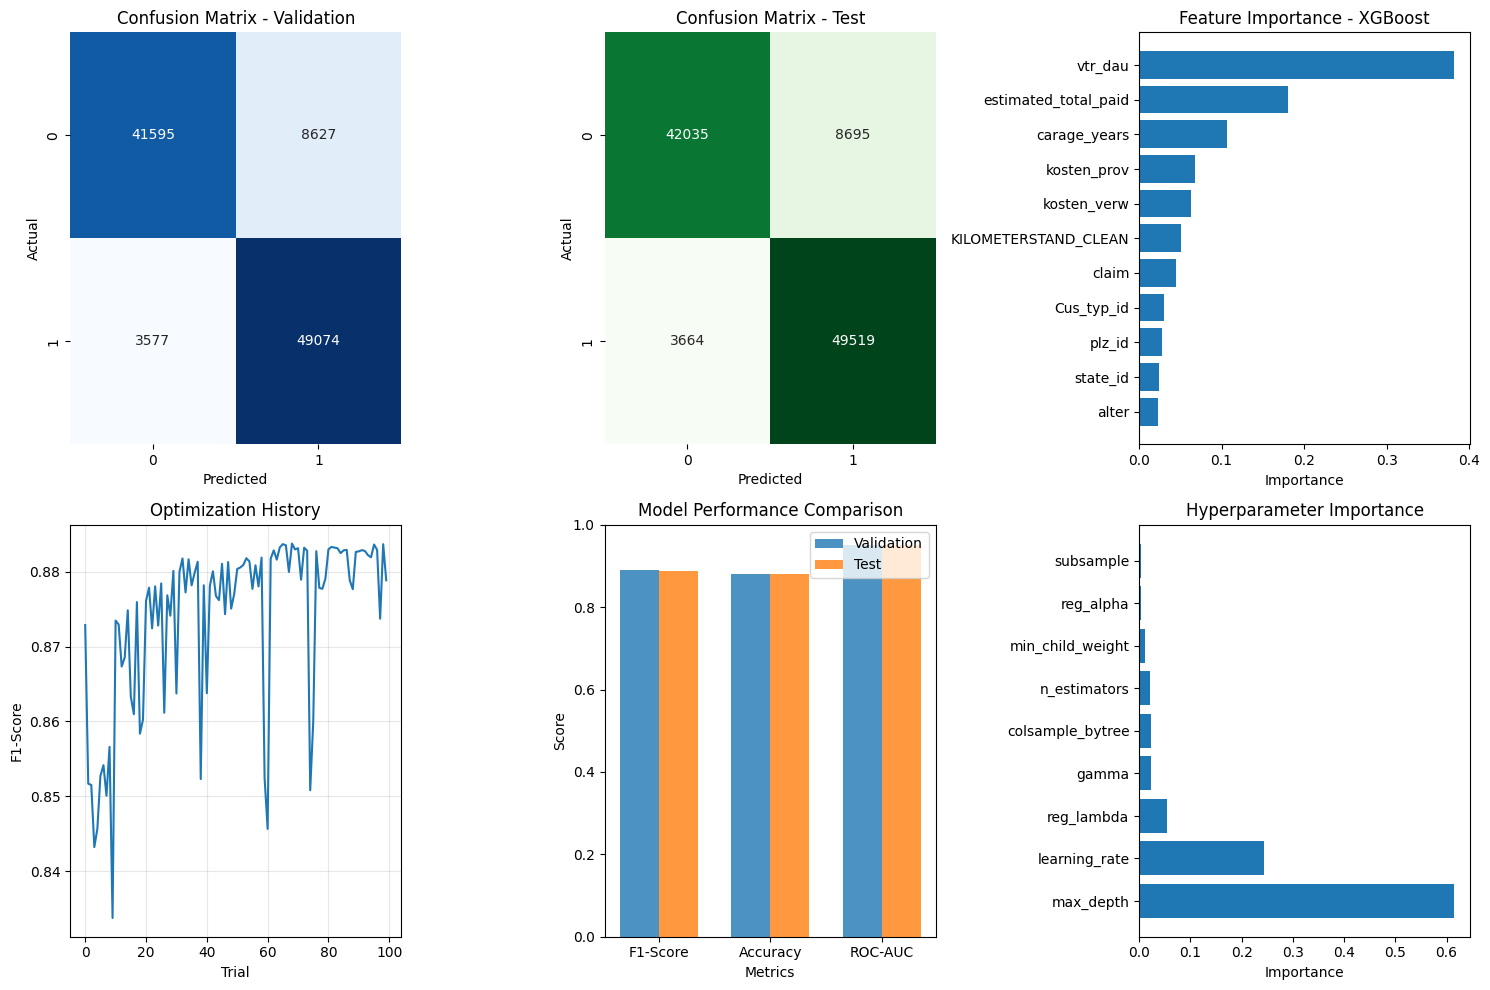


📋 FINAL SUMMARY REPORT
🎯 Best Hyperparameters Found:
   n_estimators: 484
   max_depth: 8
   learning_rate: 0.19572534660018615
   subsample: 0.6704993437290689
   colsample_bytree: 0.868656769649983
   gamma: 1.2066828123548228
   reg_alpha: 2.104140848901579
   reg_lambda: 1.7644352688643175
   min_child_weight: 3

📊 Performance Summary:
   Validation F1: 0.8894
   Test F1:       0.8891
   Validation AUC: 0.9521
   Test AUC:       0.9507

💾 Model saved as: enhanced_tuned_xgboost_model_vtr.pkl
🎉 Training completed successfully!
📊 Study results saved as: optuna_study_results.pkl

📈 Results Summary:
      Dataset  F1_Score  Accuracy   ROC_AUC
0  Validation  0.889408  0.881368  0.952108
1        Test  0.889054  0.881064  0.950701
✅ Part 4 completed! All visualizations and reports generated.


In [69]:
# PART 4: VISUALIZATIONS AND FINAL REPORT
# Run this after Part 3 is completed

# ✅ 9. Visualizations
plt.figure(figsize=(15, 10))

# Confusion Matrix - Validation
plt.subplot(2, 3, 1)
cm_val = confusion_matrix(y_val, y_pred_val)
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Validation")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Confusion Matrix - Test
plt.subplot(2, 3, 2)
cm_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Confusion Matrix - Test")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Feature Importance
plt.subplot(2, 3, 3)
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': final_model.feature_importances_
}).sort_values(by='Importance', ascending=True)

plt.barh(range(len(importance_df)), importance_df['Importance'])
plt.yticks(range(len(importance_df)), importance_df['Feature'])
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance")

# Optuna optimization history
plt.subplot(2, 3, 4)
trials_df = study.trials_dataframe()
plt.plot(trials_df['number'], trials_df['value'])
plt.title("Optimization History")
plt.xlabel("Trial")
plt.ylabel("F1-Score")
plt.grid(True, alpha=0.3)

# Performance comparison
plt.subplot(2, 3, 5)
metrics = ['F1-Score', 'Accuracy', 'ROC-AUC']
val_scores = [val_f1, val_accuracy, val_auc]
test_scores = [test_f1, test_accuracy, test_auc]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, val_scores, width, label='Validation', alpha=0.8)
plt.bar(x + width/2, test_scores, width, label='Test', alpha=0.8)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.ylim(0, 1)

# Parameter importance
plt.subplot(2, 3, 6)
param_importance = optuna.importance.get_param_importances(study)
params = list(param_importance.keys())
importances = list(param_importance.values())

plt.barh(range(len(params)), importances)
plt.yticks(range(len(params)), params)
plt.title("Hyperparameter Importance")
plt.xlabel("Importance")

plt.tight_layout()
plt.show()

# ✅ 10. Summary report
print("\n" + "="*60)
print("📋 FINAL SUMMARY REPORT")
print("="*60)
print(f"🎯 Best Hyperparameters Found:")
for param, value in study.best_params.items():
    print(f"   {param}: {value}")

print(f"\n📊 Performance Summary:")
print(f"   Validation F1: {val_f1:.4f}")
print(f"   Test F1:       {test_f1:.4f}")
print(f"   Validation AUC: {val_auc:.4f}")
print(f"   Test AUC:       {test_auc:.4f}")

print(f"\n💾 Model saved as: {model_filename}")
print("🎉 Training completed successfully!")

# ✅ 11. Optional: Save study results
study_filename = 'optuna_study_results.pkl'
joblib.dump(study, study_filename)
print(f"📊 Study results saved as: {study_filename}")

# Create results dataframe for future analysis
results_df = pd.DataFrame({
    'Dataset': ['Validation', 'Test'],
    'F1_Score': [val_f1, test_f1],
    'Accuracy': [val_accuracy, test_accuracy],
    'ROC_AUC': [val_auc, test_auc]
})

print(f"\n📈 Results Summary:")
print(results_df)

print("✅ Part 4 completed! All visualizations and reports generated.")

In [63]:
# training with xgboost without vtr dau
# PART 1: SETUP AND DATA PREPARATION
# Run this first to set up your data

import pandas as pd
import numpy as np
import optuna
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score, accuracy_score
from xgboost import XGBClassifier

# ✅ 1. Select features and target
selected_features = [ 
    "estimated_total_paid",
    "carage_years",
    "kosten_verw", 
    "kosten_prov", 
    "alter", 
    "KILOMETERSTAND_CLEAN", 
    "claim",
    "state_id",
    "plz_id",
    "Cus_typ_id"
]
target = 'aktiv'

print("🚀 Starting Enhanced XGBoost Training with Optuna")
print(f"📊 Features: {len(selected_features)}")
print(f"🎯 Target: {target}")

# ✅ 2. Prepare data
df_model = df_imp[selected_features + [target]].dropna()
print(f"📈 Dataset shape after cleaning: {df_model.shape}")
print(f"🎲 Target distribution:\n{df_model[target].value_counts(normalize=True)}")

X = df_model[selected_features]
y = df_model[target]

# ✅ 3. Split data strategically
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.11, random_state=42, stratify=y_temp
)

print(f"📊 Data splits:")
print(f"   Training: {X_train.shape[0]} samples")
print(f"   Validation: {X_val.shape[0]} samples") 
print(f"   Test: {X_test.shape[0]} samples")



🚀 Starting Enhanced XGBoost Training with Optuna
📊 Features: 10
🎯 Target: aktiv
📈 Dataset shape after cleaning: (1038708, 11)
🎲 Target distribution:
aktiv
1    0.51181
0    0.48819
Name: proportion, dtype: float64
📊 Data splits:
   Training: 832004 samples
   Validation: 102833 samples
   Test: 103871 samples


In [65]:
# ✅ 4. Enhanced Optuna objective function
def objective(trial):
    """
    Enhanced objective function with regularization focus to combat overfitting
    """
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 8),  # Reduced to combat overfitting
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'subsample': trial.suggest_float('subsample', 0.6, 0.9),  # Regularization
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 0.9),
        'gamma': trial.suggest_float('gamma', 0, 2),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.1, 3),  # L1 regularization
        'reg_lambda': trial.suggest_float('reg_lambda', 0.5, 3),  # L2 regularization
        'min_child_weight': trial.suggest_int('min_child_weight', 3, 10),  # Prevent overfitting
        'use_label_encoder': False,
        'random_state': 42,
        'n_jobs': -1,
        'eval_metric': 'logloss'
    }
    
    # Use cross-validation for robust evaluation
    model = XGBClassifier(**params)
    cv_scores = cross_val_score(
        model, X_train, y_train, 
        cv=3,  # 3-fold CV for speed
        scoring='f1',
        n_jobs=-1
    )
    
    return cv_scores.mean()

# ✅ 5. Run Optuna optimization with progress tracking
def print_callback(study, trial):
    """Callback to print progress"""
    print(f"⚡ Trial {trial.number:3d}: F1 = {trial.value:.4f} | Best = {study.best_value:.4f}")

print("\n🔍 Starting hyperparameter optimization...")
study = optuna.create_study(
    direction='maximize',
    sampler=optuna.samplers.TPESampler(seed=42)
)

n_trials = 100  

study.optimize(
    objective, 
    n_trials=n_trials,
    callbacks=[print_callback],
    show_progress_bar=True
)

print(f"\n🎯 Optimization completed!")
print(f"🏆 Best F1-Score: {study.best_value:.4f}")
print(f"📋 Best Parameters:")
for key, value in study.best_params.items():
    print(f"   {key}: {value}")

print("✅ Part 2 completed! Best parameters found.")

[I 2025-06-28 23:40:55,256] A new study created in memory with name: no-name-b8e45d91-ecb8-42ba-8fef-2a6230094b76



🔍 Starting hyperparameter optimization...


Best trial: 0. Best value: 0.83401:   1%|          | 1/100 [00:37<1:02:02, 37.60s/it]

[I 2025-06-28 23:41:32,856] Trial 0 finished with value: 0.8340096453386527 and parameters: {'n_estimators': 250, 'max_depth': 8, 'learning_rate': 0.14907884894416698, 'subsample': 0.779597545259111, 'colsample_bytree': 0.6468055921327309, 'gamma': 0.3119890406724053, 'reg_alpha': 0.2684424752877784, 'reg_lambda': 2.665440364437338, 'min_child_weight': 7}. Best is trial 0 with value: 0.8340096453386527.
⚡ Trial   0: F1 = 0.8340 | Best = 0.8340


Best trial: 0. Best value: 0.83401:   2%|▏         | 2/100 [00:59<46:36, 28.54s/it]  

[I 2025-06-28 23:41:55,048] Trial 1 finished with value: 0.8134718365064586 and parameters: {'n_estimators': 383, 'max_depth': 3, 'learning_rate': 0.19428287191077892, 'subsample': 0.8497327922401265, 'colsample_bytree': 0.6637017332034828, 'gamma': 0.36364993441420124, 'reg_alpha': 0.631873078574958, 'reg_lambda': 1.2606056073988443, 'min_child_weight': 7}. Best is trial 0 with value: 0.8340096453386527.
⚡ Trial   1: F1 = 0.8135 | Best = 0.8340


Best trial: 0. Best value: 0.83401:   3%|▎         | 3/100 [01:19<39:34, 24.48s/it]

[I 2025-06-28 23:42:14,708] Trial 2 finished with value: 0.8138812278593702 and parameters: {'n_estimators': 273, 'max_depth': 4, 'learning_rate': 0.1262520499972521, 'subsample': 0.6418481581956126, 'colsample_bytree': 0.6876433945605654, 'gamma': 0.7327236865873834, 'reg_alpha': 1.4226029542294043, 'reg_lambda': 2.462939903482534, 'min_child_weight': 4}. Best is trial 0 with value: 0.8340096453386527.
⚡ Trial   2: F1 = 0.8139 | Best = 0.8340


Best trial: 0. Best value: 0.83401:   4%|▍         | 4/100 [01:49<42:53, 26.81s/it]

[I 2025-06-28 23:42:45,082] Trial 3 finished with value: 0.8094647957426613 and parameters: {'n_estimators': 306, 'max_depth': 6, 'learning_rate': 0.01882557841679957, 'subsample': 0.7822634555704315, 'colsample_bytree': 0.6511572371061874, 'gamma': 0.13010318597055903, 'reg_alpha': 2.8517680580346663, 'reg_lambda': 2.9140800826863984, 'min_child_weight': 9}. Best is trial 0 with value: 0.8340096453386527.
⚡ Trial   3: F1 = 0.8095 | Best = 0.8340


Best trial: 0. Best value: 0.83401:   5%|▌         | 5/100 [02:02<34:07, 21.55s/it]

[I 2025-06-28 23:42:57,306] Trial 4 finished with value: 0.8090124955655998 and parameters: {'n_estimators': 222, 'max_depth': 3, 'learning_rate': 0.14000427503730983, 'subsample': 0.7320457481218804, 'colsample_bytree': 0.6366114704534336, 'gamma': 0.9903538202225404, 'reg_alpha': 0.19972671123413335, 'reg_lambda': 2.7733010051969553, 'min_child_weight': 5}. Best is trial 0 with value: 0.8340096453386527.
⚡ Trial   4: F1 = 0.8090 | Best = 0.8340


Best trial: 0. Best value: 0.83401:   6%|▌         | 6/100 [02:24<34:04, 21.75s/it]

[I 2025-06-28 23:43:19,435] Trial 5 finished with value: 0.8152819271879238 and parameters: {'n_estimators': 365, 'max_depth': 4, 'learning_rate': 0.10881292402378405, 'subsample': 0.7640130838029839, 'colsample_bytree': 0.6554563366576581, 'gamma': 1.9391692555291171, 'reg_alpha': 2.347885187747232, 'reg_lambda': 2.848747353910473, 'min_child_weight': 10}. Best is trial 0 with value: 0.8340096453386527.
⚡ Trial   5: F1 = 0.8153 | Best = 0.8340


Best trial: 0. Best value: 0.83401:   7%|▋         | 7/100 [03:10<46:21, 29.91s/it]

[I 2025-06-28 23:44:06,157] Trial 6 finished with value: 0.8205222171917913 and parameters: {'n_estimators': 339, 'max_depth': 8, 'learning_rate': 0.026813575389864702, 'subsample': 0.6587948587257435, 'colsample_bytree': 0.6135681866731614, 'gamma': 0.6506606615265287, 'reg_alpha': 1.227164140099498, 'reg_lambda': 1.1783725794347397, 'min_child_weight': 9}. Best is trial 0 with value: 0.8340096453386527.
⚡ Trial   6: F1 = 0.8205 | Best = 0.8340


Best trial: 0. Best value: 0.83401:   8%|▊         | 8/100 [03:26<38:44, 25.26s/it]

[I 2025-06-28 23:44:21,470] Trial 7 finished with value: 0.8134695858511911 and parameters: {'n_estimators': 243, 'max_depth': 4, 'learning_rate': 0.1131122558000672, 'subsample': 0.6422772674924287, 'colsample_bytree': 0.8406590942262119, 'gamma': 0.14910128735954165, 'reg_alpha': 2.9619721161415002, 'reg_lambda': 2.4306119232416434, 'min_child_weight': 4}. Best is trial 0 with value: 0.8340096453386527.
⚡ Trial   7: F1 = 0.8135 | Best = 0.8340


Best trial: 0. Best value: 0.83401:   9%|▉         | 9/100 [03:36<31:14, 20.60s/it]

[I 2025-06-28 23:44:31,800] Trial 8 finished with value: 0.8209668894810673 and parameters: {'n_estimators': 102, 'max_depth': 7, 'learning_rate': 0.14430289533104726, 'subsample': 0.8187021504122962, 'colsample_bytree': 0.8313811040057837, 'gamma': 0.14808930346818072, 'reg_alpha': 1.1395506127783905, 'reg_lambda': 0.7896726488128243, 'min_child_weight': 9}. Best is trial 0 with value: 0.8340096453386527.
⚡ Trial   8: F1 = 0.8210 | Best = 0.8340


Best trial: 0. Best value: 0.83401:  10%|█         | 10/100 [03:59<31:48, 21.20s/it]

[I 2025-06-28 23:44:54,363] Trial 9 finished with value: 0.8015323994113137 and parameters: {'n_estimators': 349, 'max_depth': 4, 'learning_rate': 0.02207608655434449, 'subsample': 0.6932946965146987, 'colsample_bytree': 0.6975549966080241, 'gamma': 1.4592123566761281, 'reg_alpha': 1.9489166669301181, 'reg_lambda': 2.7180318564408164, 'min_child_weight': 6}. Best is trial 0 with value: 0.8340096453386527.
⚡ Trial   9: F1 = 0.8015 | Best = 0.8340


Best trial: 0. Best value: 0.83401:  11%|█         | 11/100 [04:38<39:43, 26.78s/it]

[I 2025-06-28 23:45:33,778] Trial 10 finished with value: 0.8321988735051168 and parameters: {'n_estimators': 478, 'max_depth': 8, 'learning_rate': 0.06846190017554982, 'subsample': 0.8796871025735362, 'colsample_bytree': 0.7564020035588104, 'gamma': 1.3804941471382906, 'reg_alpha': 0.14391828759799483, 'reg_lambda': 2.0584412965736636, 'min_child_weight': 7}. Best is trial 0 with value: 0.8340096453386527.
⚡ Trial  10: F1 = 0.8322 | Best = 0.8340


Best trial: 0. Best value: 0.83401:  12%|█▏        | 12/100 [05:19<45:26, 30.98s/it]

[I 2025-06-28 23:46:14,383] Trial 11 finished with value: 0.831858365183258 and parameters: {'n_estimators': 499, 'max_depth': 8, 'learning_rate': 0.06385020557104318, 'subsample': 0.8884016314330396, 'colsample_bytree': 0.7682720105447061, 'gamma': 1.4053984655159972, 'reg_alpha': 0.1319649411455889, 'reg_lambda': 1.933227444128073, 'min_child_weight': 7}. Best is trial 0 with value: 0.8340096453386527.
⚡ Trial  11: F1 = 0.8319 | Best = 0.8340


Best trial: 0. Best value: 0.83401:  13%|█▎        | 13/100 [05:54<46:55, 32.36s/it]

[I 2025-06-28 23:46:49,925] Trial 12 finished with value: 0.827335937239217 and parameters: {'n_estimators': 476, 'max_depth': 7, 'learning_rate': 0.07433400076272832, 'subsample': 0.8990975244271294, 'colsample_bytree': 0.7406397936973761, 'gamma': 1.4178743213208747, 'reg_alpha': 0.704012771715589, 'reg_lambda': 1.9637597249046477, 'min_child_weight': 7}. Best is trial 0 with value: 0.8340096453386527.
⚡ Trial  12: F1 = 0.8273 | Best = 0.8340


Best trial: 0. Best value: 0.83401:  14%|█▍        | 14/100 [06:09<38:35, 26.93s/it]

[I 2025-06-28 23:47:04,285] Trial 13 finished with value: 0.8259722338933638 and parameters: {'n_estimators': 171, 'max_depth': 7, 'learning_rate': 0.18656387492194187, 'subsample': 0.8192733906910248, 'colsample_bytree': 0.7755197795880059, 'gamma': 1.750402751752063, 'reg_alpha': 0.6482768598253295, 'reg_lambda': 2.2205737798754983, 'min_child_weight': 6}. Best is trial 0 with value: 0.8340096453386527.
⚡ Trial  13: F1 = 0.8260 | Best = 0.8340


Best trial: 14. Best value: 0.849381:  15%|█▌        | 15/100 [06:52<45:16, 31.96s/it]

[I 2025-06-28 23:47:47,896] Trial 14 finished with value: 0.8493811092037268 and parameters: {'n_estimators': 417, 'max_depth': 8, 'learning_rate': 0.16402190794570823, 'subsample': 0.7248094400752194, 'colsample_bytree': 0.8981898888016117, 'gamma': 1.0622480607029205, 'reg_alpha': 0.38595662313701007, 'reg_lambda': 1.5183081593096994, 'min_child_weight': 8}. Best is trial 14 with value: 0.8493811092037268.
⚡ Trial  14: F1 = 0.8494 | Best = 0.8494


Best trial: 14. Best value: 0.849381:  16%|█▌        | 16/100 [07:24<44:35, 31.85s/it]

[I 2025-06-28 23:48:19,496] Trial 15 finished with value: 0.833932558025002 and parameters: {'n_estimators': 417, 'max_depth': 6, 'learning_rate': 0.16098261918129686, 'subsample': 0.716481202370179, 'colsample_bytree': 0.8850328991425761, 'gamma': 0.9792008227027074, 'reg_alpha': 0.9486881968745856, 'reg_lambda': 1.3415137139637412, 'min_child_weight': 8}. Best is trial 14 with value: 0.8493811092037268.
⚡ Trial  15: F1 = 0.8339 | Best = 0.8494


Best trial: 14. Best value: 0.849381:  17%|█▋        | 17/100 [08:03<47:01, 33.99s/it]

[I 2025-06-28 23:48:58,470] Trial 16 finished with value: 0.8426400946160922 and parameters: {'n_estimators': 426, 'max_depth': 7, 'learning_rate': 0.16951246120171826, 'subsample': 0.6052353425615931, 'colsample_bytree': 0.8164409974096344, 'gamma': 0.5645302618339751, 'reg_alpha': 1.7566916405983979, 'reg_lambda': 1.4954404747818943, 'min_child_weight': 3}. Best is trial 14 with value: 0.8493811092037268.
⚡ Trial  16: F1 = 0.8426 | Best = 0.8494


Best trial: 14. Best value: 0.849381:  18%|█▊        | 18/100 [08:41<48:10, 35.24s/it]

[I 2025-06-28 23:49:36,632] Trial 17 finished with value: 0.8442361884944525 and parameters: {'n_estimators': 421, 'max_depth': 7, 'learning_rate': 0.1686776008493599, 'subsample': 0.6916629295594358, 'colsample_bytree': 0.889106345434294, 'gamma': 0.6602299713665771, 'reg_alpha': 1.9195174971834064, 'reg_lambda': 1.6368937220352058, 'min_child_weight': 3}. Best is trial 14 with value: 0.8493811092037268.
⚡ Trial  17: F1 = 0.8442 | Best = 0.8494


Best trial: 14. Best value: 0.849381:  19%|█▉        | 19/100 [09:15<47:06, 34.90s/it]

[I 2025-06-28 23:50:10,719] Trial 18 finished with value: 0.8359583222190133 and parameters: {'n_estimators': 418, 'max_depth': 6, 'learning_rate': 0.17684558601474748, 'subsample': 0.681825853448734, 'colsample_bytree': 0.893208092294756, 'gamma': 1.1471818086245518, 'reg_alpha': 2.2040746024504223, 'reg_lambda': 1.6518877606576685, 'min_child_weight': 3}. Best is trial 14 with value: 0.8493811092037268.
⚡ Trial  18: F1 = 0.8360 | Best = 0.8494


Best trial: 14. Best value: 0.849381:  20%|██        | 20/100 [09:47<45:13, 33.92s/it]

[I 2025-06-28 23:50:42,378] Trial 19 finished with value: 0.8211205735012327 and parameters: {'n_estimators': 451, 'max_depth': 5, 'learning_rate': 0.0861835851539274, 'subsample': 0.7332731413881242, 'colsample_bytree': 0.8627047064668084, 'gamma': 0.8415559655500817, 'reg_alpha': 2.5147573446433773, 'reg_lambda': 0.8962709821088296, 'min_child_weight': 5}. Best is trial 14 with value: 0.8493811092037268.
⚡ Trial  19: F1 = 0.8211 | Best = 0.8494


Best trial: 14. Best value: 0.849381:  21%|██        | 21/100 [10:21<44:58, 34.16s/it]

[I 2025-06-28 23:51:17,077] Trial 20 finished with value: 0.8434795975327236 and parameters: {'n_estimators': 392, 'max_depth': 7, 'learning_rate': 0.19928282303699663, 'subsample': 0.6971029596578368, 'colsample_bytree': 0.798843799971821, 'gamma': 1.1437544615292659, 'reg_alpha': 1.7403337492085718, 'reg_lambda': 0.5290524040688824, 'min_child_weight': 8}. Best is trial 14 with value: 0.8493811092037268.
⚡ Trial  20: F1 = 0.8435 | Best = 0.8494


Best trial: 14. Best value: 0.849381:  22%|██▏       | 22/100 [10:56<44:28, 34.22s/it]

[I 2025-06-28 23:51:51,432] Trial 21 finished with value: 0.8411517660099298 and parameters: {'n_estimators': 390, 'max_depth': 7, 'learning_rate': 0.18466308808316068, 'subsample': 0.7023162078832399, 'colsample_bytree': 0.7997919103895375, 'gamma': 1.1234087879636552, 'reg_alpha': 1.6292784313548585, 'reg_lambda': 0.5433960087644223, 'min_child_weight': 8}. Best is trial 14 with value: 0.8493811092037268.
⚡ Trial  21: F1 = 0.8412 | Best = 0.8494


Best trial: 14. Best value: 0.849381:  23%|██▎       | 23/100 [11:31<44:19, 34.54s/it]

[I 2025-06-28 23:52:26,712] Trial 22 finished with value: 0.8476641091806177 and parameters: {'n_estimators': 334, 'max_depth': 8, 'learning_rate': 0.1998443507056505, 'subsample': 0.6708969605428187, 'colsample_bytree': 0.8608520219401069, 'gamma': 0.498867620322782, 'reg_alpha': 1.9238117895159823, 'reg_lambda': 1.7803330589333133, 'min_child_weight': 8}. Best is trial 14 with value: 0.8493811092037268.
⚡ Trial  22: F1 = 0.8477 | Best = 0.8494


Best trial: 14. Best value: 0.849381:  24%|██▍       | 24/100 [12:05<43:29, 34.33s/it]

[I 2025-06-28 23:53:00,562] Trial 23 finished with value: 0.8441588393994158 and parameters: {'n_estimators': 328, 'max_depth': 8, 'learning_rate': 0.1613762350191372, 'subsample': 0.6636711373034828, 'colsample_bytree': 0.8640078704168065, 'gamma': 0.5394699180610869, 'reg_alpha': 2.168176519318299, 'reg_lambda': 1.7251051862240732, 'min_child_weight': 8}. Best is trial 14 with value: 0.8493811092037268.
⚡ Trial  23: F1 = 0.8442 | Best = 0.8494


Best trial: 14. Best value: 0.849381:  25%|██▌       | 25/100 [12:41<43:35, 34.87s/it]

[I 2025-06-28 23:53:36,686] Trial 24 finished with value: 0.8375457022304014 and parameters: {'n_estimators': 295, 'max_depth': 8, 'learning_rate': 0.13112596118308525, 'subsample': 0.6229103658935988, 'colsample_bytree': 0.8965638924626737, 'gamma': 0.4275986153225534, 'reg_alpha': 1.9397233904661844, 'reg_lambda': 1.5487603643106214, 'min_child_weight': 10}. Best is trial 14 with value: 0.8493811092037268.
⚡ Trial  24: F1 = 0.8375 | Best = 0.8494


Best trial: 25. Best value: 0.851256:  26%|██▌       | 26/100 [13:33<49:29, 40.12s/it]

[I 2025-06-28 23:54:29,071] Trial 25 finished with value: 0.8512557009834895 and parameters: {'n_estimators': 441, 'max_depth': 8, 'learning_rate': 0.17263912130843106, 'subsample': 0.7416846685538407, 'colsample_bytree': 0.8596623986315322, 'gamma': 0.7545607472277268, 'reg_alpha': 1.486380320405956, 'reg_lambda': 1.1085907868973144, 'min_child_weight': 9}. Best is trial 25 with value: 0.8512557009834895.
⚡ Trial  25: F1 = 0.8513 | Best = 0.8513


Best trial: 25. Best value: 0.851256:  27%|██▋       | 27/100 [14:25<52:52, 43.46s/it]

[I 2025-06-28 23:55:20,325] Trial 26 finished with value: 0.8496761270106705 and parameters: {'n_estimators': 448, 'max_depth': 8, 'learning_rate': 0.15354948416038794, 'subsample': 0.7454456702065626, 'colsample_bytree': 0.8598051015068391, 'gamma': 0.840346795899644, 'reg_alpha': 1.365197602741684, 'reg_lambda': 1.0852401481436327, 'min_child_weight': 9}. Best is trial 25 with value: 0.8512557009834895.
⚡ Trial  26: F1 = 0.8497 | Best = 0.8513


Best trial: 25. Best value: 0.851256:  28%|██▊       | 28/100 [14:55<47:37, 39.68s/it]

[I 2025-06-28 23:55:51,192] Trial 27 finished with value: 0.826231843798292 and parameters: {'n_estimators': 450, 'max_depth': 5, 'learning_rate': 0.1536340319743893, 'subsample': 0.751672804123177, 'colsample_bytree': 0.8403651210437859, 'gamma': 0.8615603490295713, 'reg_alpha': 1.3791278320613618, 'reg_lambda': 1.029935727648352, 'min_child_weight': 10}. Best is trial 25 with value: 0.8512557009834895.
⚡ Trial  27: F1 = 0.8262 | Best = 0.8513


Best trial: 25. Best value: 0.851256:  29%|██▉       | 29/100 [15:39<48:19, 40.83s/it]

[I 2025-06-28 23:56:34,711] Trial 28 finished with value: 0.8463119918519784 and parameters: {'n_estimators': 453, 'max_depth': 8, 'learning_rate': 0.12231172382469406, 'subsample': 0.7988506017850429, 'colsample_bytree': 0.8698234633972985, 'gamma': 0.7736201814738491, 'reg_alpha': 0.8646103086756505, 'reg_lambda': 1.0533012150608565, 'min_child_weight': 9}. Best is trial 25 with value: 0.8512557009834895.
⚡ Trial  28: F1 = 0.8463 | Best = 0.8513


Best trial: 25. Best value: 0.851256:  30%|███       | 30/100 [16:22<48:32, 41.61s/it]

[I 2025-06-28 23:57:18,142] Trial 29 finished with value: 0.848682954293082 and parameters: {'n_estimators': 494, 'max_depth': 8, 'learning_rate': 0.14883037902979526, 'subsample': 0.773351618436255, 'colsample_bytree': 0.8219544358687498, 'gamma': 1.2712743747250772, 'reg_alpha': 0.4008440354415197, 'reg_lambda': 1.3715453413417975, 'min_child_weight': 9}. Best is trial 25 with value: 0.8512557009834895.
⚡ Trial  29: F1 = 0.8487 | Best = 0.8513


Best trial: 25. Best value: 0.851256:  31%|███       | 31/100 [16:59<46:05, 40.08s/it]

[I 2025-06-28 23:57:54,650] Trial 30 finished with value: 0.8259988693316282 and parameters: {'n_estimators': 450, 'max_depth': 6, 'learning_rate': 0.09017208061069684, 'subsample': 0.73094758781642, 'colsample_bytree': 0.7275930385501516, 'gamma': 1.6405282915211152, 'reg_alpha': 0.41609518255125, 'reg_lambda': 0.7233720091951461, 'min_child_weight': 10}. Best is trial 25 with value: 0.8512557009834895.
⚡ Trial  30: F1 = 0.8260 | Best = 0.8513


Best trial: 25. Best value: 0.851256:  32%|███▏      | 32/100 [17:44<47:11, 41.64s/it]

[I 2025-06-28 23:58:39,914] Trial 31 finished with value: 0.8499035199463251 and parameters: {'n_estimators': 499, 'max_depth': 8, 'learning_rate': 0.15020324521801354, 'subsample': 0.7698522093660259, 'colsample_bytree': 0.819249791582119, 'gamma': 1.207240262391386, 'reg_alpha': 0.45705069185175645, 'reg_lambda': 1.351757723753023, 'min_child_weight': 9}. Best is trial 25 with value: 0.8512557009834895.
⚡ Trial  31: F1 = 0.8499 | Best = 0.8513


Best trial: 32. Best value: 0.852758:  33%|███▎      | 33/100 [18:29<47:25, 42.46s/it]

[I 2025-06-28 23:59:24,310] Trial 32 finished with value: 0.8527581321241685 and parameters: {'n_estimators': 481, 'max_depth': 8, 'learning_rate': 0.18321310318238207, 'subsample': 0.7522594486782795, 'colsample_bytree': 0.8432115837278008, 'gamma': 0.9008136774180885, 'reg_alpha': 0.471629129173491, 'reg_lambda': 1.1626893551939126, 'min_child_weight': 9}. Best is trial 32 with value: 0.8527581321241685.
⚡ Trial  32: F1 = 0.8528 | Best = 0.8528


Best trial: 32. Best value: 0.852758:  34%|███▍      | 34/100 [19:08<45:39, 41.50s/it]

[I 2025-06-29 00:00:03,566] Trial 33 finished with value: 0.8464414695711512 and parameters: {'n_estimators': 474, 'max_depth': 7, 'learning_rate': 0.17892768300803752, 'subsample': 0.7960555549169664, 'colsample_bytree': 0.8010919323299119, 'gamma': 0.9197582510329273, 'reg_alpha': 1.0300228530972553, 'reg_lambda': 1.1776560724124845, 'min_child_weight': 9}. Best is trial 32 with value: 0.8527581321241685.
⚡ Trial  33: F1 = 0.8464 | Best = 0.8528


Best trial: 32. Best value: 0.852758:  35%|███▌      | 35/100 [19:55<46:50, 43.24s/it]

[I 2025-06-29 00:00:50,847] Trial 34 finished with value: 0.8479139764171335 and parameters: {'n_estimators': 498, 'max_depth': 8, 'learning_rate': 0.136520023245568, 'subsample': 0.7522779908028261, 'colsample_bytree': 0.849385091953308, 'gamma': 1.2611622246556085, 'reg_alpha': 1.427252447639241, 'reg_lambda': 1.0563590838187158, 'min_child_weight': 10}. Best is trial 32 with value: 0.8527581321241685.
⚡ Trial  34: F1 = 0.8479 | Best = 0.8528


Best trial: 32. Best value: 0.852758:  36%|███▌      | 36/100 [20:35<45:03, 42.24s/it]

[I 2025-06-29 00:01:30,748] Trial 35 finished with value: 0.8438823652208152 and parameters: {'n_estimators': 468, 'max_depth': 7, 'learning_rate': 0.15244949409109046, 'subsample': 0.7840703319372305, 'colsample_bytree': 0.817897016050577, 'gamma': 0.2767946567991686, 'reg_alpha': 0.7774194854622964, 'reg_lambda': 0.8855068868882031, 'min_child_weight': 9}. Best is trial 32 with value: 0.8527581321241685.
⚡ Trial  35: F1 = 0.8439 | Best = 0.8528


Best trial: 32. Best value: 0.852758:  37%|███▋      | 37/100 [21:15<43:47, 41.71s/it]

[I 2025-06-29 00:02:11,240] Trial 36 finished with value: 0.8510734586539166 and parameters: {'n_estimators': 438, 'max_depth': 8, 'learning_rate': 0.18666884426439376, 'subsample': 0.8239486548346582, 'colsample_bytree': 0.7867014976431685, 'gamma': 0.7360828094324373, 'reg_alpha': 0.5707699157248226, 'reg_lambda': 1.3046293324873615, 'min_child_weight': 10}. Best is trial 32 with value: 0.8527581321241685.
⚡ Trial  36: F1 = 0.8511 | Best = 0.8528


Best trial: 32. Best value: 0.852758:  38%|███▊      | 38/100 [21:51<41:05, 39.77s/it]

[I 2025-06-29 00:02:46,491] Trial 37 finished with value: 0.8488839343318046 and parameters: {'n_estimators': 380, 'max_depth': 8, 'learning_rate': 0.18943298385437077, 'subsample': 0.8602728762952409, 'colsample_bytree': 0.7858748529304024, 'gamma': 0.7135961947622574, 'reg_alpha': 0.6083629968619012, 'reg_lambda': 1.3613313338296824, 'min_child_weight': 10}. Best is trial 32 with value: 0.8527581321241685.
⚡ Trial  37: F1 = 0.8489 | Best = 0.8528


Best trial: 32. Best value: 0.852758:  39%|███▉      | 39/100 [22:13<35:01, 34.45s/it]

[I 2025-06-29 00:03:08,509] Trial 38 finished with value: 0.8144472361377307 and parameters: {'n_estimators': 403, 'max_depth': 3, 'learning_rate': 0.17949079506860427, 'subsample': 0.8401893892611764, 'colsample_bytree': 0.7238639375729963, 'gamma': 1.0090544551467284, 'reg_alpha': 0.5655567435751994, 'reg_lambda': 1.2398908184403323, 'min_child_weight': 10}. Best is trial 32 with value: 0.8527581321241685.
⚡ Trial  38: F1 = 0.8144 | Best = 0.8528


Best trial: 32. Best value: 0.852758:  40%|████      | 40/100 [22:43<33:16, 33.28s/it]

[I 2025-06-29 00:03:39,059] Trial 39 finished with value: 0.8405627247375459 and parameters: {'n_estimators': 358, 'max_depth': 7, 'learning_rate': 0.17217729590531722, 'subsample': 0.8208471116435295, 'colsample_bytree': 0.8347543801884957, 'gamma': 0.277898624640878, 'reg_alpha': 0.26903557534925937, 'reg_lambda': 1.4166481324520508, 'min_child_weight': 9}. Best is trial 32 with value: 0.8527581321241685.
⚡ Trial  39: F1 = 0.8406 | Best = 0.8528


Best trial: 32. Best value: 0.852758:  41%|████      | 41/100 [22:59<27:32, 28.02s/it]

[I 2025-06-29 00:03:54,796] Trial 40 finished with value: 0.8109721443687326 and parameters: {'n_estimators': 190, 'max_depth': 5, 'learning_rate': 0.04374322164377395, 'subsample': 0.7662574183497899, 'colsample_bytree': 0.7872049457406409, 'gamma': 1.2545925238307634, 'reg_alpha': 1.1382107956084404, 'reg_lambda': 0.7368588830137719, 'min_child_weight': 10}. Best is trial 32 with value: 0.8527581321241685.
⚡ Trial  40: F1 = 0.8110 | Best = 0.8528


Best trial: 32. Best value: 0.852758:  42%|████▏     | 42/100 [23:40<30:56, 32.01s/it]

[I 2025-06-29 00:04:36,135] Trial 41 finished with value: 0.8515424369717616 and parameters: {'n_estimators': 440, 'max_depth': 8, 'learning_rate': 0.1922494272638939, 'subsample': 0.7445783227351197, 'colsample_bytree': 0.8493976096227852, 'gamma': 0.8244277020013185, 'reg_alpha': 0.49396727932316187, 'reg_lambda': 1.1722961001925465, 'min_child_weight': 9}. Best is trial 32 with value: 0.8527581321241685.
⚡ Trial  41: F1 = 0.8515 | Best = 0.8528


Best trial: 32. Best value: 0.852758:  43%|████▎     | 43/100 [24:21<32:58, 34.70s/it]

[I 2025-06-29 00:05:17,116] Trial 42 finished with value: 0.8523723859142862 and parameters: {'n_estimators': 432, 'max_depth': 8, 'learning_rate': 0.19303680814568186, 'subsample': 0.8005083216312688, 'colsample_bytree': 0.8778357768574268, 'gamma': 0.7676641166543554, 'reg_alpha': 0.4401166136424994, 'reg_lambda': 1.1818433567316529, 'min_child_weight': 9}. Best is trial 32 with value: 0.8527581321241685.
⚡ Trial  42: F1 = 0.8524 | Best = 0.8528


Best trial: 32. Best value: 0.852758:  44%|████▍     | 44/100 [25:01<33:48, 36.21s/it]

[I 2025-06-29 00:05:56,857] Trial 43 finished with value: 0.8518425341392971 and parameters: {'n_estimators': 426, 'max_depth': 8, 'learning_rate': 0.1921674143828665, 'subsample': 0.798826453972778, 'colsample_bytree': 0.8783637260390493, 'gamma': 0.6122930535278657, 'reg_alpha': 0.27980488904119294, 'reg_lambda': 0.8903635465866782, 'min_child_weight': 8}. Best is trial 32 with value: 0.8527581321241685.
⚡ Trial  43: F1 = 0.8518 | Best = 0.8528


Best trial: 32. Best value: 0.852758:  45%|████▌     | 45/100 [25:36<32:57, 35.95s/it]

[I 2025-06-29 00:06:32,199] Trial 44 finished with value: 0.8505417660802562 and parameters: {'n_estimators': 369, 'max_depth': 8, 'learning_rate': 0.19189641799002116, 'subsample': 0.798421515210222, 'colsample_bytree': 0.8779286139266186, 'gamma': 0.6203014734210499, 'reg_alpha': 0.29636130723524345, 'reg_lambda': 0.9041812771144682, 'min_child_weight': 8}. Best is trial 32 with value: 0.8527581321241685.
⚡ Trial  44: F1 = 0.8505 | Best = 0.8528


Best trial: 32. Best value: 0.852758:  46%|████▌     | 46/100 [26:15<33:01, 36.70s/it]

[I 2025-06-29 00:07:10,653] Trial 45 finished with value: 0.850318118519246 and parameters: {'n_estimators': 397, 'max_depth': 8, 'learning_rate': 0.19306290168993553, 'subsample': 0.7127118048563233, 'colsample_bytree': 0.8525839311467962, 'gamma': 0.9339702716263898, 'reg_alpha': 0.1173143126847481, 'reg_lambda': 0.6315759237956113, 'min_child_weight': 8}. Best is trial 32 with value: 0.8527581321241685.
⚡ Trial  45: F1 = 0.8503 | Best = 0.8528


Best trial: 32. Best value: 0.852758:  47%|████▋     | 47/100 [26:55<33:15, 37.64s/it]

[I 2025-06-29 00:07:50,488] Trial 46 finished with value: 0.847007957010418 and parameters: {'n_estimators': 467, 'max_depth': 7, 'learning_rate': 0.18026097834300145, 'subsample': 0.7865530954844167, 'colsample_bytree': 0.872863013603764, 'gamma': 0.40350532538224715, 'reg_alpha': 0.7359595891008237, 'reg_lambda': 1.1758566652833806, 'min_child_weight': 9}. Best is trial 32 with value: 0.8527581321241685.
⚡ Trial  46: F1 = 0.8470 | Best = 0.8528


Best trial: 32. Best value: 0.852758:  48%|████▊     | 48/100 [27:36<33:31, 38.68s/it]

[I 2025-06-29 00:08:31,605] Trial 47 finished with value: 0.8521227409047493 and parameters: {'n_estimators': 435, 'max_depth': 8, 'learning_rate': 0.1996229889802238, 'subsample': 0.7431555229582222, 'colsample_bytree': 0.847312021500309, 'gamma': 0.7951507406116656, 'reg_alpha': 0.28045040354020045, 'reg_lambda': 0.9668809675484309, 'min_child_weight': 7}. Best is trial 32 with value: 0.8527581321241685.
⚡ Trial  47: F1 = 0.8521 | Best = 0.8528


Best trial: 32. Best value: 0.852758:  49%|████▉     | 49/100 [28:07<30:51, 36.30s/it]

[I 2025-06-29 00:09:02,324] Trial 48 finished with value: 0.8480377249320649 and parameters: {'n_estimators': 313, 'max_depth': 8, 'learning_rate': 0.19832451890872732, 'subsample': 0.7570405376313653, 'colsample_bytree': 0.8460946304477273, 'gamma': 0.6207868018863681, 'reg_alpha': 0.26362781746500286, 'reg_lambda': 0.9508572817891391, 'min_child_weight': 6}. Best is trial 32 with value: 0.8527581321241685.
⚡ Trial  48: F1 = 0.8480 | Best = 0.8528


Best trial: 32. Best value: 0.852758:  50%|█████     | 50/100 [28:30<27:08, 32.58s/it]

[I 2025-06-29 00:09:26,225] Trial 49 finished with value: 0.8384291542625819 and parameters: {'n_estimators': 274, 'max_depth': 7, 'learning_rate': 0.19063494002720133, 'subsample': 0.8357426109715639, 'colsample_bytree': 0.8797015056839941, 'gamma': 0.46177299983775977, 'reg_alpha': 0.49533498373568874, 'reg_lambda': 0.7661952298566164, 'min_child_weight': 7}. Best is trial 32 with value: 0.8527581321241685.
⚡ Trial  49: F1 = 0.8384 | Best = 0.8528


Best trial: 32. Best value: 0.852758:  51%|█████     | 51/100 [29:08<27:48, 34.05s/it]

[I 2025-06-29 00:10:03,704] Trial 50 finished with value: 0.8441221303880777 and parameters: {'n_estimators': 429, 'max_depth': 8, 'learning_rate': 0.1639886651929799, 'subsample': 0.8126836300158043, 'colsample_bytree': 0.6844104475737458, 'gamma': 1.0187023727399598, 'reg_alpha': 0.8653472978452736, 'reg_lambda': 2.5685716923028177, 'min_child_weight': 7}. Best is trial 32 with value: 0.8527581321241685.
⚡ Trial  50: F1 = 0.8441 | Best = 0.8528


Best trial: 32. Best value: 0.852758:  52%|█████▏    | 52/100 [29:48<28:38, 35.81s/it]

[I 2025-06-29 00:10:43,612] Trial 51 finished with value: 0.8491626182832133 and parameters: {'n_estimators': 409, 'max_depth': 8, 'learning_rate': 0.1745182587111406, 'subsample': 0.7428372836151064, 'colsample_bytree': 0.8320067251192882, 'gamma': 0.7797372897568713, 'reg_alpha': 0.3485370200648033, 'reg_lambda': 1.1535989438779992, 'min_child_weight': 7}. Best is trial 32 with value: 0.8527581321241685.
⚡ Trial  51: F1 = 0.8492 | Best = 0.8528


Best trial: 32. Best value: 0.852758:  53%|█████▎    | 53/100 [30:34<30:26, 38.87s/it]

[I 2025-06-29 00:11:29,621] Trial 52 finished with value: 0.852040845368378 and parameters: {'n_estimators': 481, 'max_depth': 8, 'learning_rate': 0.18444858925848043, 'subsample': 0.7165585415104407, 'colsample_bytree': 0.8515140308668585, 'gamma': 0.6753900673056666, 'reg_alpha': 0.2210496563532427, 'reg_lambda': 0.9873139189458507, 'min_child_weight': 8}. Best is trial 32 with value: 0.8527581321241685.
⚡ Trial  52: F1 = 0.8520 | Best = 0.8528


Best trial: 32. Best value: 0.852758:  54%|█████▍    | 54/100 [31:21<31:35, 41.20s/it]

[I 2025-06-29 00:12:16,263] Trial 53 finished with value: 0.8477935412519598 and parameters: {'n_estimators': 486, 'max_depth': 8, 'learning_rate': 0.18515054865120012, 'subsample': 0.7146676957115317, 'colsample_bytree': 0.618052328544042, 'gamma': 0.9162212376544026, 'reg_alpha': 0.24538930945140855, 'reg_lambda': 0.9537982376248575, 'min_child_weight': 8}. Best is trial 32 with value: 0.8527581321241685.
⚡ Trial  53: F1 = 0.8478 | Best = 0.8528


Best trial: 32. Best value: 0.852758:  55%|█████▌    | 55/100 [31:59<30:19, 40.44s/it]

[I 2025-06-29 00:12:54,939] Trial 54 finished with value: 0.847615537016542 and parameters: {'n_estimators': 464, 'max_depth': 7, 'learning_rate': 0.19549614169373158, 'subsample': 0.7608927368220911, 'colsample_bytree': 0.8796616863606134, 'gamma': 0.6520359654523644, 'reg_alpha': 0.1158243383880252, 'reg_lambda': 0.8490178211093965, 'min_child_weight': 7}. Best is trial 32 with value: 0.8527581321241685.
⚡ Trial  54: F1 = 0.8476 | Best = 0.8528


Best trial: 32. Best value: 0.852758:  56%|█████▌    | 56/100 [32:45<30:47, 41.99s/it]

[I 2025-06-29 00:13:40,536] Trial 55 finished with value: 0.852688411864389 and parameters: {'n_estimators': 479, 'max_depth': 8, 'learning_rate': 0.183152313139813, 'subsample': 0.7256703662109742, 'colsample_bytree': 0.8484245382285106, 'gamma': 0.5433217217515939, 'reg_alpha': 0.4803198266043942, 'reg_lambda': 1.246048007352516, 'min_child_weight': 8}. Best is trial 32 with value: 0.8527581321241685.
⚡ Trial  55: F1 = 0.8527 | Best = 0.8528


Best trial: 32. Best value: 0.852758:  57%|█████▋    | 57/100 [33:24<29:34, 41.26s/it]

[I 2025-06-29 00:14:20,083] Trial 56 finished with value: 0.8455609237474233 and parameters: {'n_estimators': 482, 'max_depth': 7, 'learning_rate': 0.16818915270737197, 'subsample': 0.7268559838844092, 'colsample_bytree': 0.8268266447646576, 'gamma': 0.3259220068195079, 'reg_alpha': 0.20820531175865914, 'reg_lambda': 1.0108191840134872, 'min_child_weight': 6}. Best is trial 32 with value: 0.8527581321241685.
⚡ Trial  56: F1 = 0.8456 | Best = 0.8528


Best trial: 32. Best value: 0.852758:  58%|█████▊    | 58/100 [33:38<23:02, 32.92s/it]

[I 2025-06-29 00:14:33,558] Trial 57 finished with value: 0.8286603125435373 and parameters: {'n_estimators': 114, 'max_depth': 8, 'learning_rate': 0.18245703903955057, 'subsample': 0.6851763713898031, 'colsample_bytree': 0.8073533356582587, 'gamma': 0.0282350272907681, 'reg_alpha': 0.6727645658220057, 'reg_lambda': 0.6178526372763887, 'min_child_weight': 8}. Best is trial 32 with value: 0.8527581321241685.
⚡ Trial  57: F1 = 0.8287 | Best = 0.8528


Best trial: 32. Best value: 0.852758:  59%|█████▉    | 59/100 [34:18<23:54, 34.98s/it]

[I 2025-06-29 00:15:13,353] Trial 58 finished with value: 0.8502530291424425 and parameters: {'n_estimators': 430, 'max_depth': 8, 'learning_rate': 0.16146971700760218, 'subsample': 0.8057785317738927, 'colsample_bytree': 0.8869897773399524, 'gamma': 0.5799280227466661, 'reg_alpha': 0.3739809078584547, 'reg_lambda': 1.247852464584103, 'min_child_weight': 8}. Best is trial 32 with value: 0.8527581321241685.
⚡ Trial  58: F1 = 0.8503 | Best = 0.8528


Best trial: 32. Best value: 0.852758:  60%|██████    | 60/100 [34:42<21:11, 31.78s/it]

[I 2025-06-29 00:15:37,673] Trial 59 finished with value: 0.8154664367418105 and parameters: {'n_estimators': 464, 'max_depth': 3, 'learning_rate': 0.18398016853137514, 'subsample': 0.707747529389443, 'colsample_bytree': 0.8404374666301461, 'gamma': 0.5252470255222679, 'reg_alpha': 0.5018287989915671, 'reg_lambda': 0.8178626547350296, 'min_child_weight': 7}. Best is trial 32 with value: 0.8527581321241685.
⚡ Trial  59: F1 = 0.8155 | Best = 0.8528


Best trial: 32. Best value: 0.852758:  61%|██████    | 61/100 [35:18<21:35, 33.22s/it]

[I 2025-06-29 00:16:14,256] Trial 60 finished with value: 0.8431538123753969 and parameters: {'n_estimators': 486, 'max_depth': 6, 'learning_rate': 0.1995801673755478, 'subsample': 0.7779250630397581, 'colsample_bytree': 0.8999722001327024, 'gamma': 0.6756412817876998, 'reg_alpha': 2.7753742101308116, 'reg_lambda': 1.4482986499035515, 'min_child_weight': 8}. Best is trial 32 with value: 0.8527581321241685.
⚡ Trial  60: F1 = 0.8432 | Best = 0.8528


Best trial: 32. Best value: 0.852758:  62%|██████▏   | 62/100 [36:01<22:53, 36.14s/it]

[I 2025-06-29 00:16:57,191] Trial 61 finished with value: 0.8522044798250229 and parameters: {'n_estimators': 464, 'max_depth': 8, 'learning_rate': 0.19037867917896042, 'subsample': 0.7213070237568978, 'colsample_bytree': 0.8525032857591394, 'gamma': 0.7880760405998654, 'reg_alpha': 0.5161646031196472, 'reg_lambda': 1.2449291257680102, 'min_child_weight': 8}. Best is trial 32 with value: 0.8527581321241685.
⚡ Trial  61: F1 = 0.8522 | Best = 0.8528


Best trial: 32. Best value: 0.852758:  63%|██████▎   | 63/100 [36:45<23:36, 38.28s/it]

[I 2025-06-29 00:17:40,469] Trial 62 finished with value: 0.8510510978061551 and parameters: {'n_estimators': 456, 'max_depth': 8, 'learning_rate': 0.1769089033025335, 'subsample': 0.7175357901638881, 'colsample_bytree': 0.8703559776389208, 'gamma': 0.6898549434560466, 'reg_alpha': 0.32053080018878655, 'reg_lambda': 0.9972927866589907, 'min_child_weight': 8}. Best is trial 32 with value: 0.8527581321241685.
⚡ Trial  62: F1 = 0.8511 | Best = 0.8528


Best trial: 63. Best value: 0.852969:  64%|██████▍   | 64/100 [37:29<24:05, 40.15s/it]

[I 2025-06-29 00:18:24,977] Trial 63 finished with value: 0.852969421476636 and parameters: {'n_estimators': 475, 'max_depth': 8, 'learning_rate': 0.18854971738801918, 'subsample': 0.7346927146267395, 'colsample_bytree': 0.8551040348379114, 'gamma': 0.5741522929222395, 'reg_alpha': 0.19574307156902876, 'reg_lambda': 1.6061207595630098, 'min_child_weight': 8}. Best is trial 63 with value: 0.852969421476636.
⚡ Trial  63: F1 = 0.8530 | Best = 0.8530


Best trial: 63. Best value: 0.852969:  65%|██████▌   | 65/100 [38:14<24:12, 41.51s/it]

[I 2025-06-29 00:19:09,654] Trial 64 finished with value: 0.8523886098869333 and parameters: {'n_estimators': 479, 'max_depth': 8, 'learning_rate': 0.1673744398013487, 'subsample': 0.7353970849361917, 'colsample_bytree': 0.8538483255762204, 'gamma': 0.8623270817750386, 'reg_alpha': 0.7810081911042056, 'reg_lambda': 1.5991350494522398, 'min_child_weight': 5}. Best is trial 63 with value: 0.852969421476636.
⚡ Trial  64: F1 = 0.8524 | Best = 0.8530


Best trial: 63. Best value: 0.852969:  66%|██████▌   | 66/100 [38:57<23:49, 42.04s/it]

[I 2025-06-29 00:19:52,938] Trial 65 finished with value: 0.8519615895909841 and parameters: {'n_estimators': 462, 'max_depth': 8, 'learning_rate': 0.17329969001620282, 'subsample': 0.7355334726208705, 'colsample_bytree': 0.858184848457647, 'gamma': 0.8565733861133158, 'reg_alpha': 0.8667411127709913, 'reg_lambda': 1.621986642233545, 'min_child_weight': 6}. Best is trial 63 with value: 0.852969421476636.
⚡ Trial  65: F1 = 0.8520 | Best = 0.8530


Best trial: 63. Best value: 0.852969:  67%|██████▋   | 67/100 [39:37<22:47, 41.43s/it]

[I 2025-06-29 00:20:32,957] Trial 66 finished with value: 0.8452751831125486 and parameters: {'n_estimators': 474, 'max_depth': 7, 'learning_rate': 0.16745693168948095, 'subsample': 0.7238746552058992, 'colsample_bytree': 0.8395414474120637, 'gamma': 0.7909777206131469, 'reg_alpha': 0.7533825723313333, 'reg_lambda': 1.7852606113608978, 'min_child_weight': 5}. Best is trial 63 with value: 0.852969421476636.
⚡ Trial  66: F1 = 0.8453 | Best = 0.8530


Best trial: 63. Best value: 0.852969:  68%|██████▊   | 68/100 [40:24<22:54, 42.95s/it]

[I 2025-06-29 00:21:19,429] Trial 67 finished with value: 0.8462986766071557 and parameters: {'n_estimators': 489, 'max_depth': 8, 'learning_rate': 0.11850548580843652, 'subsample': 0.7353566970569236, 'colsample_bytree': 0.8106433993516973, 'gamma': 0.939427479234037, 'reg_alpha': 0.5891265261122423, 'reg_lambda': 1.893749056865656, 'min_child_weight': 7}. Best is trial 63 with value: 0.852969421476636.
⚡ Trial  67: F1 = 0.8463 | Best = 0.8530


Best trial: 63. Best value: 0.852969:  69%|██████▉   | 69/100 [41:05<21:54, 42.41s/it]

[I 2025-06-29 00:22:00,591] Trial 68 finished with value: 0.8493033061188942 and parameters: {'n_estimators': 442, 'max_depth': 8, 'learning_rate': 0.15765202284455207, 'subsample': 0.698618480412248, 'colsample_bytree': 0.8308265183031408, 'gamma': 1.1044199168023565, 'reg_alpha': 0.43987623780688623, 'reg_lambda': 1.5656982015090513, 'min_child_weight': 4}. Best is trial 63 with value: 0.852969421476636.
⚡ Trial  68: F1 = 0.8493 | Best = 0.8530


Best trial: 63. Best value: 0.852969:  70%|███████   | 70/100 [41:41<20:16, 40.54s/it]

[I 2025-06-29 00:22:36,773] Trial 69 finished with value: 0.8326577590398224 and parameters: {'n_estimators': 413, 'max_depth': 7, 'learning_rate': 0.09829403327550032, 'subsample': 0.6773007671493982, 'colsample_bytree': 0.8567733576962583, 'gamma': 1.059866570938184, 'reg_alpha': 0.6484766394130828, 'reg_lambda': 2.1384386742915886, 'min_child_weight': 4}. Best is trial 63 with value: 0.852969421476636.
⚡ Trial  69: F1 = 0.8327 | Best = 0.8530


Best trial: 63. Best value: 0.852969:  71%|███████   | 71/100 [42:06<17:21, 35.91s/it]

[I 2025-06-29 00:23:01,859] Trial 70 finished with value: 0.8420399413362287 and parameters: {'n_estimators': 238, 'max_depth': 8, 'learning_rate': 0.18796451914602696, 'subsample': 0.7534224774418855, 'colsample_bytree': 0.8712255024333418, 'gamma': 0.39188844454119665, 'reg_alpha': 0.5251849887516193, 'reg_lambda': 1.2359453601243242, 'min_child_weight': 5}. Best is trial 63 with value: 0.852969421476636.
⚡ Trial  70: F1 = 0.8420 | Best = 0.8530


Best trial: 63. Best value: 0.852969:  72%|███████▏  | 72/100 [42:53<18:20, 39.31s/it]

[I 2025-06-29 00:23:49,124] Trial 71 finished with value: 0.8516112297548144 and parameters: {'n_estimators': 477, 'max_depth': 8, 'learning_rate': 0.18177669045142536, 'subsample': 0.7044948809894772, 'colsample_bytree': 0.8463889941199976, 'gamma': 0.4715915468241989, 'reg_alpha': 0.17726077700613957, 'reg_lambda': 1.4630064443616435, 'min_child_weight': 8}. Best is trial 63 with value: 0.852969421476636.
⚡ Trial  71: F1 = 0.8516 | Best = 0.8530


Best trial: 72. Best value: 0.853965:  73%|███████▎  | 73/100 [43:47<19:37, 43.62s/it]

[I 2025-06-29 00:24:42,786] Trial 72 finished with value: 0.8539653270363708 and parameters: {'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.19580681302756292, 'subsample': 0.7214448808991177, 'colsample_bytree': 0.8661811218223681, 'gamma': 0.8820618011503863, 'reg_alpha': 0.3831023711468157, 'reg_lambda': 1.7126458463715903, 'min_child_weight': 7}. Best is trial 72 with value: 0.8539653270363708.
⚡ Trial  72: F1 = 0.8540 | Best = 0.8540


Best trial: 72. Best value: 0.853965:  74%|███████▍  | 74/100 [44:51<21:33, 49.75s/it]

[I 2025-06-29 00:25:46,852] Trial 73 finished with value: 0.81990295701746 and parameters: {'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.012472915970484541, 'subsample': 0.7234013238206031, 'colsample_bytree': 0.8707912326263887, 'gamma': 0.723087743155334, 'reg_alpha': 0.3851090007937131, 'reg_lambda': 1.8741876953268952, 'min_child_weight': 7}. Best is trial 72 with value: 0.8539653270363708.
⚡ Trial  73: F1 = 0.8199 | Best = 0.8540


Best trial: 72. Best value: 0.853965:  75%|███████▌  | 75/100 [45:36<20:07, 48.31s/it]

[I 2025-06-29 00:26:31,802] Trial 74 finished with value: 0.8527659657743666 and parameters: {'n_estimators': 457, 'max_depth': 8, 'learning_rate': 0.19468959175571365, 'subsample': 0.6912281377703235, 'colsample_bytree': 0.8895258095088702, 'gamma': 0.886158119558062, 'reg_alpha': 1.0083849251592627, 'reg_lambda': 1.6777165463828398, 'min_child_weight': 6}. Best is trial 72 with value: 0.8539653270363708.
⚡ Trial  74: F1 = 0.8528 | Best = 0.8540


Best trial: 72. Best value: 0.853965:  76%|███████▌  | 76/100 [46:05<16:58, 42.42s/it]

[I 2025-06-29 00:27:00,474] Trial 75 finished with value: 0.8213776525267434 and parameters: {'n_estimators': 456, 'max_depth': 4, 'learning_rate': 0.17762525373352697, 'subsample': 0.6912781771083503, 'colsample_bytree': 0.8923578377484424, 'gamma': 0.8813009517550077, 'reg_alpha': 0.9969734660891499, 'reg_lambda': 1.6948361612891223, 'min_child_weight': 5}. Best is trial 72 with value: 0.8539653270363708.
⚡ Trial  75: F1 = 0.8214 | Best = 0.8540


Best trial: 72. Best value: 0.853965:  77%|███████▋  | 77/100 [46:52<16:47, 43.79s/it]

[I 2025-06-29 00:27:47,451] Trial 76 finished with value: 0.852677095518775 and parameters: {'n_estimators': 473, 'max_depth': 8, 'learning_rate': 0.19519541626678927, 'subsample': 0.6561301332065036, 'colsample_bytree': 0.8854845618041214, 'gamma': 0.9890365679785804, 'reg_alpha': 1.1244689728113328, 'reg_lambda': 1.8076939239861087, 'min_child_weight': 6}. Best is trial 72 with value: 0.8539653270363708.
⚡ Trial  76: F1 = 0.8527 | Best = 0.8540


Best trial: 72. Best value: 0.853965:  78%|███████▊  | 78/100 [47:36<16:08, 44.00s/it]

[I 2025-06-29 00:28:31,960] Trial 77 finished with value: 0.8480103428522182 and parameters: {'n_estimators': 493, 'max_depth': 7, 'learning_rate': 0.19503976561779374, 'subsample': 0.648953690115336, 'colsample_bytree': 0.86492976378133, 'gamma': 1.0243948544493668, 'reg_alpha': 1.2533420580148151, 'reg_lambda': 1.8126302894664985, 'min_child_weight': 6}. Best is trial 72 with value: 0.8539653270363708.
⚡ Trial  77: F1 = 0.8480 | Best = 0.8540


Best trial: 72. Best value: 0.853965:  79%|███████▉  | 79/100 [48:24<15:46, 45.06s/it]

[I 2025-06-29 00:29:19,492] Trial 78 finished with value: 0.8482070688088355 and parameters: {'n_estimators': 475, 'max_depth': 8, 'learning_rate': 0.14083768754607223, 'subsample': 0.6333030538652118, 'colsample_bytree': 0.8865229703777558, 'gamma': 0.8916587970818148, 'reg_alpha': 1.0799566485346752, 'reg_lambda': 2.0345035559060145, 'min_child_weight': 6}. Best is trial 72 with value: 0.8539653270363708.
⚡ Trial  78: F1 = 0.8482 | Best = 0.8540


Best trial: 72. Best value: 0.853965:  80%|████████  | 80/100 [49:12<15:19, 45.95s/it]

[I 2025-06-29 00:30:07,527] Trial 79 finished with value: 0.8518517399761567 and parameters: {'n_estimators': 489, 'max_depth': 8, 'learning_rate': 0.16937791516283532, 'subsample': 0.6672224108093197, 'colsample_bytree': 0.8906756725118742, 'gamma': 0.9583780108358564, 'reg_alpha': 1.2485715310513548, 'reg_lambda': 1.589877623024865, 'min_child_weight': 6}. Best is trial 72 with value: 0.8539653270363708.
⚡ Trial  79: F1 = 0.8519 | Best = 0.8540


Best trial: 72. Best value: 0.853965:  81%|████████  | 81/100 [49:57<14:28, 45.70s/it]

[I 2025-06-29 00:30:52,621] Trial 80 finished with value: 0.8502246120877802 and parameters: {'n_estimators': 448, 'max_depth': 8, 'learning_rate': 0.18699306837539076, 'subsample': 0.6762968616346068, 'colsample_bytree': 0.7535931710270427, 'gamma': 1.1847063483394882, 'reg_alpha': 0.810916483507311, 'reg_lambda': 1.6903710393597315, 'min_child_weight': 5}. Best is trial 72 with value: 0.8539653270363708.
⚡ Trial  80: F1 = 0.8502 | Best = 0.8540


Best trial: 72. Best value: 0.853965:  82%|████████▏ | 82/100 [50:43<13:47, 45.96s/it]

[I 2025-06-29 00:31:39,186] Trial 81 finished with value: 0.8504282585530559 and parameters: {'n_estimators': 468, 'max_depth': 8, 'learning_rate': 0.18923533131388137, 'subsample': 0.6000220238019329, 'colsample_bytree': 0.8643411291635097, 'gamma': 0.9705612304331666, 'reg_alpha': 0.6904786539347788, 'reg_lambda': 2.979815555452527, 'min_child_weight': 6}. Best is trial 72 with value: 0.8539653270363708.
⚡ Trial  81: F1 = 0.8504 | Best = 0.8540


Best trial: 72. Best value: 0.853965:  83%|████████▎ | 83/100 [51:27<12:49, 45.26s/it]

[I 2025-06-29 00:32:22,812] Trial 82 finished with value: 0.8513052762345028 and parameters: {'n_estimators': 458, 'max_depth': 8, 'learning_rate': 0.19269220931589823, 'subsample': 0.6880899497311505, 'colsample_bytree': 0.8790146317495724, 'gamma': 1.080873612663663, 'reg_alpha': 0.6058758165963548, 'reg_lambda': 2.0161553033078223, 'min_child_weight': 9}. Best is trial 72 with value: 0.8539653270363708.
⚡ Trial  82: F1 = 0.8513 | Best = 0.8540


Best trial: 72. Best value: 0.853965:  84%|████████▍ | 84/100 [52:13<12:08, 45.52s/it]

[I 2025-06-29 00:33:08,956] Trial 83 finished with value: 0.8535026439515286 and parameters: {'n_estimators': 473, 'max_depth': 8, 'learning_rate': 0.19621668822572413, 'subsample': 0.7075262798863827, 'colsample_bytree': 0.8650382152527775, 'gamma': 0.8276672436253009, 'reg_alpha': 0.9752787017288739, 'reg_lambda': 1.5201648502280112, 'min_child_weight': 5}. Best is trial 72 with value: 0.8539653270363708.
⚡ Trial  83: F1 = 0.8535 | Best = 0.8540


Best trial: 72. Best value: 0.853965:  85%|████████▌ | 85/100 [53:01<11:34, 46.27s/it]

[I 2025-06-29 00:33:56,978] Trial 84 finished with value: 0.853657398108994 and parameters: {'n_estimators': 484, 'max_depth': 8, 'learning_rate': 0.19566620063564327, 'subsample': 0.7071541803835835, 'colsample_bytree': 0.8954998405555209, 'gamma': 0.83633711388722, 'reg_alpha': 0.9458918959219704, 'reg_lambda': 1.4877249399440633, 'min_child_weight': 5}. Best is trial 72 with value: 0.8539653270363708.
⚡ Trial  84: F1 = 0.8537 | Best = 0.8540


Best trial: 72. Best value: 0.853965:  86%|████████▌ | 86/100 [53:52<11:05, 47.52s/it]

[I 2025-06-29 00:34:47,405] Trial 85 finished with value: 0.8335781320758908 and parameters: {'n_estimators': 499, 'max_depth': 8, 'learning_rate': 0.055295186204406446, 'subsample': 0.6986031780736762, 'colsample_bytree': 0.8966726777198787, 'gamma': 0.8320785485106318, 'reg_alpha': 0.9938494751838668, 'reg_lambda': 1.5504965826342194, 'min_child_weight': 5}. Best is trial 72 with value: 0.8539653270363708.
⚡ Trial  85: F1 = 0.8336 | Best = 0.8540


Best trial: 72. Best value: 0.853965:  87%|████████▋ | 87/100 [54:38<10:12, 47.09s/it]

[I 2025-06-29 00:35:33,509] Trial 86 finished with value: 0.8519786480198718 and parameters: {'n_estimators': 480, 'max_depth': 8, 'learning_rate': 0.19529314580544688, 'subsample': 0.6537464327682595, 'colsample_bytree': 0.8827286173545371, 'gamma': 1.3354316048777366, 'reg_alpha': 0.9391607048815731, 'reg_lambda': 1.8359105316802657, 'min_child_weight': 4}. Best is trial 72 with value: 0.8539653270363708.
⚡ Trial  86: F1 = 0.8520 | Best = 0.8540


Best trial: 72. Best value: 0.853965:  88%|████████▊ | 88/100 [55:26<09:28, 47.37s/it]

[I 2025-06-29 00:36:21,527] Trial 87 finished with value: 0.8532633563697231 and parameters: {'n_estimators': 489, 'max_depth': 8, 'learning_rate': 0.18016260574616708, 'subsample': 0.7075301883797247, 'colsample_bytree': 0.8656956313007516, 'gamma': 0.22045302200367167, 'reg_alpha': 1.1454355977535648, 'reg_lambda': 1.7270151338238255, 'min_child_weight': 5}. Best is trial 72 with value: 0.8539653270363708.
⚡ Trial  87: F1 = 0.8533 | Best = 0.8540


Best trial: 72. Best value: 0.853965:  89%|████████▉ | 89/100 [56:08<08:22, 45.71s/it]

[I 2025-06-29 00:37:03,359] Trial 88 finished with value: 0.8471058946175128 and parameters: {'n_estimators': 491, 'max_depth': 7, 'learning_rate': 0.17788939423620098, 'subsample': 0.7083337988268239, 'colsample_bytree': 0.864231708493546, 'gamma': 0.22914489707390306, 'reg_alpha': 1.3005033104449382, 'reg_lambda': 1.7306940885673554, 'min_child_weight': 5}. Best is trial 72 with value: 0.8539653270363708.
⚡ Trial  88: F1 = 0.8471 | Best = 0.8540


Best trial: 72. Best value: 0.853965:  90%|█████████ | 90/100 [56:54<07:39, 45.94s/it]

[I 2025-06-29 00:37:49,840] Trial 89 finished with value: 0.8527503140896172 and parameters: {'n_estimators': 471, 'max_depth': 8, 'learning_rate': 0.19762553018341059, 'subsample': 0.6586880959621645, 'colsample_bytree': 0.8884475662050817, 'gamma': 0.07510237158769079, 'reg_alpha': 1.1620994740987824, 'reg_lambda': 1.5079457785275636, 'min_child_weight': 5}. Best is trial 72 with value: 0.8539653270363708.
⚡ Trial  89: F1 = 0.8528 | Best = 0.8540


Best trial: 72. Best value: 0.853965:  91%|█████████ | 91/100 [57:37<06:46, 45.12s/it]

[I 2025-06-29 00:38:33,060] Trial 90 finished with value: 0.85134984058649 and parameters: {'n_estimators': 449, 'max_depth': 8, 'learning_rate': 0.19906128633378853, 'subsample': 0.6800355460953651, 'colsample_bytree': 0.8741326704968511, 'gamma': 0.23761184693417786, 'reg_alpha': 1.5572853948364704, 'reg_lambda': 1.513874996906898, 'min_child_weight': 5}. Best is trial 72 with value: 0.8539653270363708.
⚡ Trial  90: F1 = 0.8513 | Best = 0.8540


Best trial: 72. Best value: 0.853965:  92%|█████████▏| 92/100 [58:23<06:01, 45.22s/it]

[I 2025-06-29 00:39:18,518] Trial 91 finished with value: 0.8511646879421503 and parameters: {'n_estimators': 470, 'max_depth': 8, 'learning_rate': 0.18161136347844523, 'subsample': 0.6375459288390618, 'colsample_bytree': 0.8865517719904534, 'gamma': 0.07493753814081995, 'reg_alpha': 1.0940234640839084, 'reg_lambda': 1.9409908757818277, 'min_child_weight': 5}. Best is trial 72 with value: 0.8539653270363708.
⚡ Trial  91: F1 = 0.8512 | Best = 0.8540


Best trial: 72. Best value: 0.853965:  93%|█████████▎| 93/100 [59:11<05:22, 46.05s/it]

[I 2025-06-29 00:40:06,488] Trial 92 finished with value: 0.8527627209888218 and parameters: {'n_estimators': 488, 'max_depth': 8, 'learning_rate': 0.19666486880393075, 'subsample': 0.6290342060192559, 'colsample_bytree': 0.8876258257751829, 'gamma': 0.025876965679897584, 'reg_alpha': 1.174362254319966, 'reg_lambda': 1.4053172901361513, 'min_child_weight': 4}. Best is trial 72 with value: 0.8539653270363708.
⚡ Trial  92: F1 = 0.8528 | Best = 0.8540


Best trial: 72. Best value: 0.853965:  94%|█████████▍| 94/100 [59:58<04:39, 46.54s/it]

[I 2025-06-29 00:40:54,175] Trial 93 finished with value: 0.851986520991869 and parameters: {'n_estimators': 483, 'max_depth': 8, 'learning_rate': 0.18823432836700787, 'subsample': 0.6199698605385167, 'colsample_bytree': 0.8670983883939675, 'gamma': 0.14351641653458724, 'reg_alpha': 1.3294754456432094, 'reg_lambda': 1.4079940304157537, 'min_child_weight': 4}. Best is trial 72 with value: 0.8539653270363708.
⚡ Trial  93: F1 = 0.8520 | Best = 0.8540


Best trial: 72. Best value: 0.853965:  95%|█████████▌| 95/100 [1:00:47<03:56, 47.20s/it]

[I 2025-06-29 00:41:42,918] Trial 94 finished with value: 0.8538025115577826 and parameters: {'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.18528815123859346, 'subsample': 0.6941591253972242, 'colsample_bytree': 0.8937257888040508, 'gamma': 0.004752618904790368, 'reg_alpha': 1.169587981710826, 'reg_lambda': 1.307054463789224, 'min_child_weight': 4}. Best is trial 72 with value: 0.8539653270363708.
⚡ Trial  94: F1 = 0.8538 | Best = 0.8540


Best trial: 72. Best value: 0.853965:  96%|█████████▌| 96/100 [1:01:37<03:12, 48.11s/it]

[I 2025-06-29 00:42:33,143] Trial 95 finished with value: 0.8531065447890148 and parameters: {'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.1999454575288179, 'subsample': 0.6133549385567625, 'colsample_bytree': 0.8991279567628047, 'gamma': 0.08504882753116214, 'reg_alpha': 1.45077120901058, 'reg_lambda': 1.3266277111146574, 'min_child_weight': 3}. Best is trial 72 with value: 0.8539653270363708.
⚡ Trial  95: F1 = 0.8531 | Best = 0.8540


Best trial: 72. Best value: 0.853965:  97%|█████████▋| 97/100 [1:02:26<02:25, 48.40s/it]

[I 2025-06-29 00:43:22,225] Trial 96 finished with value: 0.8520911653422858 and parameters: {'n_estimators': 492, 'max_depth': 8, 'learning_rate': 0.17266901410953212, 'subsample': 0.6234375639580545, 'colsample_bytree': 0.8960282656466991, 'gamma': 0.18511545575706767, 'reg_alpha': 1.4457862043434473, 'reg_lambda': 1.2955420358177798, 'min_child_weight': 3}. Best is trial 72 with value: 0.8539653270363708.
⚡ Trial  96: F1 = 0.8521 | Best = 0.8540


Best trial: 72. Best value: 0.853965:  98%|█████████▊| 98/100 [1:03:10<01:34, 47.03s/it]

[I 2025-06-29 00:44:06,050] Trial 97 finished with value: 0.8462014126644534 and parameters: {'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.18714063526921595, 'subsample': 0.6170275954997645, 'colsample_bytree': 0.8990523320220727, 'gamma': 0.02663874420169278, 'reg_alpha': 1.629450654808854, 'reg_lambda': 1.3226302095662978, 'min_child_weight': 3}. Best is trial 72 with value: 0.8539653270363708.
⚡ Trial  97: F1 = 0.8462 | Best = 0.8540


Best trial: 98. Best value: 0.854586:  99%|█████████▉| 99/100 [1:03:57<00:47, 47.04s/it]

[I 2025-06-29 00:44:53,106] Trial 98 finished with value: 0.854585569091085 and parameters: {'n_estimators': 490, 'max_depth': 8, 'learning_rate': 0.19426188994011162, 'subsample': 0.6946664930205901, 'colsample_bytree': 0.8735412785682344, 'gamma': 0.08013553488287867, 'reg_alpha': 1.0529171808573687, 'reg_lambda': 1.680909046843404, 'min_child_weight': 4}. Best is trial 98 with value: 0.854585569091085.
⚡ Trial  98: F1 = 0.8546 | Best = 0.8546


Best trial: 98. Best value: 0.854586: 100%|██████████| 100/100 [1:04:45<00:00, 38.86s/it]

[I 2025-06-29 00:45:40,834] Trial 99 finished with value: 0.8537810131730033 and parameters: {'n_estimators': 490, 'max_depth': 8, 'learning_rate': 0.19460932177805382, 'subsample': 0.6954774567413606, 'colsample_bytree': 0.8923291912097889, 'gamma': 0.1564529185403746, 'reg_alpha': 1.2106546023076172, 'reg_lambda': 1.6558102490628819, 'min_child_weight': 4}. Best is trial 98 with value: 0.854585569091085.
⚡ Trial  99: F1 = 0.8538 | Best = 0.8546

🎯 Optimization completed!
🏆 Best F1-Score: 0.8546
📋 Best Parameters:
   n_estimators: 490
   max_depth: 8
   learning_rate: 0.19426188994011162
   subsample: 0.6946664930205901
   colsample_bytree: 0.8735412785682344
   gamma: 0.08013553488287867
   reg_alpha: 1.0529171808573687
   reg_lambda: 1.680909046843404
   min_child_weight: 4
✅ Part 2 completed! Best parameters found.


In [66]:
# ✅ 6. Train final model with best parameters
print("\n🏗️ Training final model...")
best_params = study.best_params.copy()
best_params.update({
    'use_label_encoder': False, 
    'eval_metric': 'logloss', 
    'random_state': 42, 
    'n_jobs': -1,
    'early_stopping_rounds': 20  # Add early stopping to model parameters
})

final_model = XGBClassifier(**best_params)

# Fit with evaluation set for early stopping
final_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=False
)

# 💾 Save the model
model_filename = 'enhanced_tuned_xgboost_model_wo_vtr.pkl'
joblib.dump(final_model, model_filename)
print(f"💾 Model saved as: {model_filename}")

# ✅ 7. Comprehensive evaluation on validation set
print("\n📊 VALIDATION SET EVALUATION:")
y_pred_val = final_model.predict(X_val)
y_pred_proba_val = final_model.predict_proba(X_val)[:, 1]

print("Classification Report:")
print(classification_report(y_val, y_pred_val))

# Additional metrics
val_f1 = f1_score(y_val, y_pred_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
val_auc = roc_auc_score(y_val, y_pred_proba_val)

print(f"📈 Additional Metrics:")
print(f"   F1-Score: {val_f1:.4f}")
print(f"   Accuracy: {val_accuracy:.4f}")
print(f"   ROC-AUC: {val_auc:.4f}")

# ✅ 8. Final evaluation on test set
print("\n🎯 FINAL TEST SET EVALUATION:")
y_pred_test = final_model.predict(X_test)
y_pred_proba_test = final_model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred_test))

# Test metrics
test_f1 = f1_score(y_test, y_pred_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_auc = roc_auc_score(y_test, y_pred_proba_test)

print(f"📈 Test Set Metrics:")
print(f"   F1-Score: {test_f1:.4f}")
print(f"   Accuracy: {test_accuracy:.4f}")
print(f"   ROC-AUC: {test_auc:.4f}")

# Overfitting check
f1_diff = abs(val_f1 - test_f1)
if f1_diff < 0.02:
    print(f"✅ Model generalization: Excellent (F1 diff: {f1_diff:.4f})")
elif f1_diff < 0.05:
    print(f"⚠️  Model generalization: Good (F1 diff: {f1_diff:.4f})")
else:
    print(f"❌ Model generalization: Poor (F1 diff: {f1_diff:.4f})")

print("✅ Part 3 completed! Model trained and evaluated.")



🏗️ Training final model...
💾 Model saved as: enhanced_tuned_xgboost_model_wo_vtr.pkl

📊 VALIDATION SET EVALUATION:
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83     50202
           1       0.81      0.92      0.86     52631

    accuracy                           0.85    102833
   macro avg       0.85      0.84      0.84    102833
weighted avg       0.85      0.85      0.84    102833

📈 Additional Metrics:
   F1-Score: 0.8594
   Accuracy: 0.8459
   ROC-AUC: 0.9178

🎯 FINAL TEST SET EVALUATION:
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.76      0.83     50709
           1       0.80      0.92      0.86     53162

    accuracy                           0.84    103871
   macro avg       0.85      0.84      0.84    103871
weighted avg       0.85      0.84      0.84    103871

📈 Test Set Metrics:
   F1-Score: 0.8584
   Accuracy: 0.8445
   ROC-AUC: 0

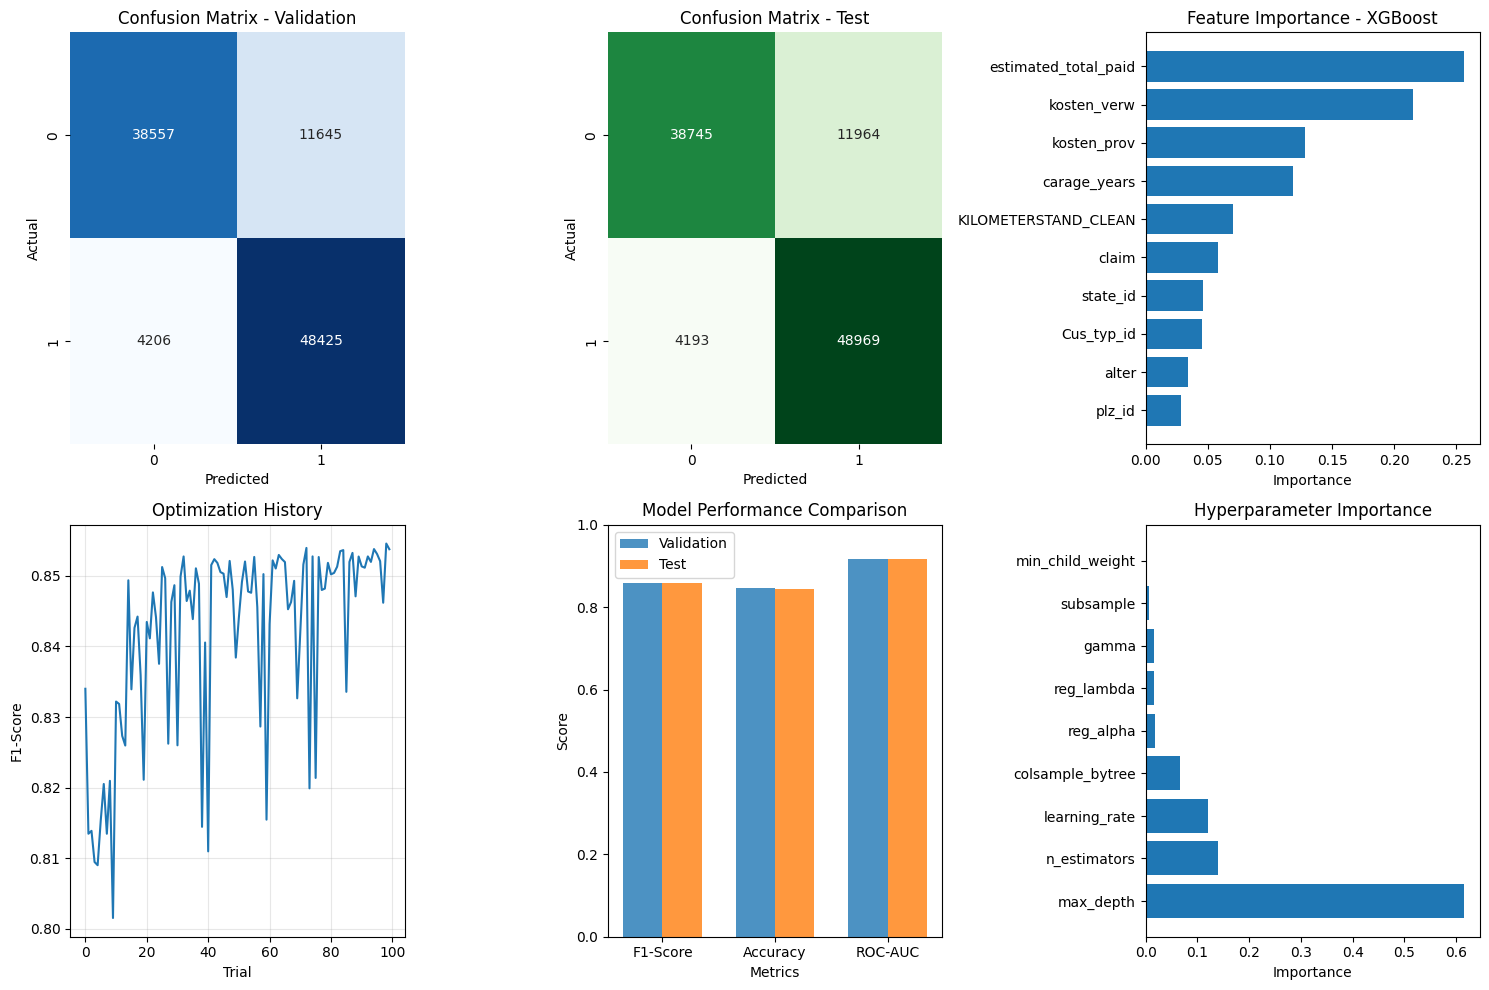


📋 FINAL SUMMARY REPORT
🎯 Best Hyperparameters Found:
   n_estimators: 490
   max_depth: 8
   learning_rate: 0.19426188994011162
   subsample: 0.6946664930205901
   colsample_bytree: 0.8735412785682344
   gamma: 0.08013553488287867
   reg_alpha: 1.0529171808573687
   reg_lambda: 1.680909046843404
   min_child_weight: 4

📊 Performance Summary:
   Validation F1: 0.8594
   Test F1:       0.8584
   Validation AUC: 0.9178
   Test AUC:       0.9160

💾 Model saved as: enhanced_tuned_xgboost_model_wo_vtr.pkl
🎉 Training completed successfully!
📊 Study results saved as: optuna_study_results.pkl

📈 Results Summary:
      Dataset  F1_Score  Accuracy   ROC_AUC
0  Validation  0.859354  0.845857  0.917811
1        Test  0.858390  0.844451  0.916034
✅ Part 4 completed! All visualizations and reports generated.


In [67]:
# PART 4: VISUALIZATIONS AND FINAL REPORT
# Run this after Part 3 is completed

# ✅ 9. Visualizations
plt.figure(figsize=(15, 10))

# Confusion Matrix - Validation
plt.subplot(2, 3, 1)
cm_val = confusion_matrix(y_val, y_pred_val)
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Validation")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Confusion Matrix - Test
plt.subplot(2, 3, 2)
cm_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Confusion Matrix - Test")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Feature Importance
plt.subplot(2, 3, 3)
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': final_model.feature_importances_
}).sort_values(by='Importance', ascending=True)

plt.barh(range(len(importance_df)), importance_df['Importance'])
plt.yticks(range(len(importance_df)), importance_df['Feature'])
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance")

# Optuna optimization history
plt.subplot(2, 3, 4)
trials_df = study.trials_dataframe()
plt.plot(trials_df['number'], trials_df['value'])
plt.title("Optimization History")
plt.xlabel("Trial")
plt.ylabel("F1-Score")
plt.grid(True, alpha=0.3)

# Performance comparison
plt.subplot(2, 3, 5)
metrics = ['F1-Score', 'Accuracy', 'ROC-AUC']
val_scores = [val_f1, val_accuracy, val_auc]
test_scores = [test_f1, test_accuracy, test_auc]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, val_scores, width, label='Validation', alpha=0.8)
plt.bar(x + width/2, test_scores, width, label='Test', alpha=0.8)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.ylim(0, 1)

# Parameter importance
plt.subplot(2, 3, 6)
param_importance = optuna.importance.get_param_importances(study)
params = list(param_importance.keys())
importances = list(param_importance.values())

plt.barh(range(len(params)), importances)
plt.yticks(range(len(params)), params)
plt.title("Hyperparameter Importance")
plt.xlabel("Importance")

plt.tight_layout()
plt.show()

# ✅ 10. Summary report
print("\n" + "="*60)
print("📋 FINAL SUMMARY REPORT")
print("="*60)
print(f"🎯 Best Hyperparameters Found:")
for param, value in study.best_params.items():
    print(f"   {param}: {value}")

print(f"\n📊 Performance Summary:")
print(f"   Validation F1: {val_f1:.4f}")
print(f"   Test F1:       {test_f1:.4f}")
print(f"   Validation AUC: {val_auc:.4f}")
print(f"   Test AUC:       {test_auc:.4f}")

print(f"\n💾 Model saved as: {model_filename}")
print("🎉 Training completed successfully!")

# ✅ 11. Optional: Save study results
study_filename = 'optuna_study_results.pkl'
joblib.dump(study, study_filename)
print(f"📊 Study results saved as: {study_filename}")

# Create results dataframe for future analysis
results_df = pd.DataFrame({
    'Dataset': ['Validation', 'Test'],
    'F1_Score': [val_f1, test_f1],
    'Accuracy': [val_accuracy, test_accuracy],
    'ROC_AUC': [val_auc, test_auc]
})

print(f"\n📈 Results Summary:")
print(results_df)

print("✅ Part 4 completed! All visualizations and reports generated.")

In [ ]:
#Drop HSN later we alredy have values from hesteller and id 

#Best month for sales 

#best bundesland for 

Look for ml models for aktiv in active customer 

find the salary of a person from car 

find the type of job he does 